In [1]:
# Import necessary library
#!pip install requests
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
#import seaborn as sns
#import requests

In [2]:
# Get list of S&P 500 Companies
#url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
#sp500_table = pd.read_html(url)
#sp500_tickers = sp500_table[0]['Symbol'].tolist()
#sp500_data = yf.download(sp500_tickers, start=start_date, end=end_date)

# Start Dates
appl_start = "1980-12-12"
ibm_start = "1970-01-02"
nvda_start = "1999-01-22"
tsla_start = "2010-06-29"
jpm_start = "1980-03-17"
jnj_start = "1962-01-02"
spy_start = "1993-01-29"


end_date = pd.Timestamp.today().strftime('%Y-%m-%d')


# TI Signal Testing Data
appl = yf.download('AAPL', start=appl_start, end=end_date).drop(columns=['Open', 'Adj Close'])
ibm = yf.download('IBM', start=ibm_start, end=end_date).drop(columns=['Open', 'Adj Close'])
nvda = yf.download('NVDA', start=nvda_start, end=end_date).drop(columns=['Open', 'Adj Close'])
tsla = yf.download('TSLA', start=tsla_start, end=end_date).drop(columns=['Open', 'Adj Close'])
jpm = yf.download('JPM', start=jpm_start, end=end_date).drop(columns=['Open', 'Adj Close'])
jnj = yf.download('JNJ', start=jnj_start, end=end_date).drop(columns=['Open', 'Adj Close'])
spy = yf.download('SPY', start=spy_start, end=end_date).drop(columns=['Open', 'Adj Close'])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
def rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0.0, 0.0).tolist()
    loss = delta.where(delta < 0.0, 0.0).abs().tolist()
    avg_gain = [0] * window
    avg_loss = [0] * window
    avg_gain.append(sum(gain[0:window])/window)
    avg_loss.append(sum(loss[0:window])/window)
    for i in range(window+1,len(delta)):
        avg_gain.append((avg_gain[-1]*(window-1) + gain[i])/window)
        avg_loss.append((avg_loss[-1]*(window-1) + loss[i])/window)
    avg_gain = pd.Series(avg_gain, index=data.index)
    avg_loss = pd.Series(avg_loss, index=data.index)
    rs = avg_gain/avg_loss
    data['RSI'] = 100.0 - (100.0/(1.0+rs))
    return data

def rsi_diff(data,standard):
    data['FMP'] = standard['rsi']
    data['RSI_Per'] = (standard['rsi'] - data['RSI']).abs()
    return data

In [4]:
# SPY Trading Strategy Data Prep
ibm_spy, appl_spy, nvda_spy, tsla_spy, jpm_spy, jnj_spy = spy.copy(), spy.copy(), spy.copy(), spy.copy(), spy.copy(), spy.copy()
ibm_spy.rename(columns={'High':'SPY_High', 'Low':'SPY_Low', 'Close':'SPY_Close', 'Volume':'SPY_Volume'}, inplace=True)
appl_spy.rename(columns={'High':'SPY_High', 'Low':'SPY_Low', 'Close':'SPY_Close', 'Volume':'SPY_Volume'}, inplace=True)
nvda_spy.rename(columns={'High':'SPY_High', 'Low':'SPY_Low', 'Close':'SPY_Close', 'Volume':'SPY_Volume'}, inplace=True)
tsla_spy.rename(columns={'High':'SPY_High', 'Low':'SPY_Low', 'Close':'SPY_Close', 'Volume':'SPY_Volume'}, inplace=True)
jpm_spy.rename(columns={'High':'SPY_High', 'Low':'SPY_Low', 'Close':'SPY_Close', 'Volume':'SPY_Volume'}, inplace=True)
jnj_spy.rename(columns={'High':'SPY_High', 'Low':'SPY_Low', 'Close':'SPY_Close', 'Volume':'SPY_Volume'}, inplace=True)
ibm_spy = ibm_spy.join(ibm)
appl_spy = appl_spy.join(appl)
nvda_spy = nvda.join(nvda_spy)
tsla_spy = tsla.join(tsla_spy)
jpm_spy = jpm_spy.join(jpm)
jnj_spy = jnj_spy.join(jnj)
tsla_spy

High         Low       Close     Volume    SPY_High  \
Date                                                                    
2010-06-29    1.666667    1.169333    1.592667  281494500  107.510002   
2010-06-30    2.028000    1.553333    1.588667  257806500  104.879997   
2010-07-01    1.728000    1.351333    1.464000  123282000  103.489998   
2010-07-02    1.540000    1.247333    1.280000   77097000  103.419998   
2010-07-06    1.333333    1.055333    1.074000  103003500  104.370003   
...                ...         ...         ...        ...         ...   
2024-10-08  246.210007  240.559998  244.500000   56303200  573.780029   
2024-10-09  247.429993  239.509995  241.050003   66289500  577.710022   
2024-10-10  242.789993  232.339996  238.770004   83087100  577.580017   
2024-10-11  223.339996  214.380005  217.800003  142628900  580.330017   
2024-10-14  221.910004  213.740005  219.160004   86117900  585.270020   

               SPY_Low   SPY_Close  SPY_Volume  
Date                                            
2010-06-29  103.550003  104.209999   373649500  
2010-06-30  102.879997  103.220001   284101700  
2010-07-01  101.129997  102.760002   382924800  
2010-07-02  101.620003  102.199997   233385200  
2010-07-06  101.879997  102.870003   256935300  
...                ...         ...         ...  
2024-10-08  569.530029  573.169983    37398700  
2024-10-09  572.549988  577.140015    37912200  
2024-10-10  574.489990  576.130005    44138100  
2024-10-11  575.909973  579.580017    42268000  
2024-10-14  580.729980  584.320007    36154600  

[3598 rows x 8 columns]

In [5]:
# MY RSI DIVERGENCE SIGNAL FUNCTIONS

def getLL(data):
    min = data[0]
    for i in range(1, len(data)):
        if data[i] < min:
            index = data.index(min)
            between = data[index:i]
            if (max(between) > min):
                return 1
            min = data[i]
    return 0

def getHH(data):
    max = data[0]
    for i in range(1, len(data)):
        if data[i] > max:
            index = data.index(max)
            between = data[index:i]
            if min(between) < max:
                return 1
            max = data[i]
    return 0

def getHL(data):
    low = data[0]
    for i in range(1, len(data)):
        if data[i] < low:
            low = data[i]
        elif data[i] > low:
            index = data.index(low)
            between = data[index:i]
            if max(between) > data[i]:
                if i == len(data)-1:
                    return 1
                elif data[i+1] > data[i]:
                    return 1
    return 0

def getLH(data):
    high = data[0]
    for i in range(1, len(data)):
        if data[i] > high:
            high = data[i]
        elif data[i] < high:
            index = data.index(high)
            between = data[index:i]
            if (min(between) < data[i]):
                if i == len(data)-1:
                    return 1
                elif data[i]> data[i+1]:
                    return 1
    return 0

def bull_d(data, ti, candles=14):
    prices, rsis = [], []
    signals = [0] * (candles-1)
    start = candles-1
    for i in range(start, len(data)):
        prices = data['Close'][i-start:i+1].to_list()
        tis = data[ti][i-start:i+1].to_list()
        found = getLL(prices) & getHL(tis)
        signals.append(found)
    data['Bull_D'] = pd.Series(signals, index=data.index)
    return data

def bear_d(data, ti, candles=14):
    prices, rsis = [], []
    signals = [0] * (candles-1)
    start = candles-1
    for i in range(start, len(data)):
        prices = data['Close'][i-start:i+1].to_list()
        tis = data[ti][i-start:i+1].to_list()
        found = getHH(prices) & getLH(tis)
        signals.append(found)
    data['Bear_D'] = pd.Series(signals, index=data.index)
    return data

In [6]:
def gethighs(data):
    indices = [0]
    for i in range(1, len(data)-1):
        if (data[i] > data[i-1]) & (data[i] > data[i+1]):
            indices.append(i)
    return indices

def getlows(data):
    indices = [0]
    for i in range(1, len(data)-1):
        if (data[i] < data[i-1]) & (data[i] < data[i+1]):
            indices.append(i)
    return indices

def rsi_bull_sr(data, lower=30, candles=14):
    signals = [0] * (candles-1)
    start = candles-1
    step, high, found = 0, 0, 0
    for i in range(start, len(data)):
        rsis = data['RSI'][i-start:i+1].to_list()
        peaks = gethighs(rsis)
        valleys = getlows(rsis)
        for j in range(len(rsis)):
            p_indices = [p for p in peaks if p <= j]
            sub_ps = [rsis[p] for p in p_indices]
            v_indices = [v for v in valleys if v <= j]
            sub_vs = [rsis[v] for v in v_indices]
            if (step == 0) & (rsis[j] < lower):
                step = 1
            elif (step == 1) & (rsis[j] > lower) & (j in p_indices):
                step = 2
                high = rsis[j]
            elif (step == 2) & (rsis[j] < high) & (j in v_indices):
                if rsis[j] > min(sub_vs[:j]):
                  step = 3
            elif (step == 3) & (rsis[j] == max(rsis)):
                step = 4
                found = 1
        if found == 1:
            signals.append(1)
        else:
            signals.append(0)
        step, found = 0, 0
    data['Bull_SR'] = pd.Series(signals, index=data.index)
    return data

def rsi_bear_sr(data, upper=70, candles=14):
    signals = [0] * (candles-1)
    start = candles-1
    step, low , found = 0, 0, 0
    for i in range(start, len(data)):
        rsis = data['RSI'][i-start:i+1].to_list()
        peaks = gethighs(rsis)
        valleys = getlows(rsis)
        for j in range(len(rsis)):
            p_indices = [p for p in peaks if p <= j]
            sub_ps = [rsis[p] for p in p_indices]
            v_indices = [v for v in valleys if v <= j]
            sub_vs = [rsis[v] for v in v_indices]
            if (step == 0) & (rsis[j] > upper):
                step = 1
            elif (step == 1) & (rsis[j] < upper) & (j in v_indices):
                step = 2
                low = rsis[j]
            elif (step == 2) & (rsis[j] > low) & (j in p_indices):
                if rsis[j] < max(sub_ps[:j]):
                  step = 3
            elif (step == 3) & (rsis[j] == min(rsis)):
                step = 4
                found = 1
        if found == 1:
            signals.append(1)
        else:
            signals.append(0)
        step, found = 0, 0
    data['Bear_SR'] = pd.Series(signals, index=data.index)
    return data

In [7]:
# TI Signal Computation

# Simple Moving Average (SMA)
def sma(data, regular_span=14, short_window=12, long_window=50):
    data['Short_SMA'] = data['Close'].rolling(window=short_window).mean()
    data['Regular_SMA'] = data['Close'].rolling(window=regular_span).mean()
    data['Long_SMA'] = data['Close'].rolling(window=long_window).mean()
    return data

# Exponential Moving Average (EMA)
def ema(data, short=12, reg=14, long=26):
    data['Short_EMA'] = data['Close'].ewm(span=short, adjust=False).mean()
    data['Regular_EMA'] = data['Close'].ewm(span=reg, adjust=False).mean()
    data['Long_EMA'] = data['Close'].ewm(span=long, adjust=False).mean()
    return data

# Movering Average Convergence Divergence (MACD)
def macd(data, short_span=12, long_span=26, sig_span=9):
    data['MACD'] = data['Close'].ewm(span=short_span, adjust=False).mean() - data['Close'].ewm(span=long_span, adjust=False).mean()
    data['MACD_Sig'] = data['MACD'].ewm(span=sig_span, adjust=False).mean()
    data['MACD_Hist'] = data['MACD'] - data['MACD_Sig']
    return data

# Relative Strength Index (RSI)
def rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0.0, 0.0).tolist()
    loss = delta.where(delta < 0.0, 0.0).abs().tolist()
    avg_gain = [0] * window
    avg_loss = [0] * window
    avg_gain.append(sum(gain[0:window])/window)
    avg_loss.append(sum(loss[0:window])/window)
    for i in range(window+1,len(delta)):
        avg_gain.append((avg_gain[-1]*(window-1) + gain[i])/window)
        avg_loss.append((avg_loss[-1]*(window-1) + loss[i])/window)
    avg_gain = pd.Series(avg_gain, index=data.index)
    avg_loss = pd.Series(avg_loss, index=data.index)
    rs = avg_gain/avg_loss
    data['RSI'] = 100.0 - (100.0/(1.0+rs))
    return data

# Commodity Channel Index (CCI)
def cci(data, window=20):
    tp = (data['High'] + data['Low'] + data['Close']) / 3
    ma = tp.rolling(window).mean()
    md = tp.rolling(window).apply(lambda x: np.mean(np.abs(x - np.mean(x))))
    data['CCI'] = (tp - ma) / (0.015 * md)
    return data

# Stochastic Oscillator
def stochastic_oscillator(data, k_period=14, d_period=3):
    l14 = data['Low'].rolling(window=k_period).min()
    h14 = data['High'].rolling(window=k_period).max()
    data['Stoch_K'] = 100 * ((data['Close'] - l14) / (h14 - l14))
    data['Stoch_D'] = data['Stoch_K'].rolling(window=d_period).mean()
    return data

# Bollinger Bands
def bollinger_bands(data, window=20, num_std=2):
    data['Middle_BB'] = data['Close'].rolling(window).mean()
    sd = data['Close'].rolling(window=window).std()
    data['Upper_BB'] = data['Middle_BB'] + (num_std * sd)
    data['Lower_BB'] = data['Middle_BB'] - (num_std * sd)
    return data

def get_tis(data):
    #data = ema(data)
    #data = macd(data)
    #data = cci(data)
    data = rsi(data, 3)
    #data = stochastic_oscillator(data)
    #data = bollinger_bands(data)
    return data

def get_signals(data):
    data['EMA_Signal'] = (data['Short_EMA'] > data['Long_EMA']) & (data['Short_EMA'].shift() < data['Long_EMA'].shift())
    data['MACD_Signal'] = (data['MACD'] > data['MACD_9']) & (data['MACD'].shift() < data['MACD_9'])
    data['CCI_Signal'] = data['CCI'] <= -100
    data['Stoch_Signal'] = (data['Stoch_K'] < 20) | (data['Stoch_D'] < 20)
    #bull = data['Lower_BB'] * 1.01
    #data['BB_Signal'] = data['Close'] <= bull
    return data

In [8]:
# RSI Signal Computation v 0.5

# Simple Overbought/Oversold Threshold Computation
def rsi_overboughtsold(data, oversold=30, overbought=70):
    data['Overbought'] = data['RSI'] >= overbought
    data['Oversold'] = data['RSI'] <= oversold
    return data

def com2and(a,b):
    return a & b

def com2or(a,b):
    return a | b

def com3and(a,b,c):
    return a & b & c

def com3or(a,b,c):
    return a | b | c

def comAandBCor(a,b,c):
    return a & (b | c)

def comABandCor(a,b,c):
    return (a & b) | c

def comACandBor(a,b,c):
    return (a & c) | b

def comBCandAor(a,b,c):
    return (b & c) | a

def comABorCand(a,b,c):
    return (a | b) & c

def comACorBand(a,b,c):
    return (a | c) & b

def rsi_signal(data, fn=None, candle=14, bot=30, top=70, thr=True, advt=False, div=False, sw=False):
    if advt:
        data['Oversold'] = (data['RSI'] >= bot) & (data['RSI'].shift(1) < bot)
        data['Overbought'] = (data['RSI'] <= top) & (data['RSI'].shift(1) > top)
    else:
        data = rsi_overboughtsold(data, bot, top)
    if div:
        data = bull_d(data, 'RSI', candle)
        data = bear_d(data, 'RSI', candle)
    if sw:
        data = rsi_bull_sr(data, bot, candle)
        data = rsi_bear_sr(data, top, candle)
    if (thr == True) & (div == False) & (sw == False):
        data['Buy_Signal'] = data['Oversold']
        data['Sell_Signal'] = data['Overbought']
    elif (thr == True) & (div == True) & (sw == False):
        data['Buy_Signal'] = fn(data['Oversold'], data['Bull_D'])
        data['Sell_Signal'] = fn(data['Overbought'], data['Bear_D'])
    elif (thr == True) & (sw == True) & (div == False):
        data['Buy_Signal'] = fn(data['Oversold'], data['Bull_SR'])
        data['Sell_Signal'] = fn(data['Overbought'], data['Bear_SR'])
    elif thr & div & sw:
        data['Buy_Signal'] = fn(data['Oversold'], data['Bull_D'], data['Bull_SR'])
        data['Sell_Signal'] = fn(data['Overbought'], data['Bear_D'], data['Bear_SR'])
    elif (div == True) & (thr == False) & (sw == False):
        data['Buy_Signal'] = data['Bull_D']
        data['Sell_Signal'] = data['Bear_D']
    elif (sw == True) & (thr == False) & (div == False):
        data['Buy_Signal'] = data['Bull_SR']
        data['Sell_Signal'] = data['Bear_SR']
    elif (div == True) & (sw == True) & (thr == False):
        data['Buy_Signal'] = fn(data['Bull_D'], data['Bull_SR'])
        data['Sell_Signal'] = fn(data['Bear_D'], data['Bear_SR'])

    data['RSI_Signal'] = (data['Buy_Signal']) & (data['Sell_Signal'] == False)
    #data = data.loc[:,['High','Low','Close','Volume','RSI','RSI_Signal']]

    return data

In [9]:
# TI Signal Testing
def price_change(data):
    changes = [0]
    for i in range(1,len(data)):
        diff = ((data['Close'].iloc[i] - data['Close'].iloc[i-1]) / data['Close'].iloc[i]) * 100
        changes.append(diff)
    data['Price_Change(%)'] = pd.Series(changes, index=data.index)
    return data

def percent_gain(data, hold):
    profit = [0] * hold
    for i in range (hold, len(data)):
        if data['Sold'].iloc[i] == 1:
            if data['Invested'].iloc[i-hold] == 0:
                profit.append(0)
            else:
                gain = (((data['Fund'].iloc[i] - data['Remainder'].iloc[i-hold]) - data['Invested'].iloc[i-hold]) / data['Invested'].iloc[i-hold])*100
                profit.append(gain)
        else:
            profit.append(0)

    data['Profit(%)'] = pd.Series(profit, index=data.index)

    return data

def ti_test(data, signal, hold):
    fund = 10000
    can_buy = 1
    shares, days_held, buy_price = 0, 0, 0
    invested, remainder, all_sells, earnings, running_total = [], [], [], [], []
    holding = []
    sold = []


    for i in range(len(data)):
        if can_buy == 0:
            days_held += 1
            holding.append(1)
        else:
            holding.append(0)

        if days_held == hold:
            earnings.append(shares * (data['Close'].iloc[i] - buy_price))
            fund += (shares * data['Close'].iloc[i])
            can_buy = 1
            days_held, shares = 0, 0

            all_sells.append(data['Close'].iloc[i])
            sold.append(1)
        else:
            sold.append(0)

        if data[signal].iloc[i] == 1 & can_buy == 1:
            shares = fund // data['Close'].iloc[i]
            buy_price = data['Close'].iloc[i]
            fund = fund % data['Close'].iloc[i]
            invested.append(shares * buy_price)
            can_buy = 0
        else:
            invested.append(0)
        remainder.append(fund)
        running_total.append(fund+shares*buy_price)

    data['Remainder'] = pd.Series(remainder,index=data.index)
    data['Invested'] = pd.Series(invested,index=data.index)
    data['Sold'] = pd.Series(sold, index=data.index)
    data['Fund'] = pd.Series(running_total, index=data.index)
    data = price_change(data)
    data = percent_gain(data, hold)
    holding_change = []
    for i in range(len(data)):
        if holding[i] == 1:
            holding_change.append(data['Price_Change(%)'].iloc[i])
        else:
            holding_change.append(0)
    data['Holding'] = pd.Series(holding_change, index=data.index)

    return data

def get_fund(data):
    return data['Fund'].iloc[-1]

def combo_order(dfs):
    order = []
    for d in dfs:
        order.extend([col for col in d.columns if 'Signal' in col])
    return order

In [10]:
# Automation Graphing Template

def rsi_sum_graph(data, stock, upper=80, lower=20):
    fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1, sharex=True, figsize=(20, 15))
    fig.suptitle(stock, fontweight='bold')


    ax1.plot(data.index, data['High'], label='High', color = 'green')
    ax1.plot(data.index, data['Close'], label='Close', color = 'blue')
    ax1.plot(data.index, data['Low'], label='High', color = 'red')
    ax1.set_ylabel('Stock Closing Price')
    ax1.grid(True, which='both', color='gray', linestyle='--', linewidth=0.5)
    ax1.legend(loc=2, fontsize=8)

    ax2.plot(data.index, data['RSI'], label='RSI', color = 'purple')
    ax2.set_ylabel('RSI')
    ax2.axhline(y = upper, color = 'r', linestyle = '-')
    ax2.axhline(y = lower, color = 'lightblue', linestyle = '-')

    ax3.plot(data.index, data.iloc[:,4], label='Buy Signals', color = 'red')
    ax3.set_ylabel('Buy Signal')

    ax4.plot(data.index, data['Holding'], label='Price Change(%)', color = 'green')
    ax4.set_ylabel('Price Change While Holding(%)')
    ax4.grid(True, which='both', color='gray', linestyle='--', linewidth=0.5)

    ax5.plot(data.index, data['Fund'], label= 'Funds', color = 'green')
    ax5.set_ylabel('Fund ($)')
    ax5.grid(True, which='both', color='gray', linestyle='--', linewidth=0.5)

    ax6.plot(data.index, data['Profit(%)'], label = 'Profit(%)', color = 'green')
    ax6.set_ylabel('Profit (%)')
    ax6.grid(True, which='both', color='gray', linestyle='--', linewidth=0.5)




    ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax3.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax4.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax5.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

    plt.subplots_adjust(hspace=0)

    plt.show()

    return

In [11]:
# Parameters
# EMA: regular_span=14, short_window=12, long_window=26, signal_combinations
# MACD: short_span=12, long_span=26, sig_span=9, signal_combinations
# RSI: period=14, lookback_period=?, signal_combinations
# CCI: window=20, signal_combinations

# Loop through all rsi candle lengths (1~28)
# Create a new dataframe for each candle length
# Use only simple threshold RSI for now
# Return a list of all RSI dataframes
def rsi_automation(data, fy=False):
    dfs = []
    pls = [3,7,9,10,14,21,30]
    holds = [1,3,5,7,10,14,21,30]
    for p in pls:
        for h in holds:
            d = data.copy()[['High','Low','Close']]
            if fy:
                d = rsi(d,p).copy().iloc[-252:,:]
            else:
                d = rsi(d,p).copy().iloc[-502:,:].copy()
            if (p == 3) or (p == 7):
                d = rsi_signal(d,top=90,bot=10)
            elif (p == 9) or (p == 10):
                d = rsi_signal(d,top=85,bot=15)
            elif (p == 14):
                d = rsi_signal(d,top=75,bot=25)
            else:
                d = rsi_signal(d,top=70,bot=30)
            name = 'RSI' + str(p) + '_Hold' + str(h) + '_Signal'
            d = ti_test(d,'RSI_Signal',h).rename(columns={'RSI_Signal':name}).drop(columns=['Overbought','Oversold','Buy_Signal','Sell_Signal','Remainder','Invested','Sold'])
            dfs.append(d)
    return dfs

In [47]:
#RSI Testing
ibm_rsi_test = rsi_automation(ibm, fy=False)
appl_rsi_test = rsi_automation(appl, fy=False)
nvda_rsi_test = rsi_automation(nvda, fy=False)
tsla_rsi_test = rsi_automation(tsla, fy=False)
jpm_rsi_test = rsi_automation(jpm, fy=False)
jnj_rsi_test = rsi_automation(jnj, fy=False)
ibm_rsi_sorted = sorted(ibm_rsi_test, key=get_fund, reverse=True)
appl_rsi_sorted = sorted(appl_rsi_test, key=get_fund, reverse=True)
nvda_rsi_sorted = sorted(nvda_rsi_test, key=get_fund, reverse=True)
tsla_rsi_sorted = sorted(tsla_rsi_test, key=get_fund, reverse=True)
jpm_rsi_sorted = sorted(jpm_rsi_test, key=get_fund, reverse=True)
jnj_rsi_sorted = sorted(jnj_rsi_test, key=get_fund, reverse=True)

In [48]:
ibm_rsi_columns = combo_order(ibm_rsi_sorted)
appl_rsi_columns = combo_order(appl_rsi_sorted)
nvda_rsi_columns = combo_order(nvda_rsi_sorted)
tsla_rsi_columns = combo_order(tsla_rsi_sorted)
jpm_rsi_columns = combo_order(jpm_rsi_sorted)
jnj_rsi_columns = combo_order(jnj_rsi_sorted)
ibm_rsi_columns[0:10]
#appl_rsi_columns[0:10]
#nvda_rsi_columns[0:10]
#tsla_rsi_columns[0:10]
#jpm_rsi_columns[0:10]
#jnj_rsi_columns[0:10]
#ibm_rsi_columns

['RSI21_Hold14_Signal',
 'RSI3_Hold30_Signal',
 'RSI21_Hold10_Signal',
 'RSI14_Hold14_Signal',
 'RSI21_Hold5_Signal',
 'RSI3_Hold7_Signal',
 'RSI21_Hold21_Signal',
 'RSI21_Hold30_Signal',
 'RSI14_Hold21_Signal',
 'RSI14_Hold10_Signal']

In [49]:
ibm_rsi_columns[0]#, appl_rsi_columns[0], nvda_rsi_columns[0], tsla_rsi_columns[0], jpm_rsi_columns[0], jnj_rsi_columns[0]

'RSI21_Hold14_Signal'

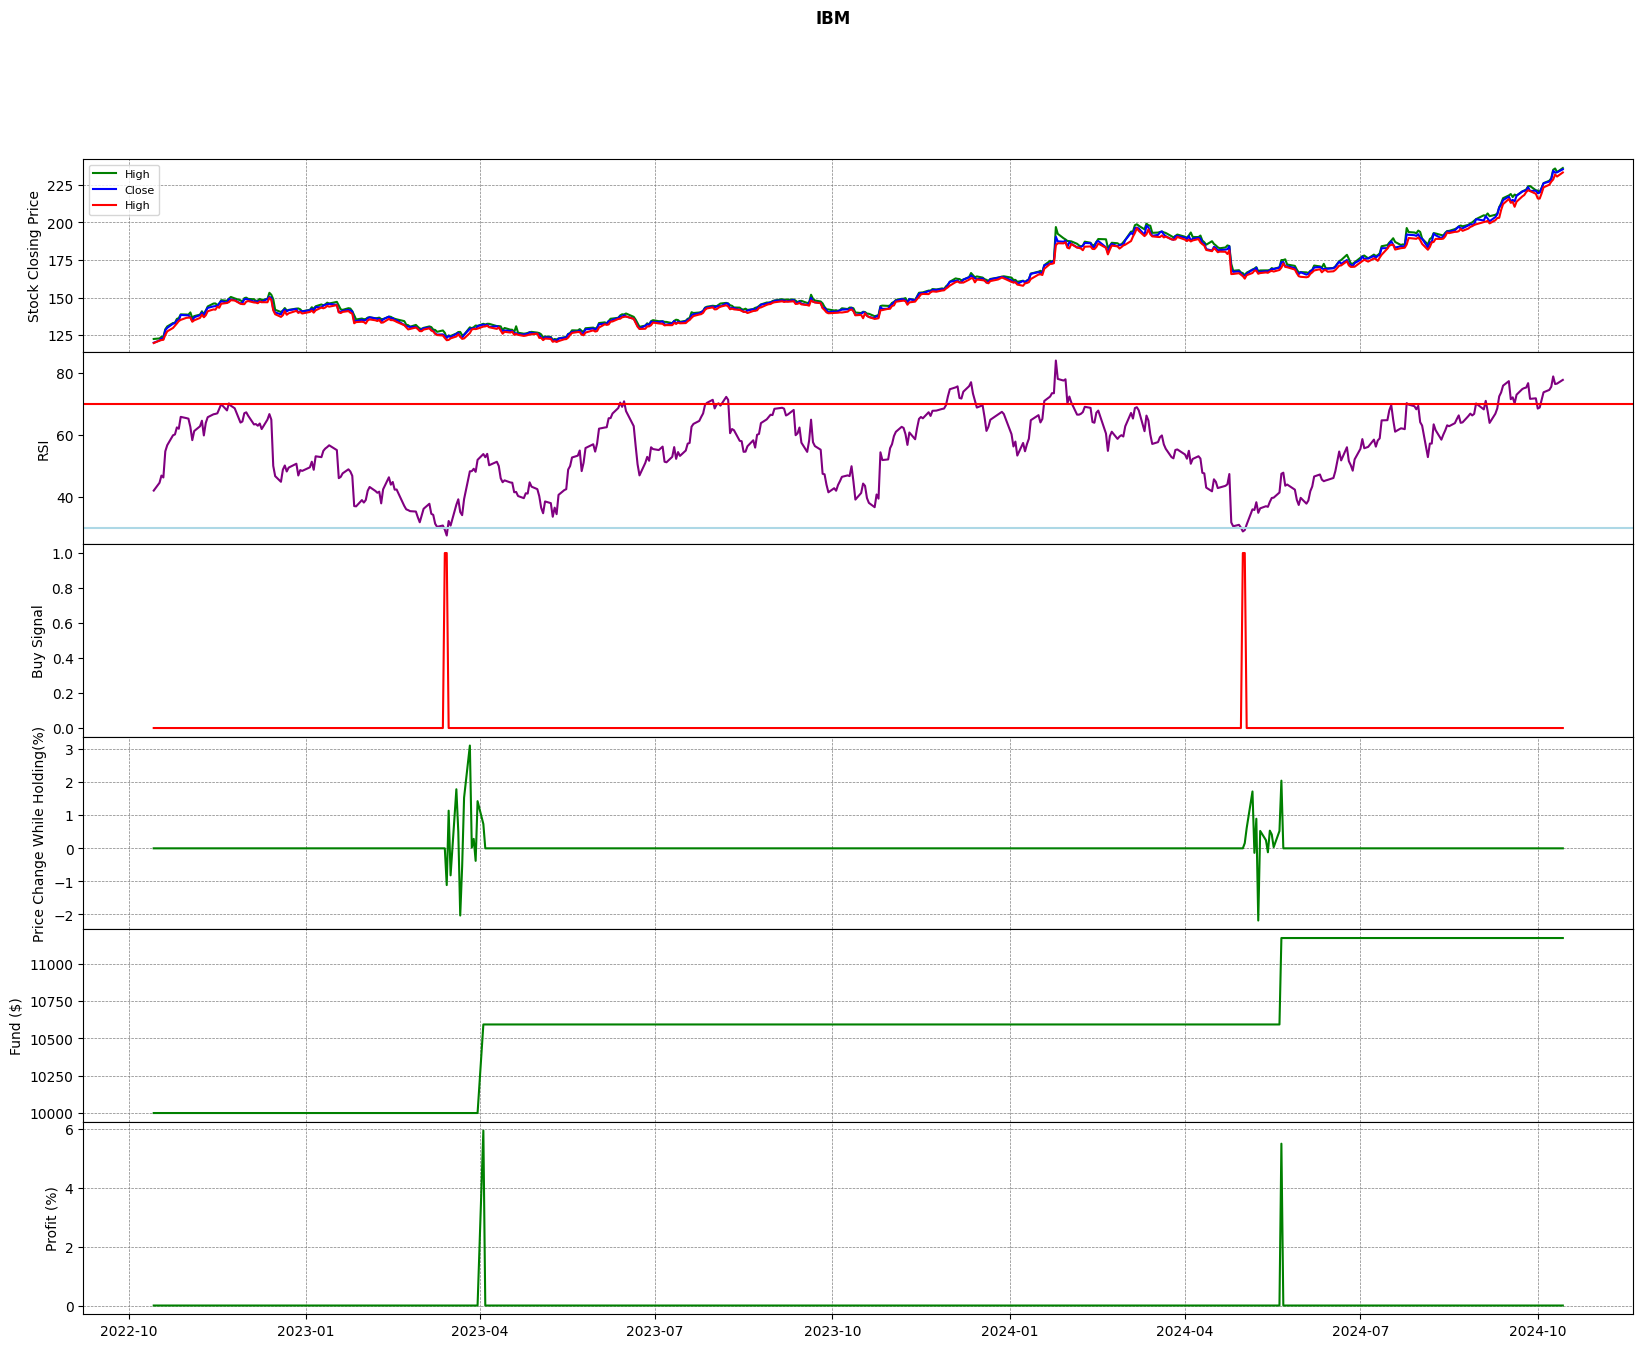

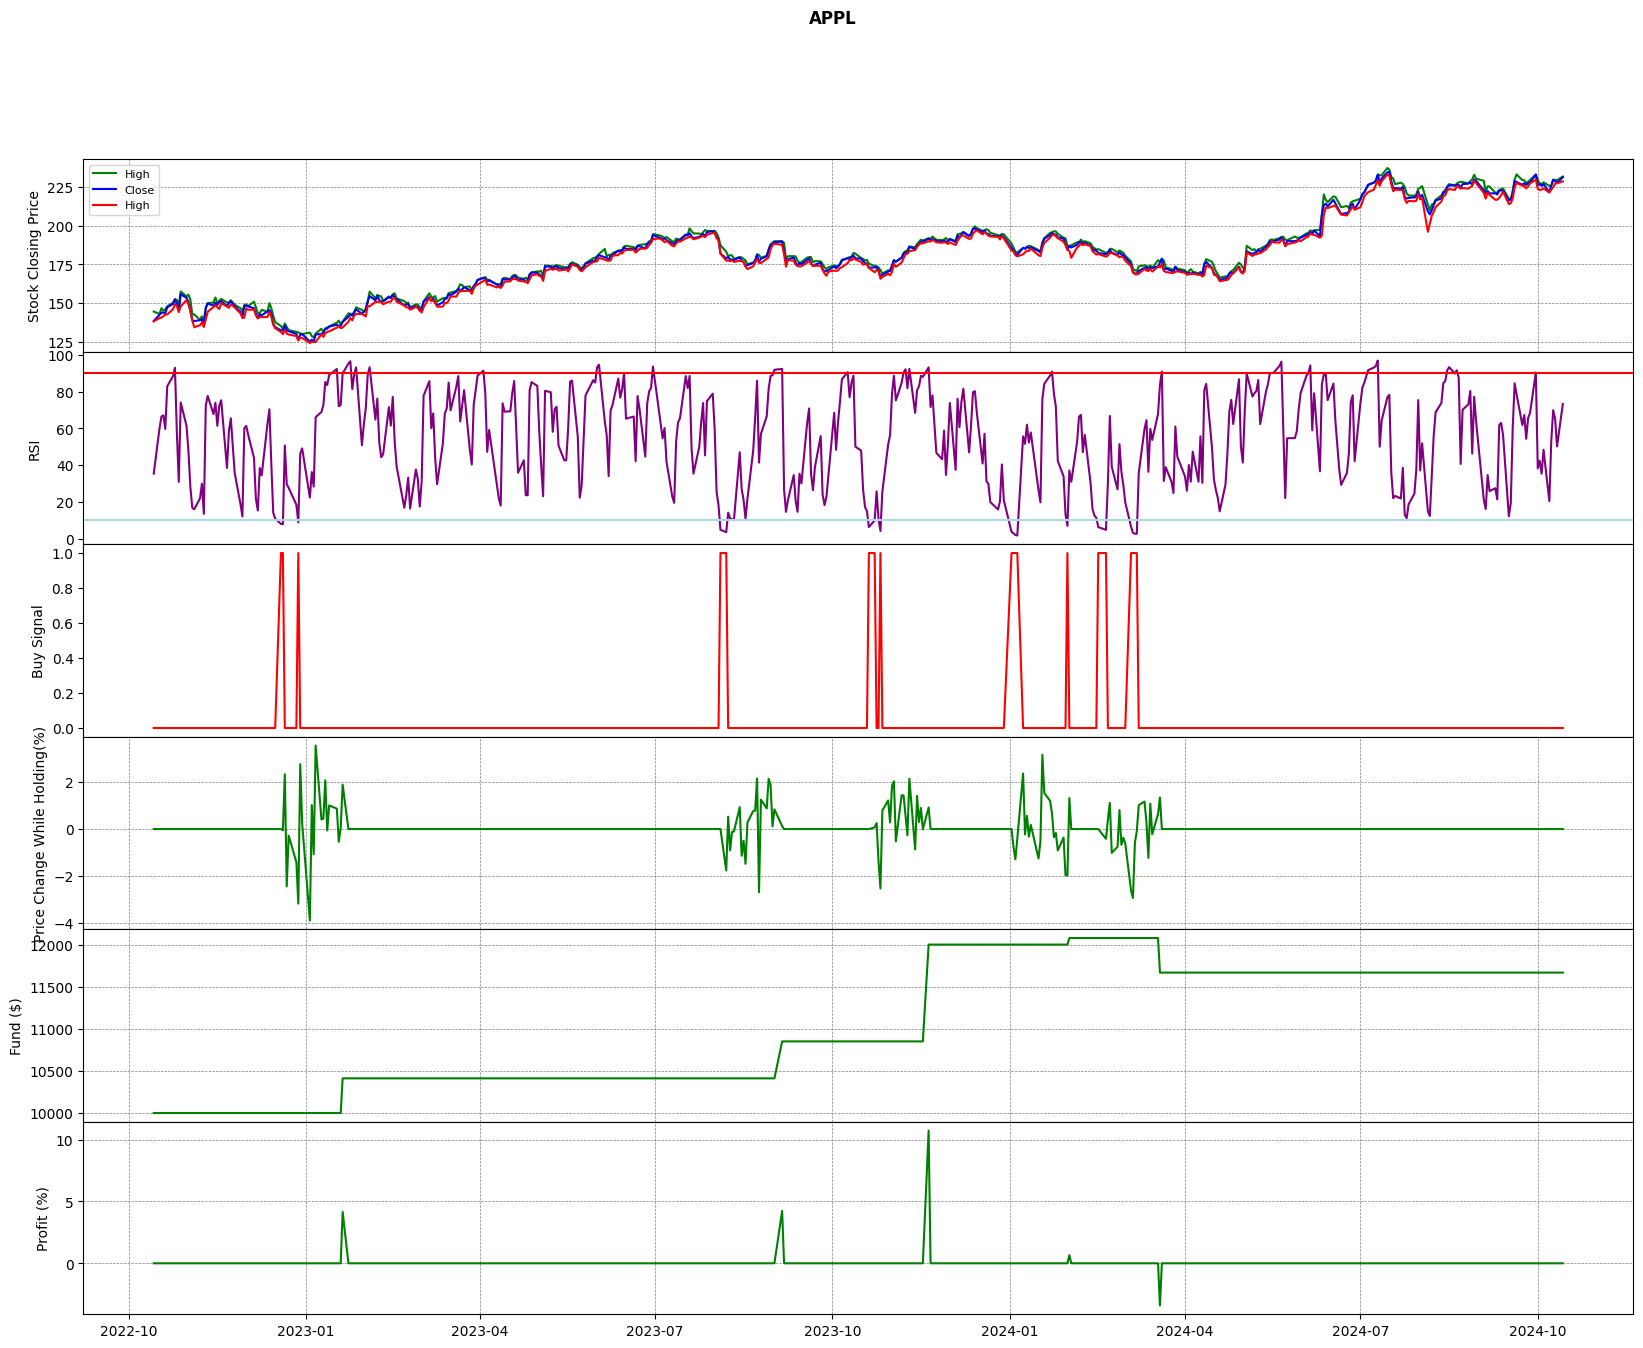

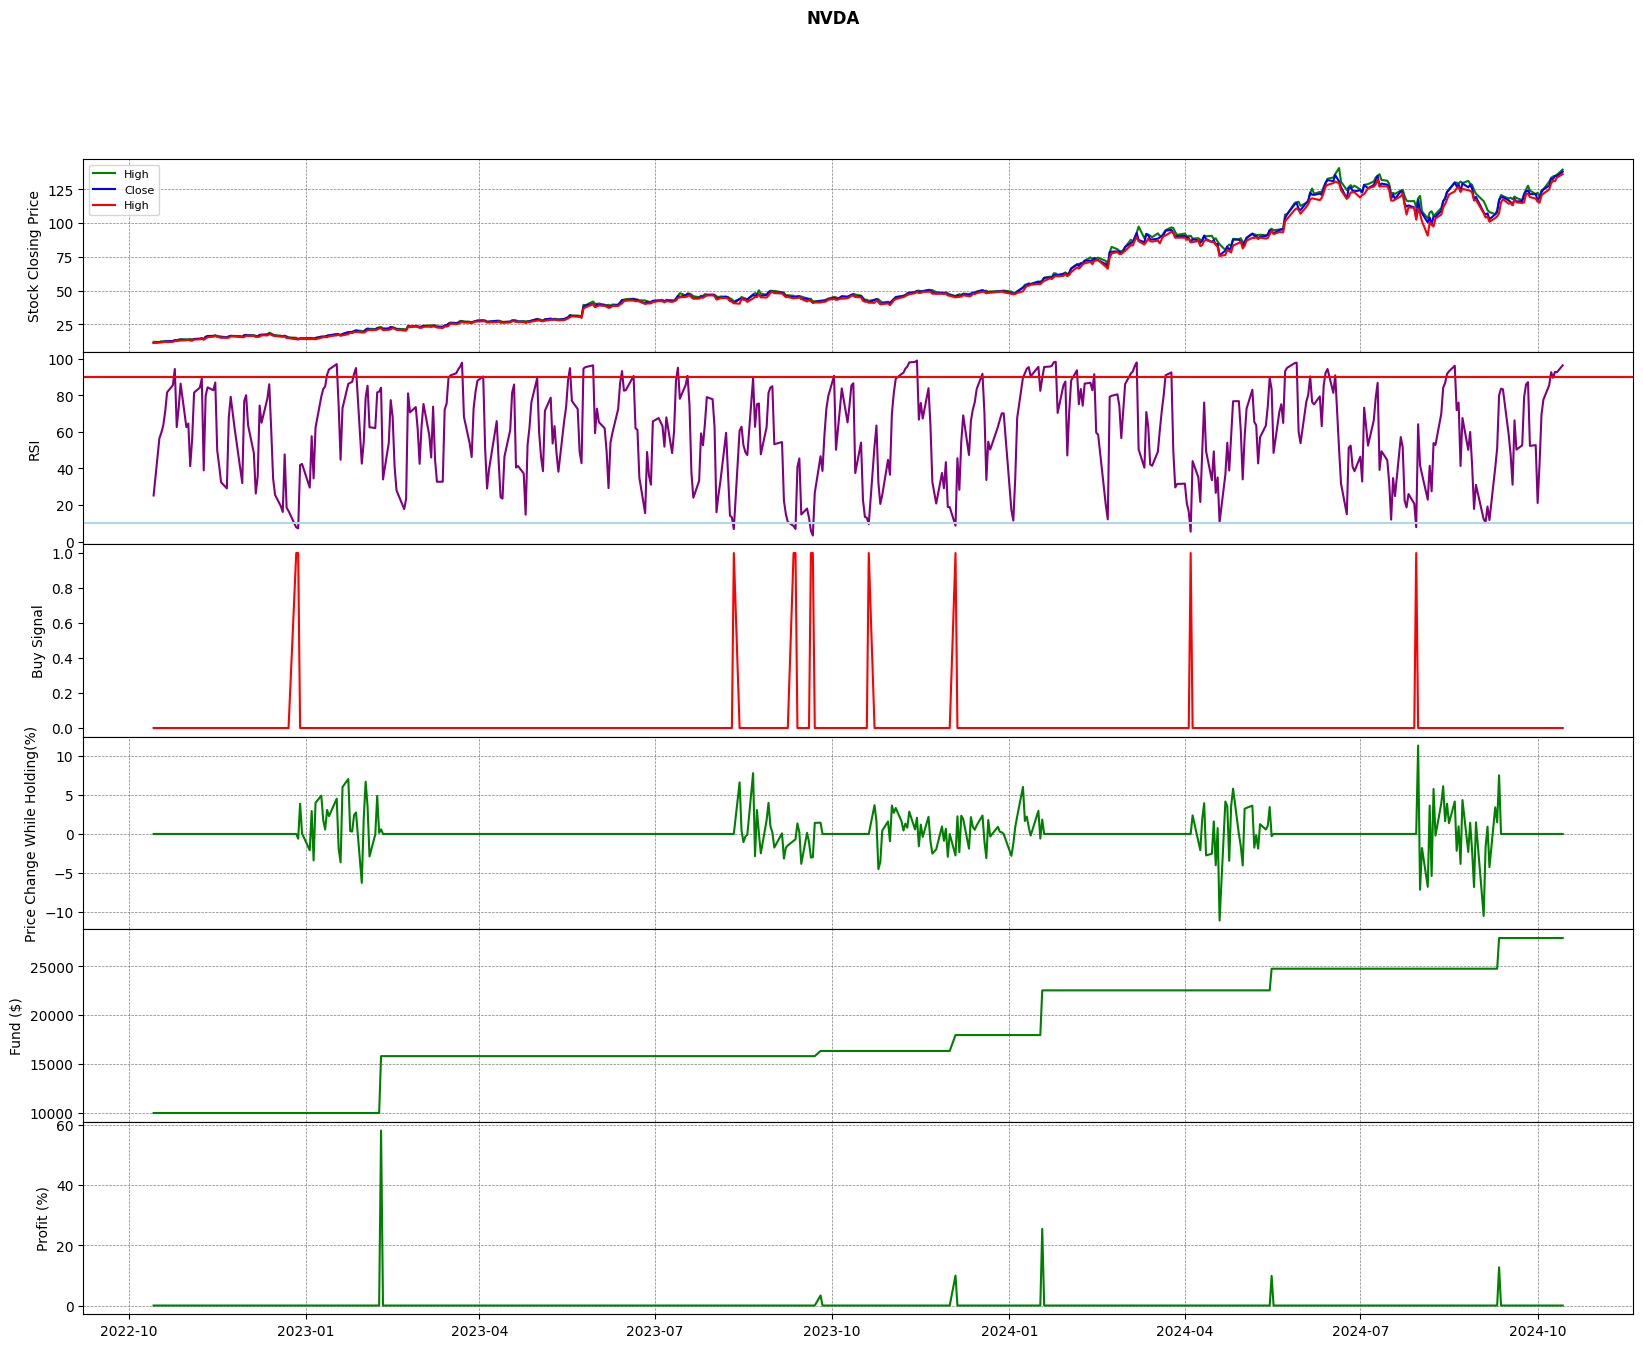

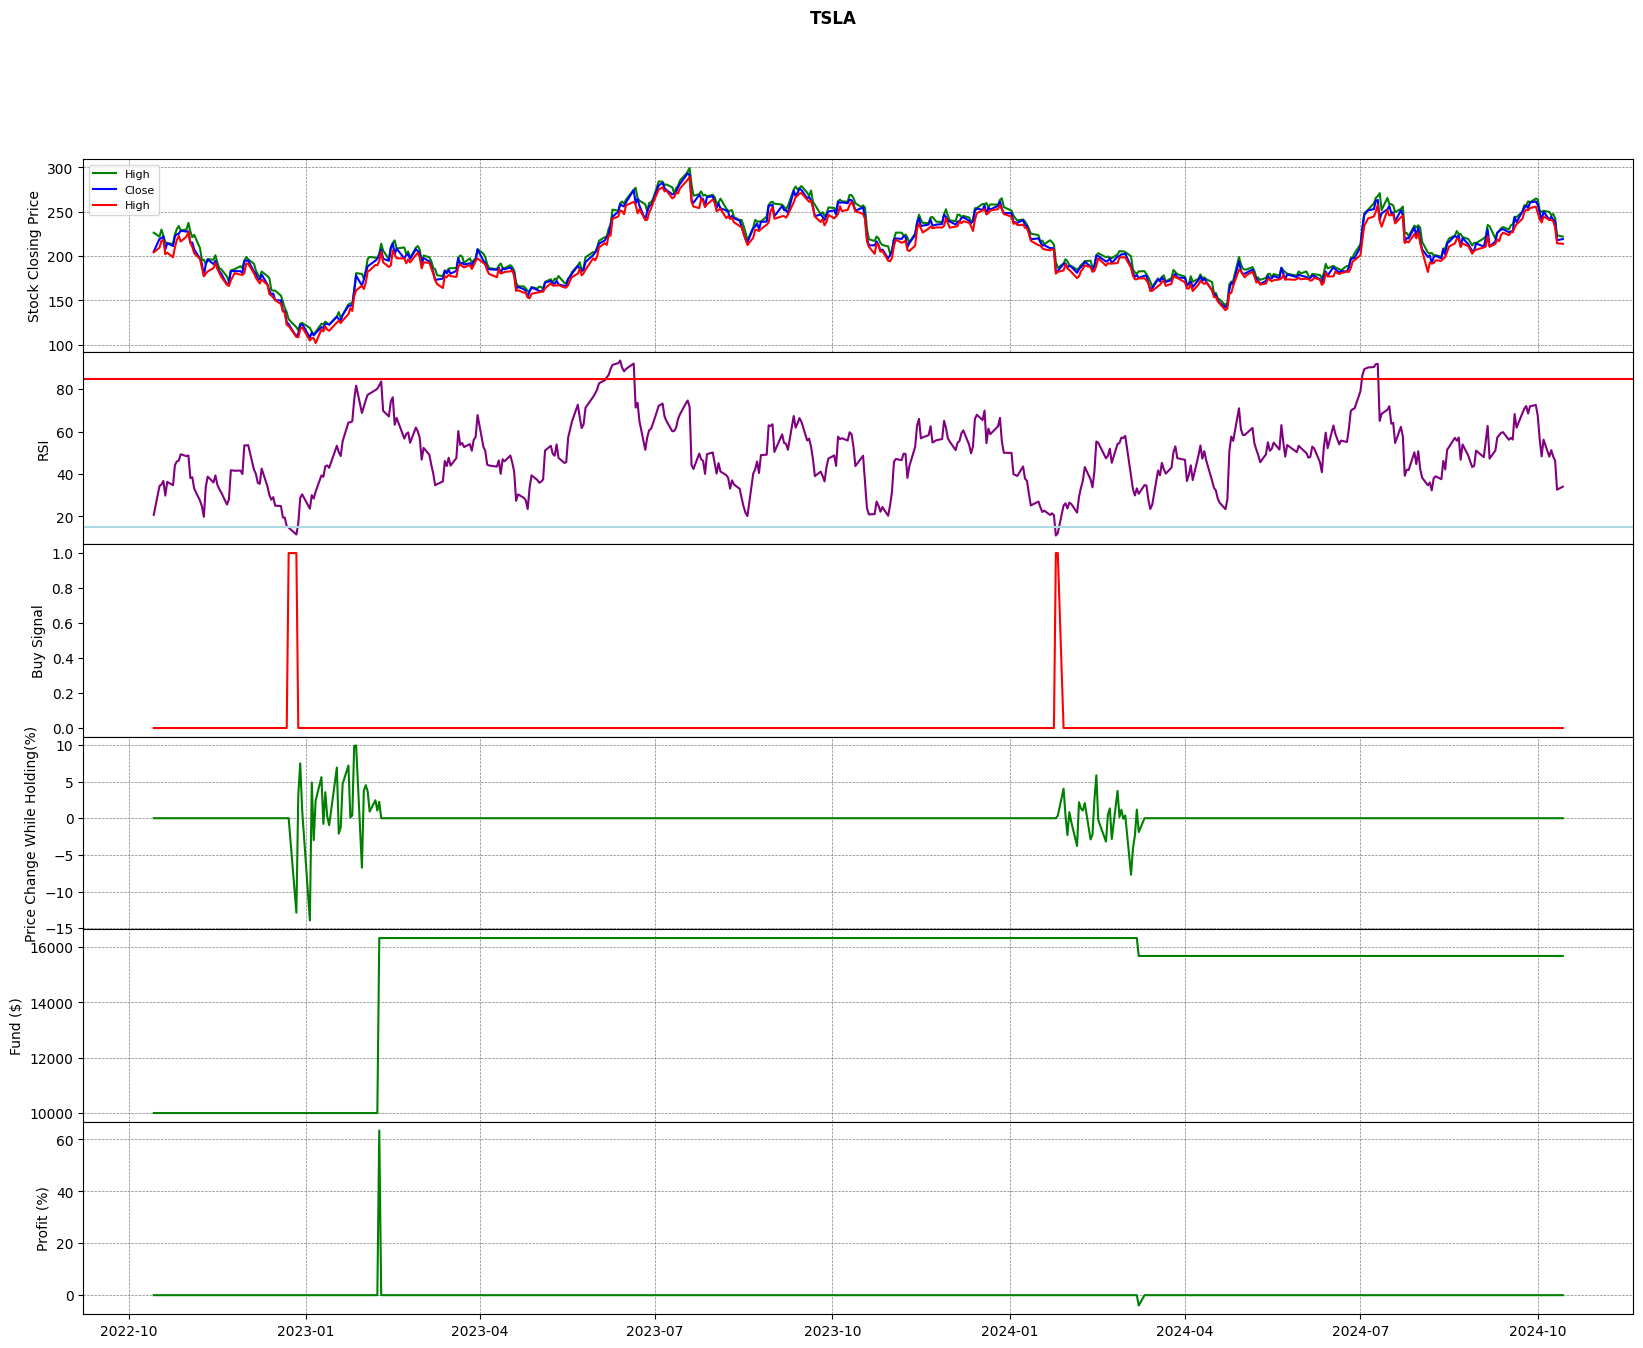

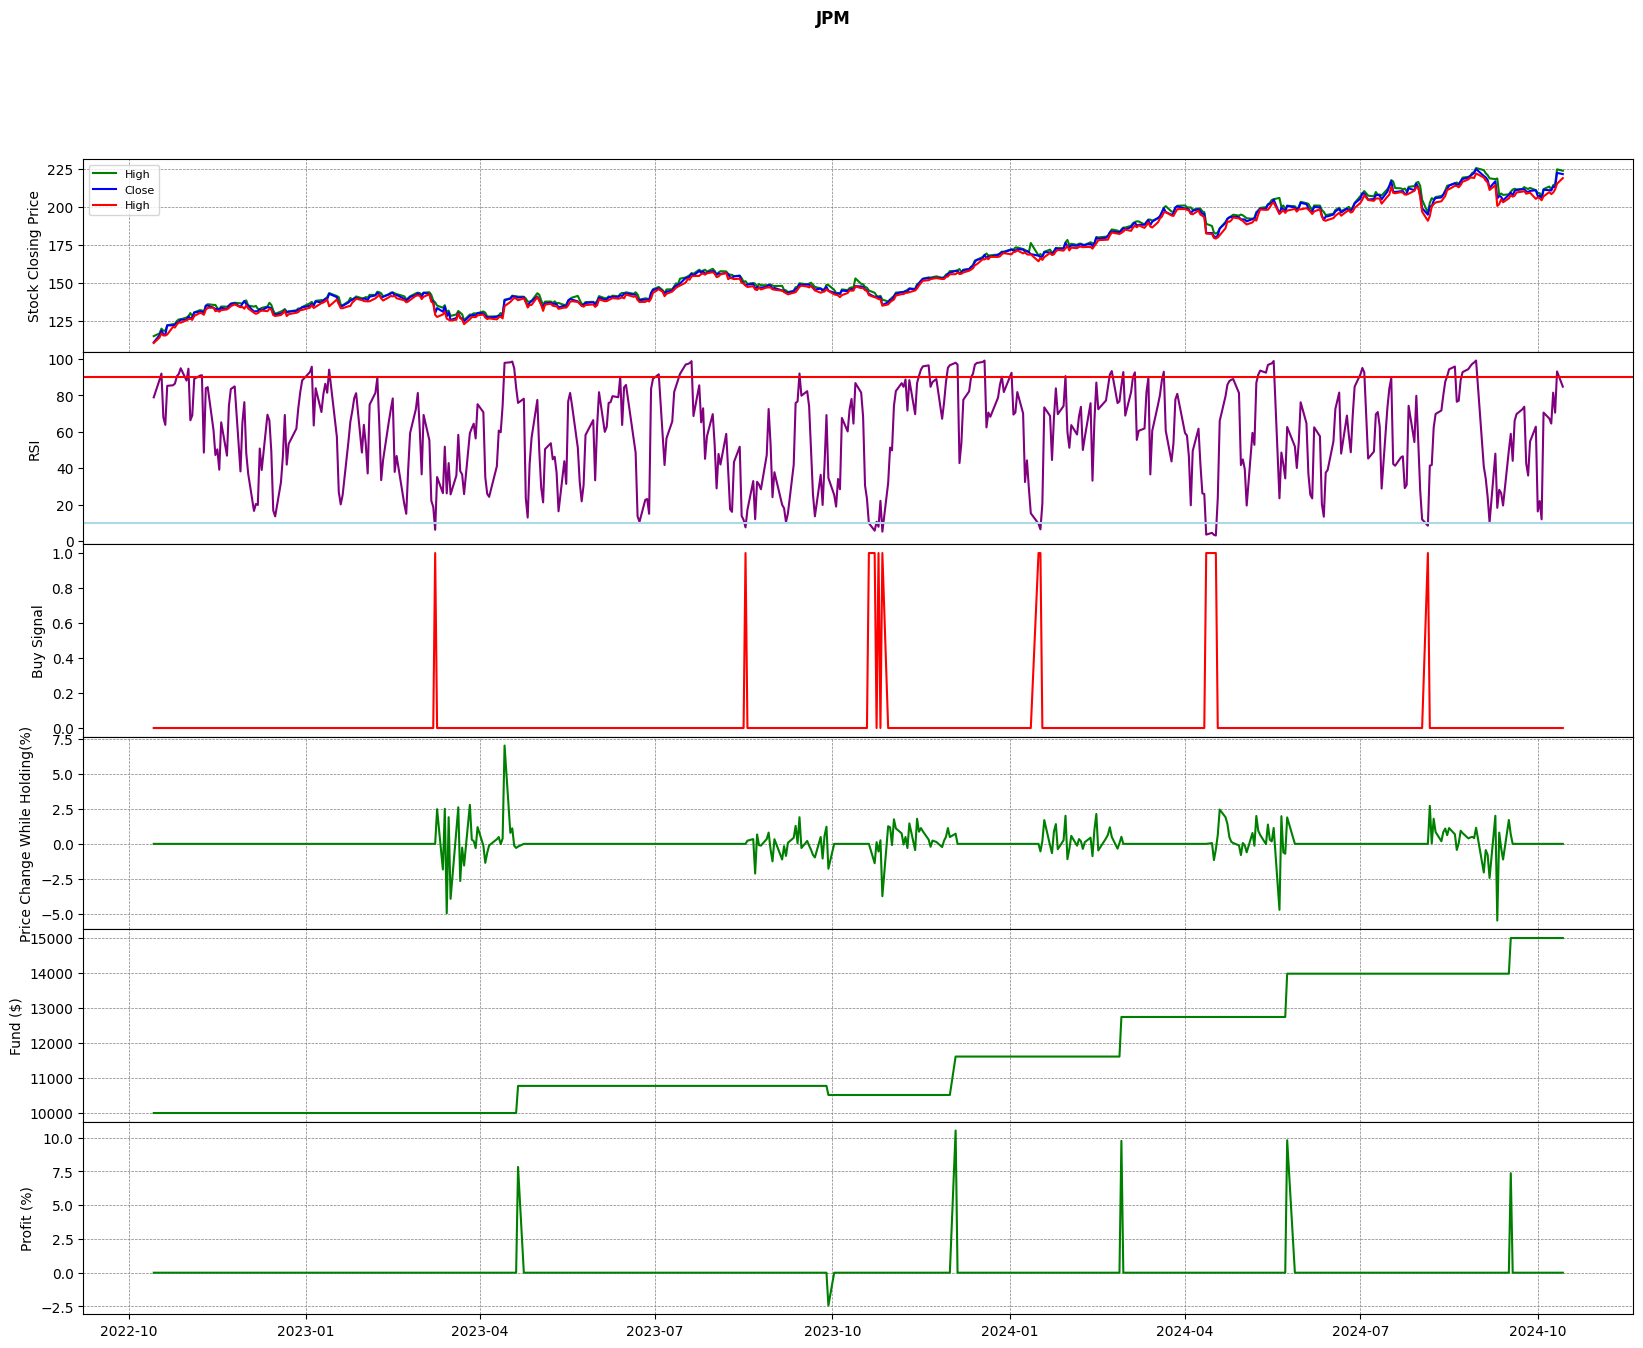

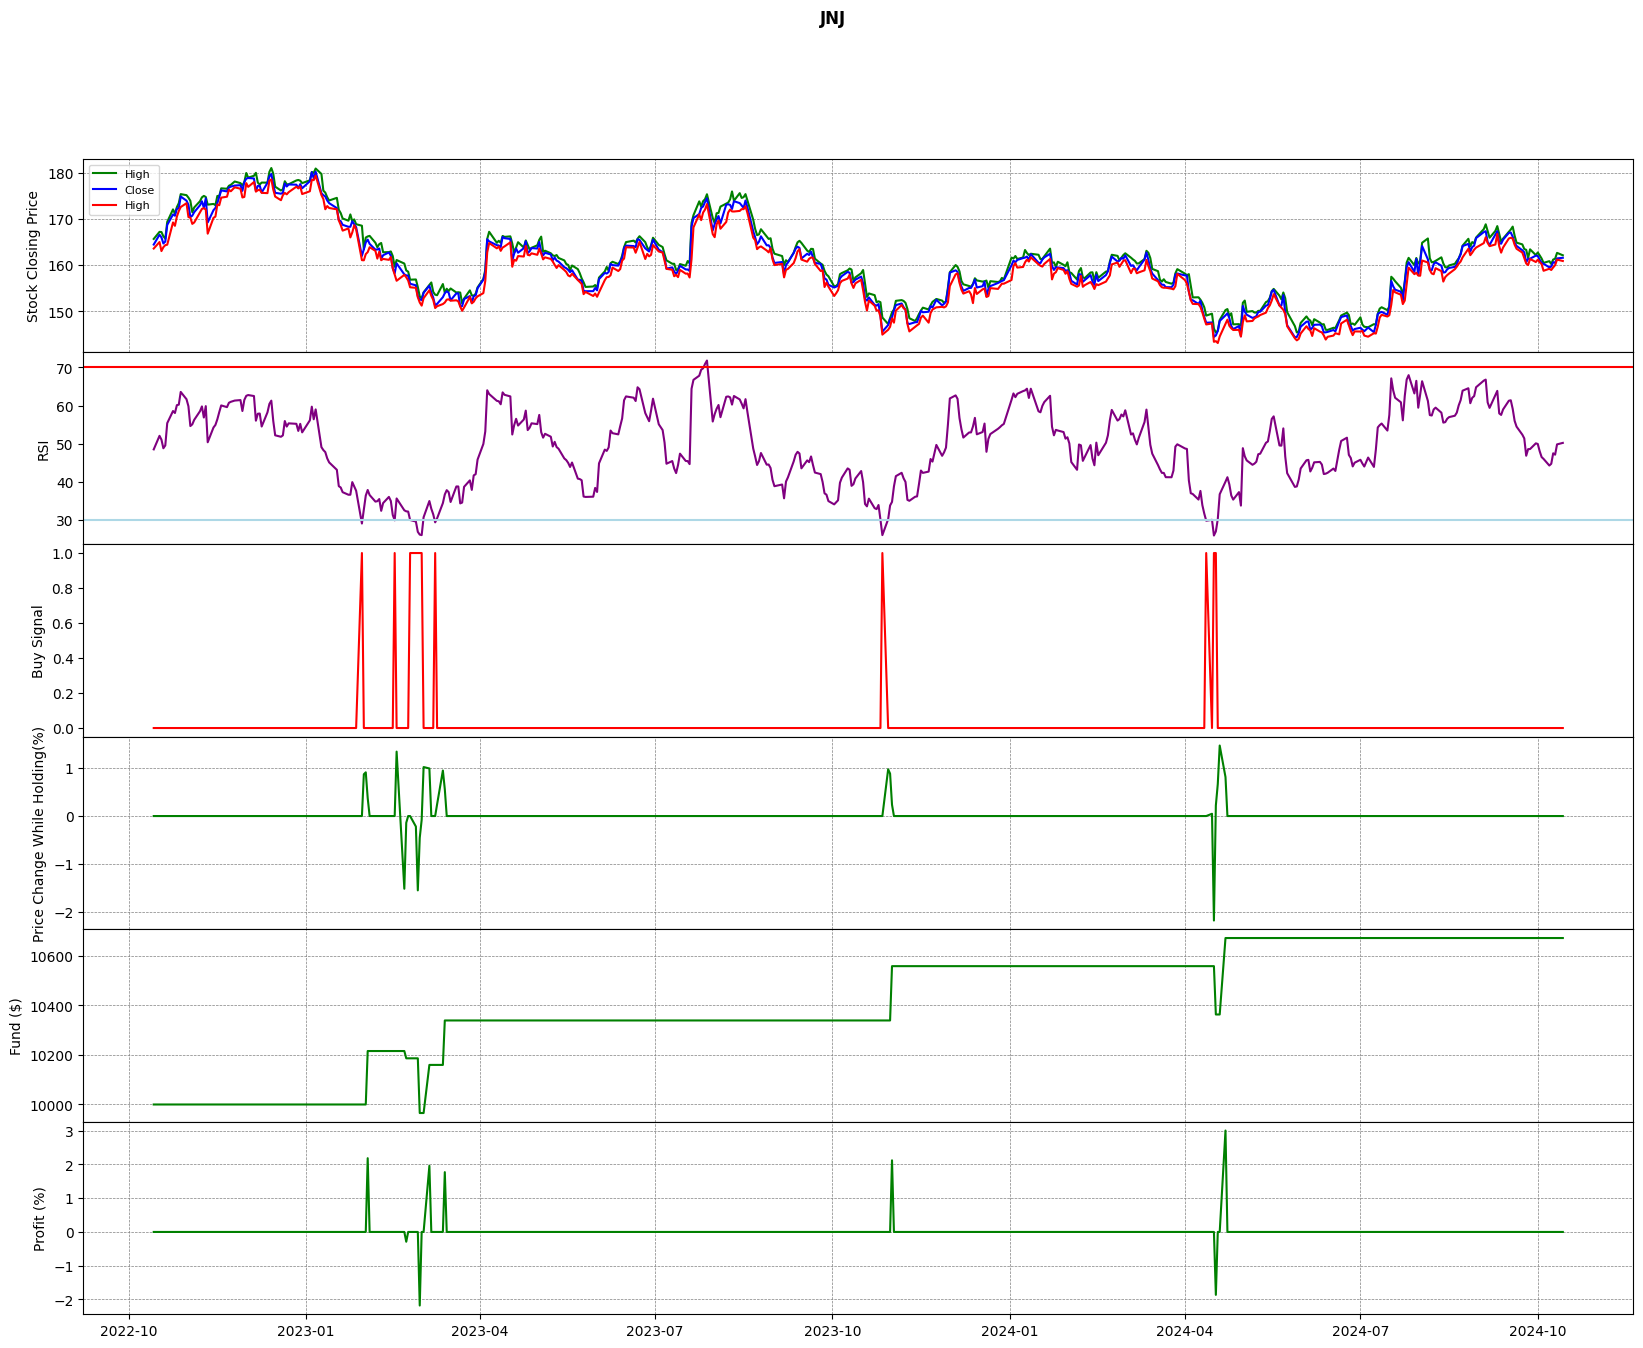

In [50]:
rsi_sum_graph(ibm_rsi_sorted[0], 'IBM', 70, 30)
rsi_sum_graph(appl_rsi_sorted[0], 'APPL', 90, 10)
rsi_sum_graph(nvda_rsi_sorted[0], 'NVDA', 90, 10)
rsi_sum_graph(tsla_rsi_sorted[0], 'TSLA', 85, 15)
rsi_sum_graph(jpm_rsi_sorted[0], 'JPM', 90, 10)
rsi_sum_graph(jnj_rsi_sorted[0], 'JNJ', 70, 30)

In [16]:
# Automation Graphing Template

def ema_sum_graph(data, stock):
    fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1, sharex=True, figsize=(20, 15))
    fig.suptitle(stock)


    ax1.plot(data.index, data['Close'], label='Closing Price')
    ax1.set_ylabel('Stock Closing Price')
    ax1.grid(True, which='both', color='gray', linestyle='--', linewidth=0.5)

    ax2.plot(data.index, data['Short_EMA'], label='Short EMA', color = 'orange')
    ax2.plot(data.index, data['Regular_EMA'], label='Regular EMA', color = 'blue')
    ax2.plot(data.index, data['Long_EMA'], label='Long EMA', color = 'green')
    ax2.legend(fontsize=8)
    ax2.set_ylabel('EMA')

    ax3.plot(data.index, data.iloc[:,4], label='Buy Signals', color = 'red')
    ax3.set_ylabel('Buy Signal')

    ax4.plot(data.index, data['Holding'], label='Price Change(%)', color = 'green')
    ax4.set_ylabel('Price Change While Holding(%)')
    ax4.grid(True, which='both', color='gray', linestyle='--', linewidth=0.5)

    ax5.plot(data.index, data['Fund'], label= 'Funds', color = 'green')
    ax5.set_ylabel('Fund ($)')
    ax5.grid(True, which='both', color='gray', linestyle='--', linewidth=0.5)

    ax6.plot(data.index, data['Profit(%)'], label = 'Profit(%)', color = 'green')
    ax6.set_ylabel('Profit (%)')




    ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax3.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax4.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax5.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

    plt.subplots_adjust(hspace=0)

    plt.show()

    return

In [17]:
def ema_signal(data, div=False):
    #if div:
    #    data = bull_d(data, 'EMA' candle)
    #    data = bear_d(data, 'EMA', candle)
    data['Buy_Signal'] = (data['Short_EMA'] > data['Long_EMA']) & (data['Short_EMA'].shift() < data['Long_EMA'].shift())
    data['Sell_Signal'] = (data['Short_EMA'] < data['Long_EMA']) & (data['Short_EMA'].shift() > data['Long_EMA'].shift())
    data['EMA_Signal'] = (data['Buy_Signal']) & (data['Sell_Signal'] == False)
    #data = data.loc[:,['High','Low','Close','Volume','EMA','EMA_Signal']]

    return data

def ema_automation(data, fy=False):
    dfs = []
    r = 14
    coms = [[5,15],[10,20],[10,25],[12,26],[15,30],[10,50],[20,50]]
    #coms = [[5,20],[8,21],[9,21],[10,25],[10,50],[12,26],[14,28],[15,30],[18,36],[20,50], [25,100]]
    holds = [1,3,5,7,10,14,21,30]
    for sh,lo in coms:
        for h in holds:
            d = data.copy()[['Close']]
            if fy:
                d = ema(d,sh,r,lo).iloc[-252:].copy()
            else:
                d = ema(d,sh,r,lo).iloc[-502:].copy()
            d = ema_signal(d)
            name = 'S' + str(sh) + 'L' + str(lo) + 'EMA_' + 'Hold' + str(h) + '_Signal'
            d = ti_test(d,'EMA_Signal',h).rename(columns={'EMA_Signal':name}).drop(columns=['Buy_Signal','Sell_Signal','Remainder','Invested','Sold'])
            dfs.append(d)
    return dfs

In [18]:
ibm_ema_test = ema_automation(ibm)
appl_ema_test = ema_automation(appl)
nvda_ema_test = ema_automation(nvda)
tsla_ema_test = ema_automation(tsla)
jpm_ema_test = ema_automation(jpm)
jnj_ema_test = ema_automation(jnj)
ibm_ema_sorted = sorted(ibm_ema_test, key=get_fund, reverse=True)
appl_ema_sorted = sorted(appl_ema_test, key=get_fund, reverse=True)
nvda_ema_sorted = sorted(nvda_ema_test, key=get_fund, reverse=True)
tsla_ema_sorted = sorted(tsla_ema_test, key=get_fund, reverse=True)
jpm_ema_sorted = sorted(jpm_ema_test, key=get_fund, reverse=True)
jnj_ema_sorted = sorted(jnj_ema_test, key=get_fund, reverse=True)

In [19]:
ibm_ema_columns = combo_order(ibm_ema_sorted)
appl_ema_columns = combo_order(appl_ema_sorted)
nvda_ema_columns = combo_order(nvda_ema_sorted)
tsla_ema_columns = combo_order(tsla_ema_sorted)
jpm_ema_columns = combo_order(jpm_ema_sorted)
jnj_ema_columns = combo_order(jnj_ema_sorted)
ibm_ema_columns[0:10]
#appl_ema_columns[0:10]
#nvda_ema_columns[0:10]
#tsla_ema_columns[0:10]
#jpm_ema_columns[0:10]
#jnj_ema_columns[0:10]
#ibm_ema_columns

['S5L15EMA_Hold21_Signal',
 'S5L15EMA_Hold30_Signal',
 'S5L15EMA_Hold14_Signal',
 'S10L50EMA_Hold30_Signal',
 'S10L50EMA_Hold21_Signal',
 'S5L15EMA_Hold10_Signal',
 'S20L50EMA_Hold30_Signal',
 'S15L30EMA_Hold21_Signal',
 'S5L15EMA_Hold7_Signal',
 'S10L50EMA_Hold10_Signal']

In [20]:
ibm_ema_columns[0], appl_ema_columns[0], nvda_ema_columns[0], tsla_ema_columns[0], jpm_ema_columns[0], jnj_ema_columns[0]

('S5L15EMA_Hold21_Signal',
 'S10L20EMA_Hold30_Signal',
 'S5L15EMA_Hold30_Signal',
 'S10L25EMA_Hold21_Signal',
 'S5L15EMA_Hold30_Signal',
 'S5L15EMA_Hold10_Signal')

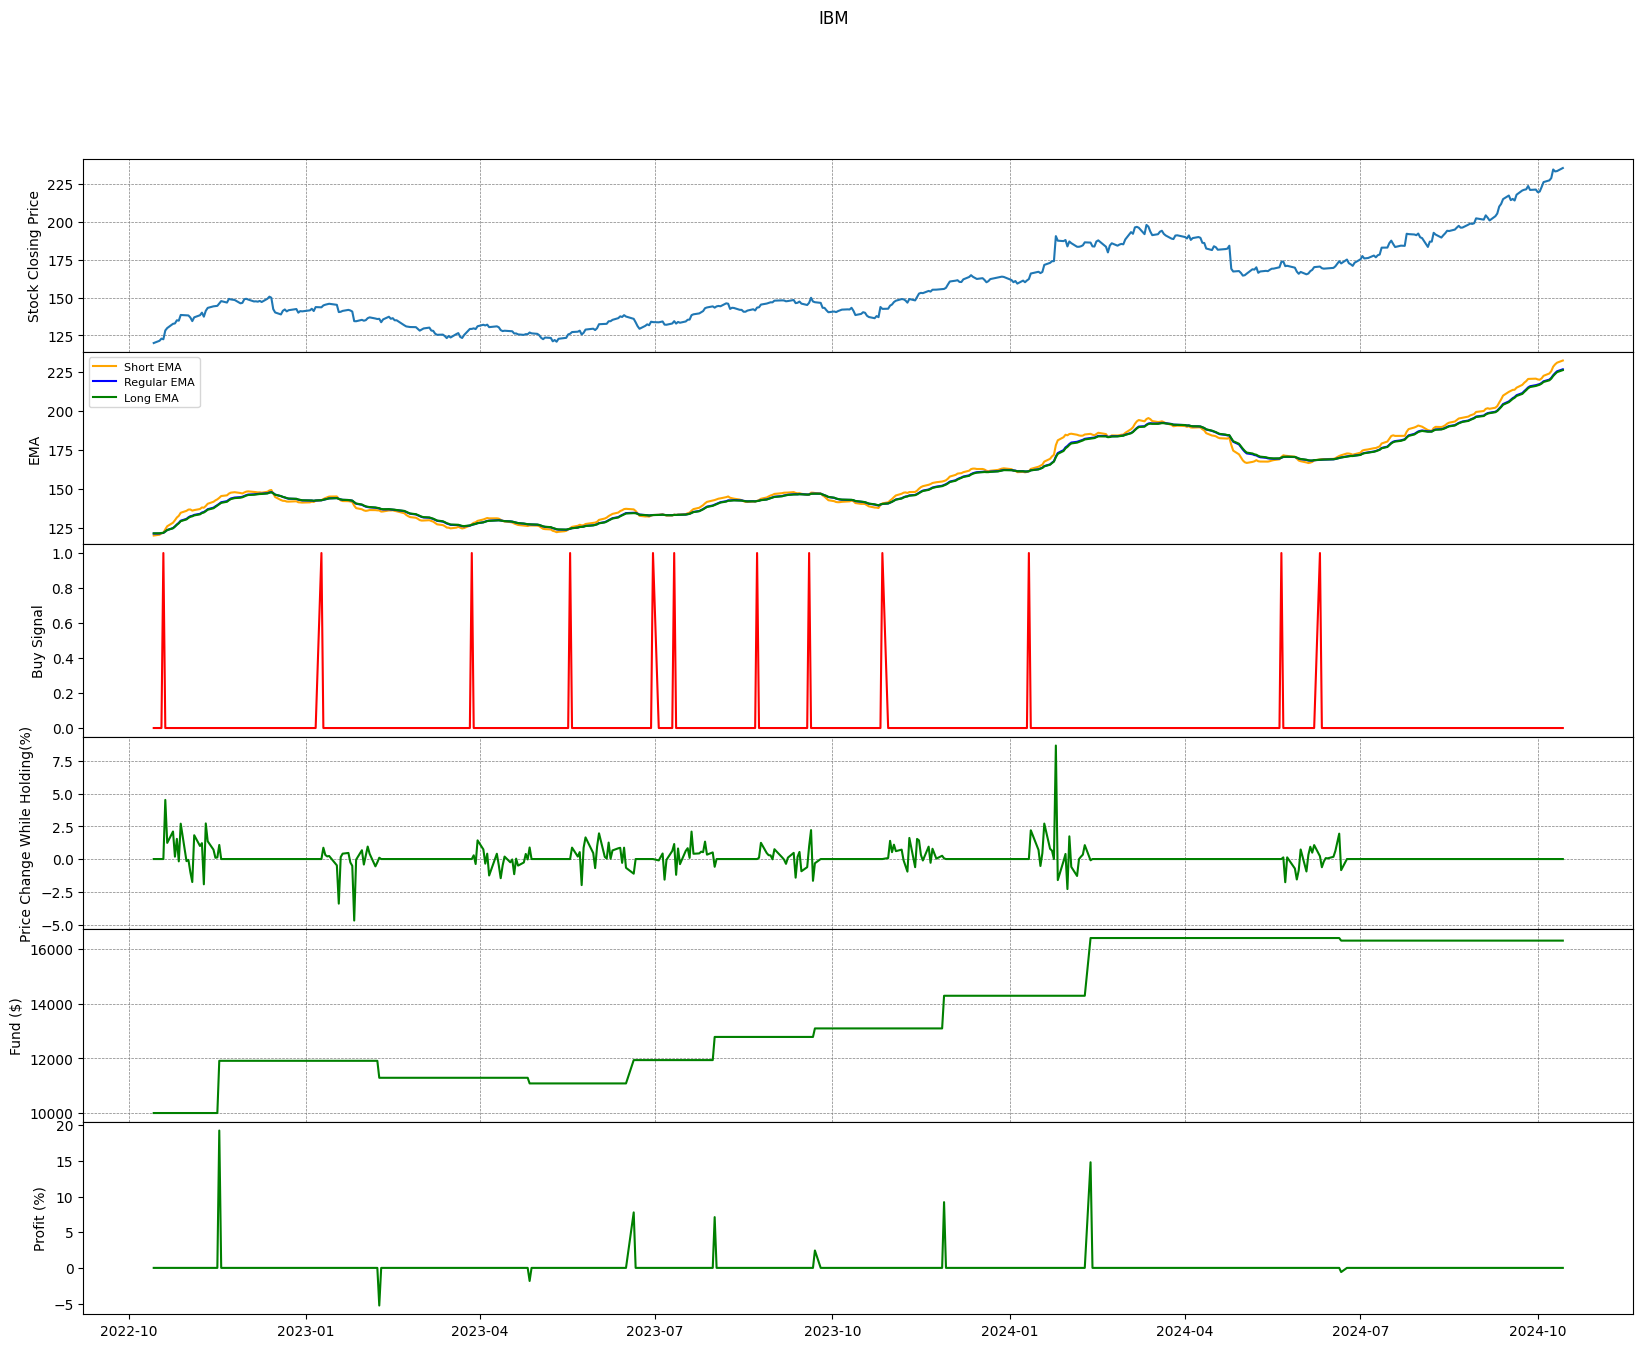

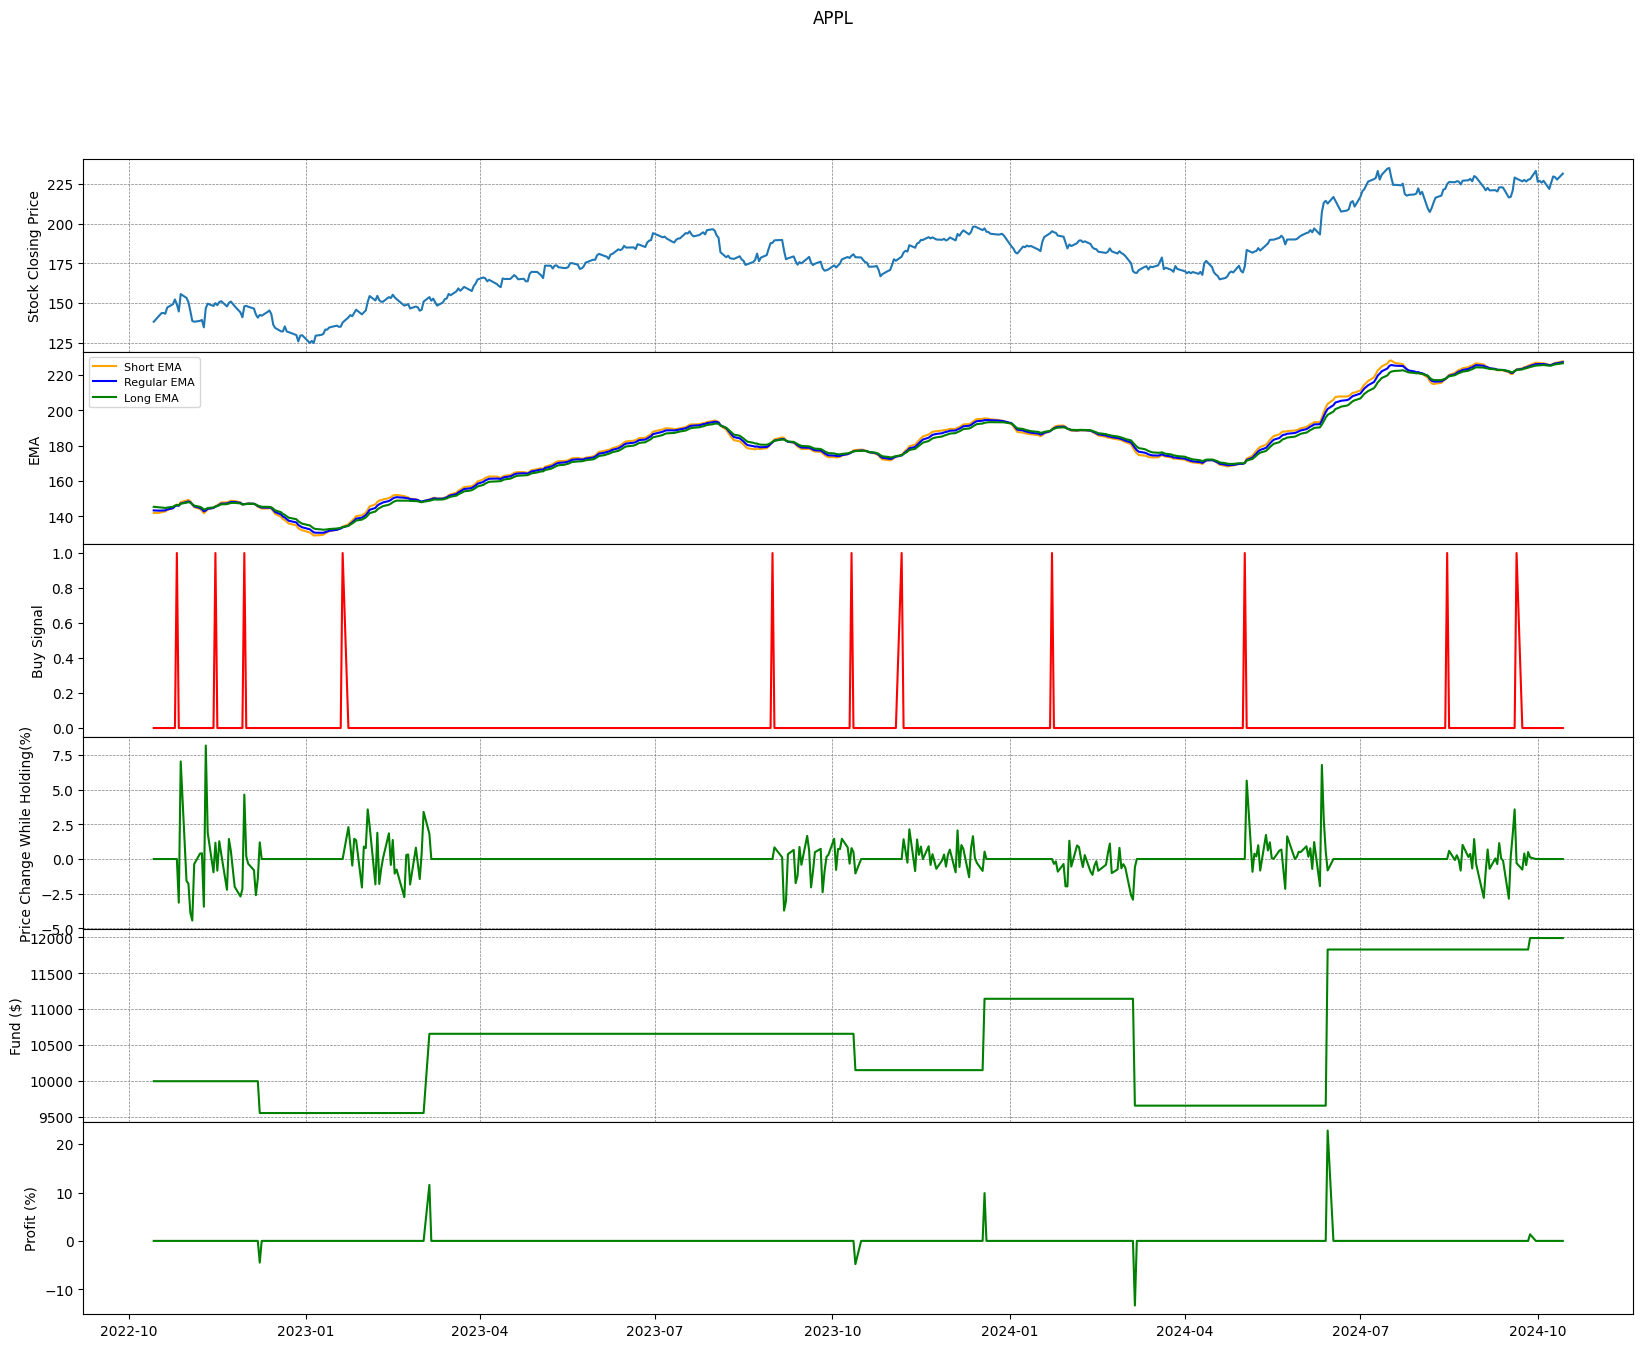

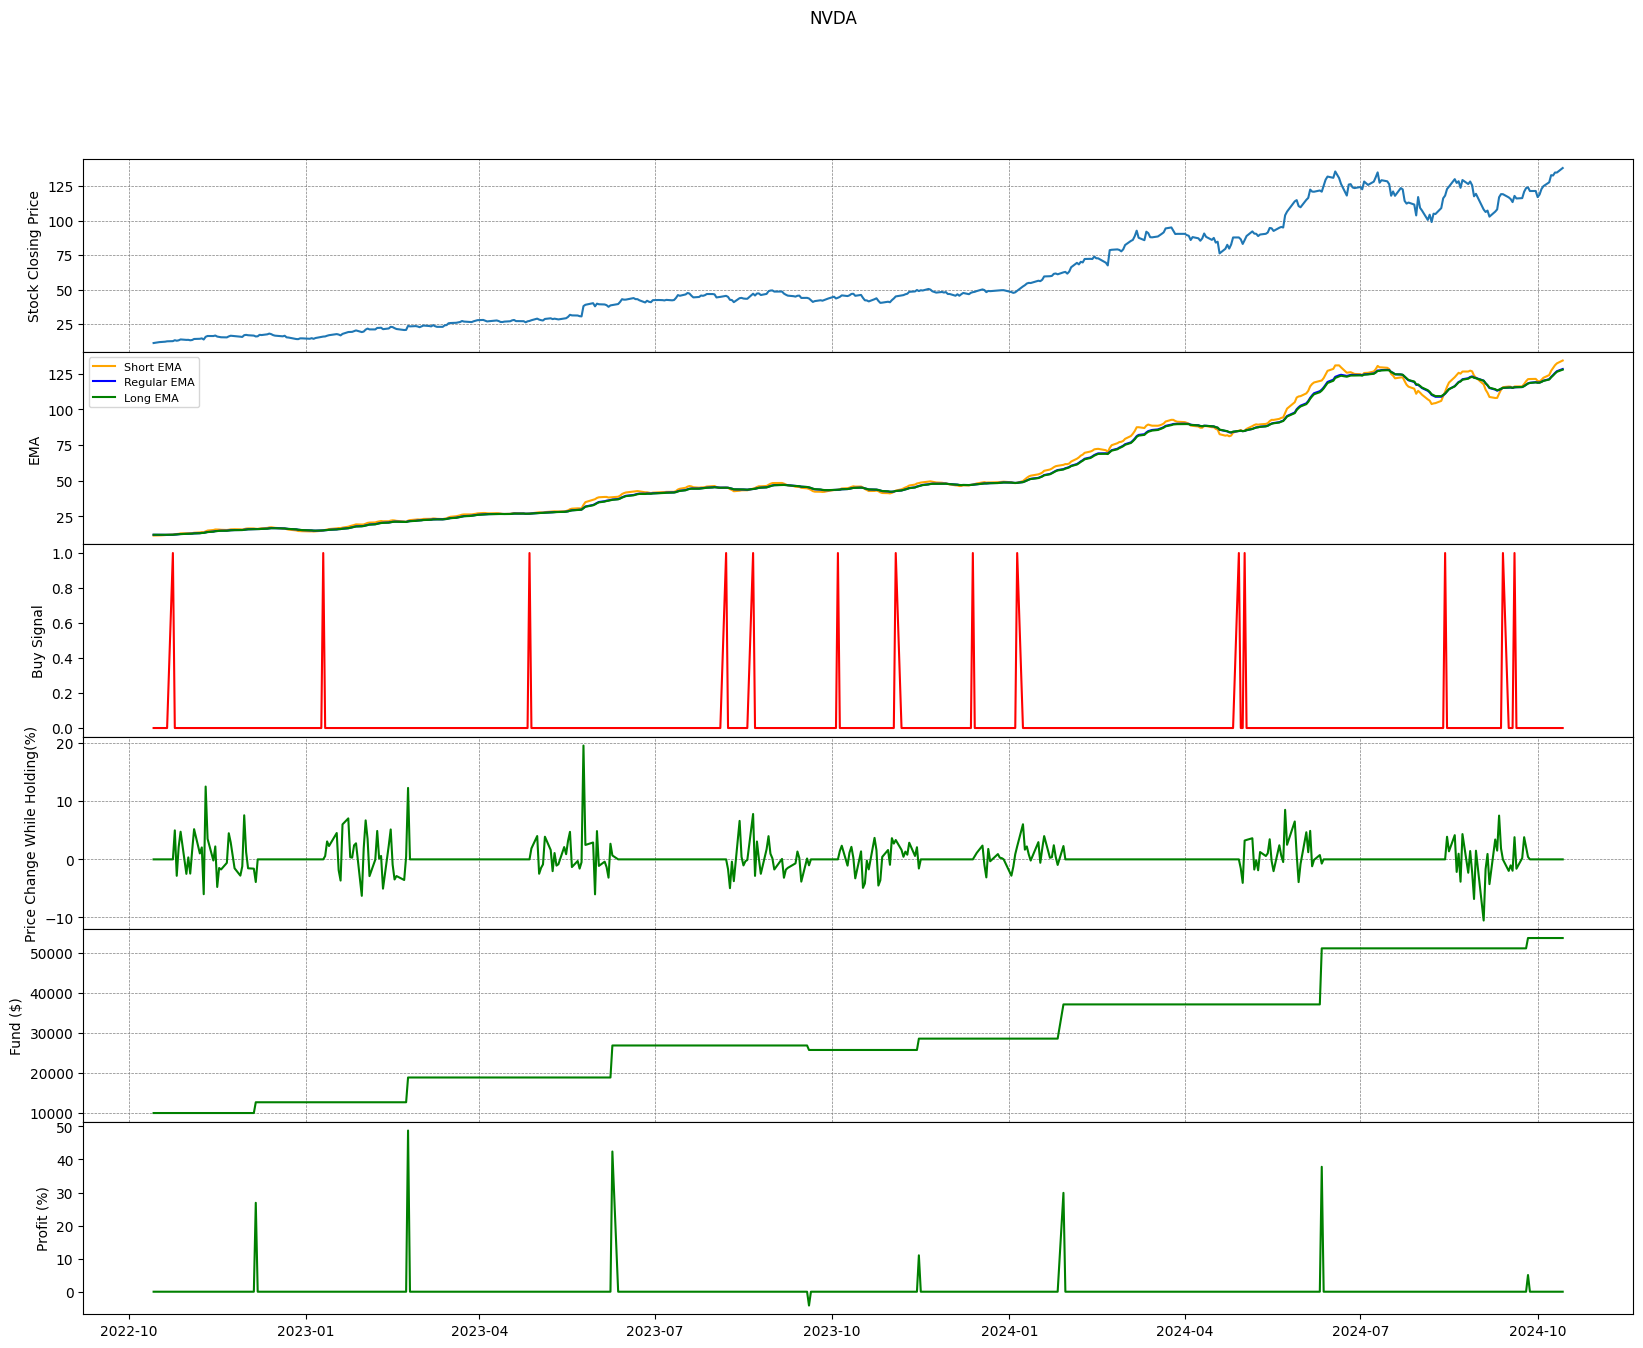

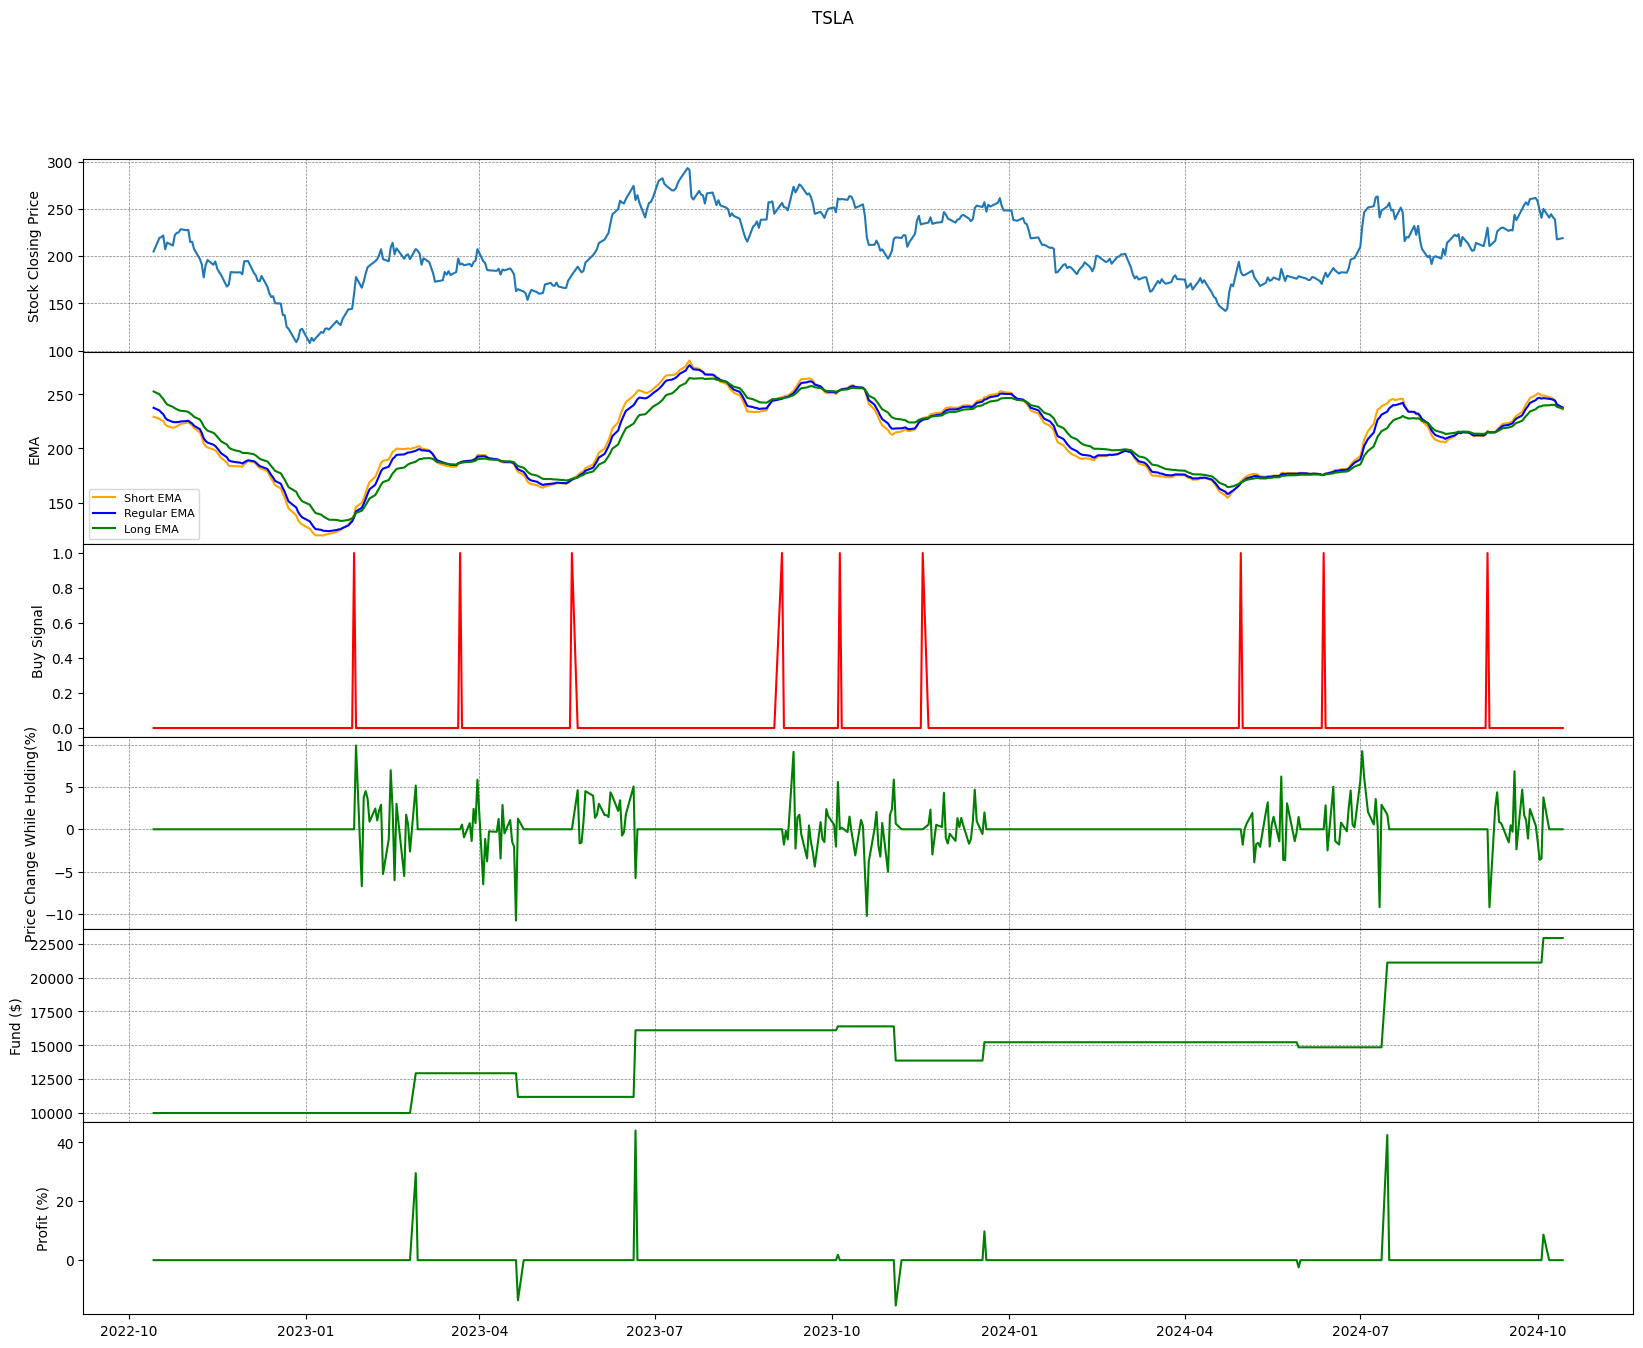

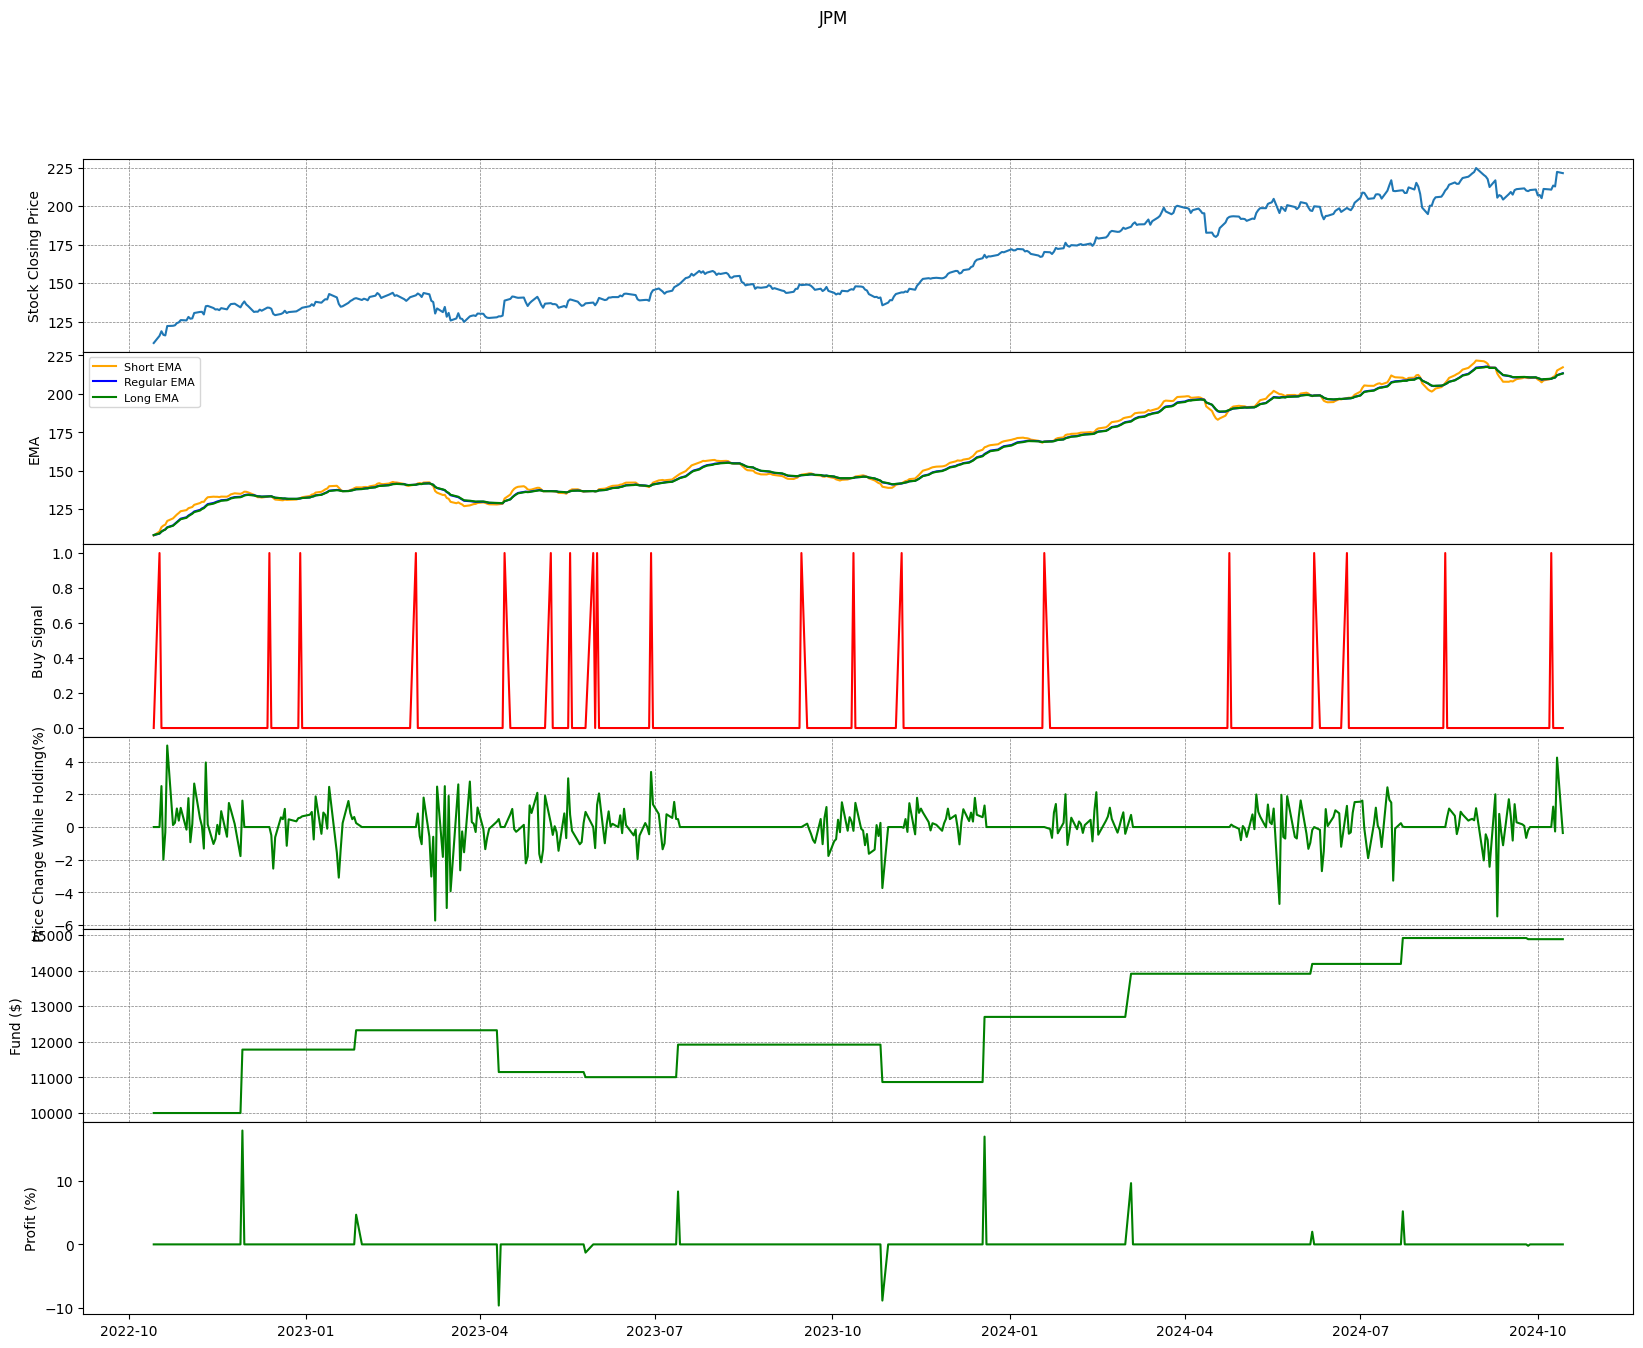

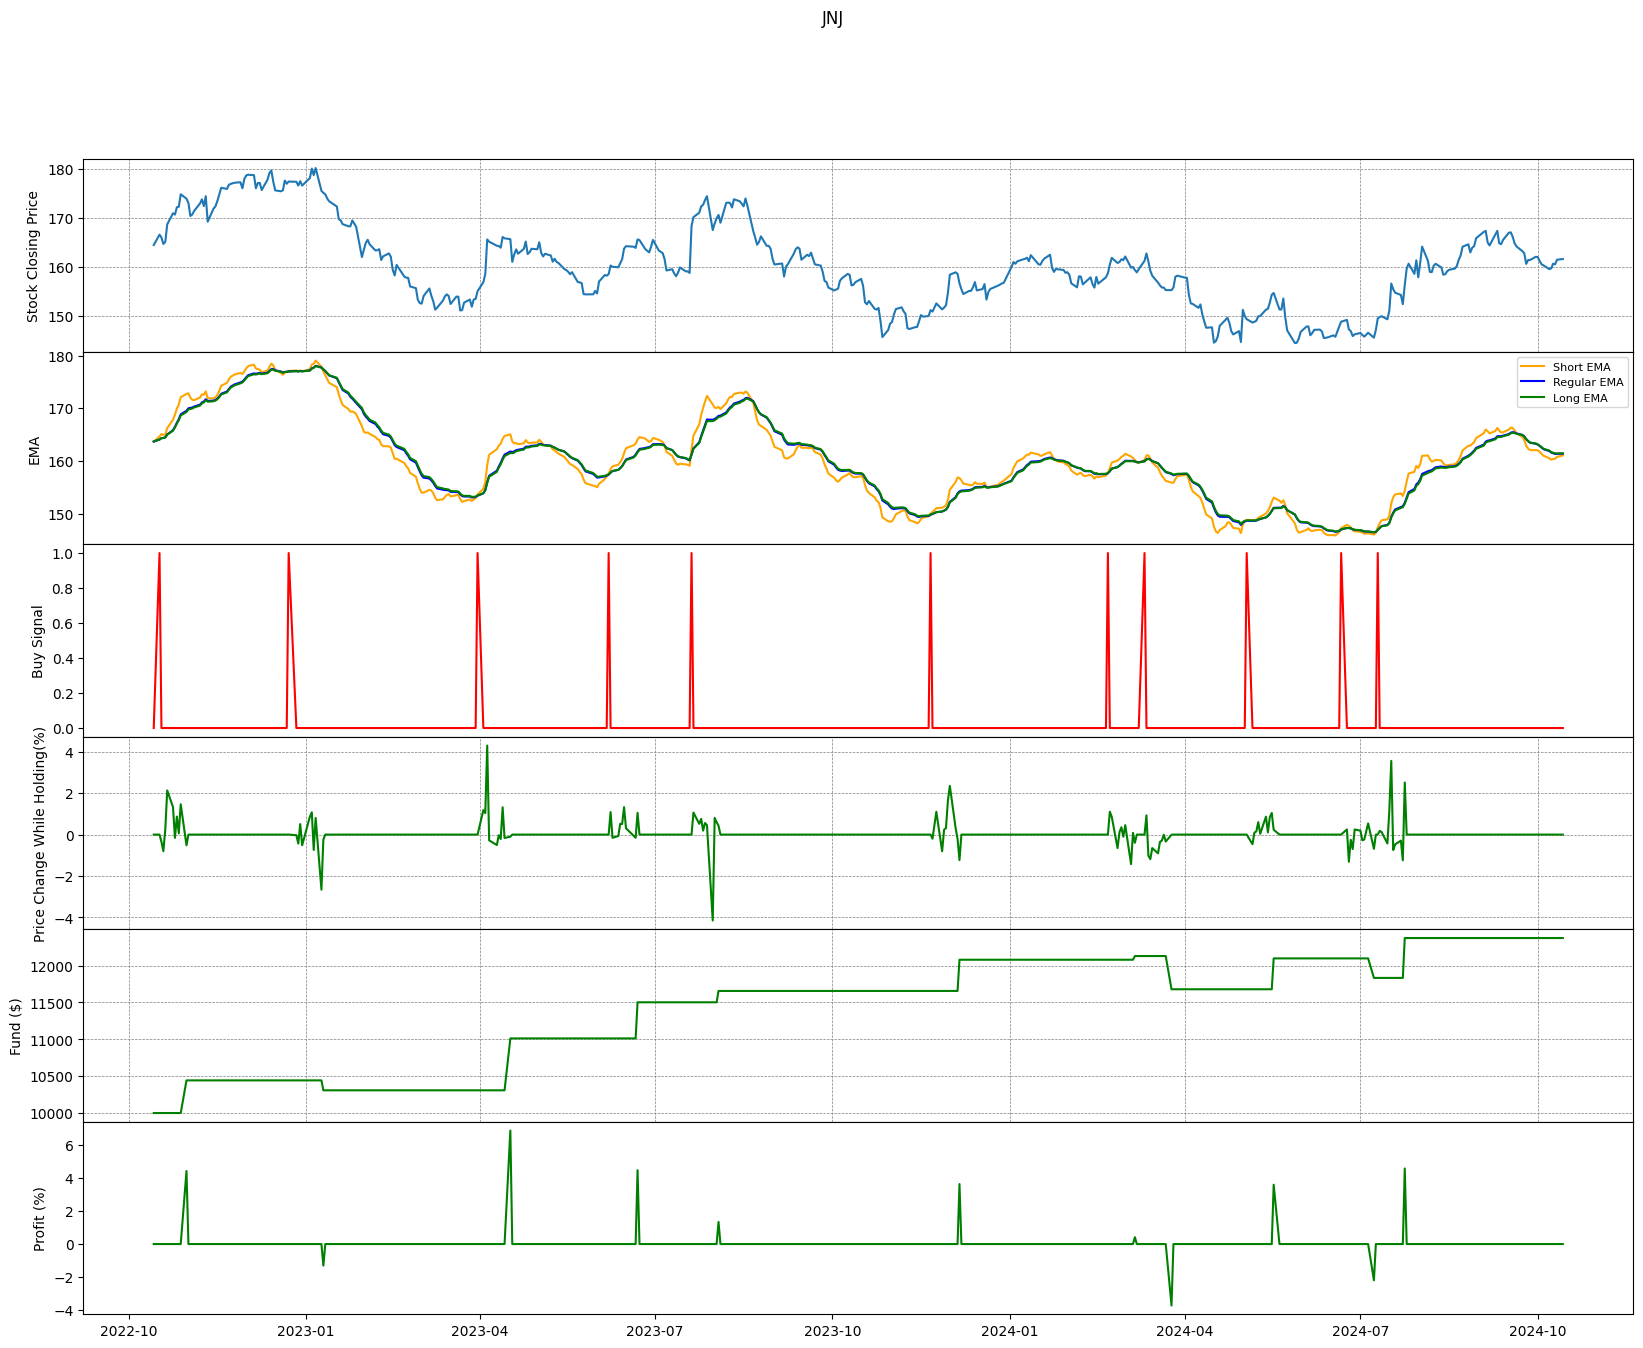

In [21]:
ema_sum_graph(ibm_ema_sorted[0], 'IBM')
ema_sum_graph(appl_ema_sorted[0], 'APPL')
ema_sum_graph(nvda_ema_sorted[0], 'NVDA')
ema_sum_graph(tsla_ema_sorted[0], 'TSLA')
ema_sum_graph(jpm_ema_sorted[0], 'JPM')
ema_sum_graph(jnj_ema_sorted[0], 'JNJ')

In [22]:
def macd_signal(data, div=False):
    #if div:
    #    data = bull_d(data, 'EMA' candle)
    #    data = bear_d(data, 'EMA', candle)
    data['Buy_Signal'] = (data['MACD'] > data['MACD_Sig']) & (data['MACD'].shift() < data['MACD_Sig'].shift())
    data['Sell_Signal'] = (data['MACD'] < data['MACD_Sig']) & (data['MACD'].shift() > data['MACD_Sig'].shift())
    data['MACD_Signal'] = (data['Buy_Signal']) & (data['Sell_Signal'] == False)
    #data = data.loc[:,['High','Low','Close','Volume','EMA','EMA_Signal']]
    return data

def macd_automation(data, fy=False):
    dfs = []
    coms = [[12,26,9],[8,17,9], [5,35,5], [5,15,5], [6,19,6], [10,30,9],[8,24,9], [14,48,9], [20,50,10]]
    holds = [10,14,15,18,20,25,30,35]
    for sh,lo,sig in coms:
        for h in holds:
            d = data.copy()[['Close']]
            if fy:
                d = macd(d,sh,lo,sig).iloc[-252:].copy()
            else:
                d = macd(d,sh,lo,sig).iloc[-502:].copy()
            d = macd_signal(d).copy()
            name = 'S' + str(sh) + 'L' + str(lo) + 'Sig' + str(sig) + 'MACD_' + 'Hold' + str(h) + '_Signal'
            d = ti_test(d,'MACD_Signal',h).rename(columns={'MACD_Signal':name}).drop(columns=['Buy_Signal','Sell_Signal','Remainder','Invested','Sold'])
            dfs.append(d)
    return dfs

In [23]:
ibm_macd_test = macd_automation(ibm)
appl_macd_test = macd_automation(appl)
nvda_macd_test = macd_automation(nvda)
tsla_macd_test = macd_automation(tsla)
jpm_macd_test = macd_automation(jpm)
jnj_macd_test = macd_automation(jnj)
ibm_macd_sorted = sorted(ibm_macd_test, key=get_fund, reverse=True)
appl_macd_sorted = sorted(appl_macd_test, key=get_fund, reverse=True)
nvda_macd_sorted = sorted(nvda_macd_test, key=get_fund, reverse=True)
tsla_macd_sorted = sorted(tsla_macd_test, key=get_fund, reverse=True)
jpm_macd_sorted = sorted(jpm_macd_test, key=get_fund, reverse=True)
jnj_macd_sorted = sorted(jnj_macd_test, key=get_fund, reverse=True)

In [24]:
ibm_macd_columns = combo_order(ibm_macd_sorted)
appl_macd_columns = combo_order(appl_macd_sorted)
nvda_macd_columns = combo_order(nvda_macd_sorted)
tsla_macd_columns = combo_order(tsla_macd_sorted)
jpm_macd_columns = combo_order(jpm_macd_sorted)
jnj_macd_columns = combo_order(jnj_macd_sorted)
ibm_macd_columns[0:10]
#appl_macd_columns[0:10]
#nvda_macd_columns[0:10]
#tsla_macd_columns[0:10]
#jpm_macd_columns[0:10]
#jnj_macd_columns[0:10]
#ibm_macd_columns

['S14L48Sig9MACD_Hold35_Signal',
 'S14L48Sig9MACD_Hold30_Signal',
 'S20L50Sig10MACD_Hold35_Signal',
 'S10L30Sig9MACD_Hold35_Signal',
 'S12L26Sig9MACD_Hold35_Signal',
 'S14L48Sig9MACD_Hold25_Signal',
 'S20L50Sig10MACD_Hold30_Signal',
 'S14L48Sig9MACD_Hold18_Signal',
 'S14L48Sig9MACD_Hold15_Signal',
 'S14L48Sig9MACD_Hold20_Signal']

In [25]:
ibm_macd_columns[0], appl_macd_columns[0], nvda_macd_columns[0], tsla_macd_columns[0], jpm_macd_columns[0], jnj_macd_columns[0]

('S14L48Sig9MACD_Hold35_Signal',
 'S12L26Sig9MACD_Hold20_Signal',
 'S14L48Sig9MACD_Hold35_Signal',
 'S8L17Sig9MACD_Hold30_Signal',
 'S5L15Sig5MACD_Hold18_Signal',
 'S20L50Sig10MACD_Hold15_Signal')

In [26]:
# Automation Graphing Template

def macd_sum_graph(data, stock):
    fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1, sharex=True, figsize=(20, 15))
    fig.suptitle(stock)


    ax1.plot(data.index, data['Close'], label='Closing Price')
    ax1.set_ylabel('Stock Closing Price')
    ax1.grid(True, which='both', color='gray', linestyle='--', linewidth=0.5)

    ax2.plot(data.index, data['MACD'], label='MACD Line', color = 'blue')
    ax2.plot(data.index, data['MACD_Sig'], label='MACD Signal Line', color = 'red')
    ax2.legend(fontsize=8)
    ax2.set_ylabel('MACD')

    ax3.plot(data.index, data.iloc[:,4], label='Buy Signals', color = 'red')
    ax3.set_ylabel('Buy Signal')

    ax4.plot(data.index, data['Holding'], label='Price Change(%)', color = 'green')
    ax4.set_ylabel('Price Change While Holding(%)')
    ax4.grid(True, which='both', color='gray', linestyle='--', linewidth=0.5)

    ax5.plot(data.index, data['Fund'], label= 'Funds', color = 'green')
    ax5.set_ylabel('Fund ($)')
    ax5.grid(True, which='both', color='gray', linestyle='--', linewidth=0.5)

    ax6.plot(data.index, data['Profit(%)'], label = 'Profit(%)', color = 'green')
    ax6.set_ylabel('Profit (%)')




    ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax3.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax4.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax5.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

    plt.subplots_adjust(hspace=0)

    plt.show()

    return

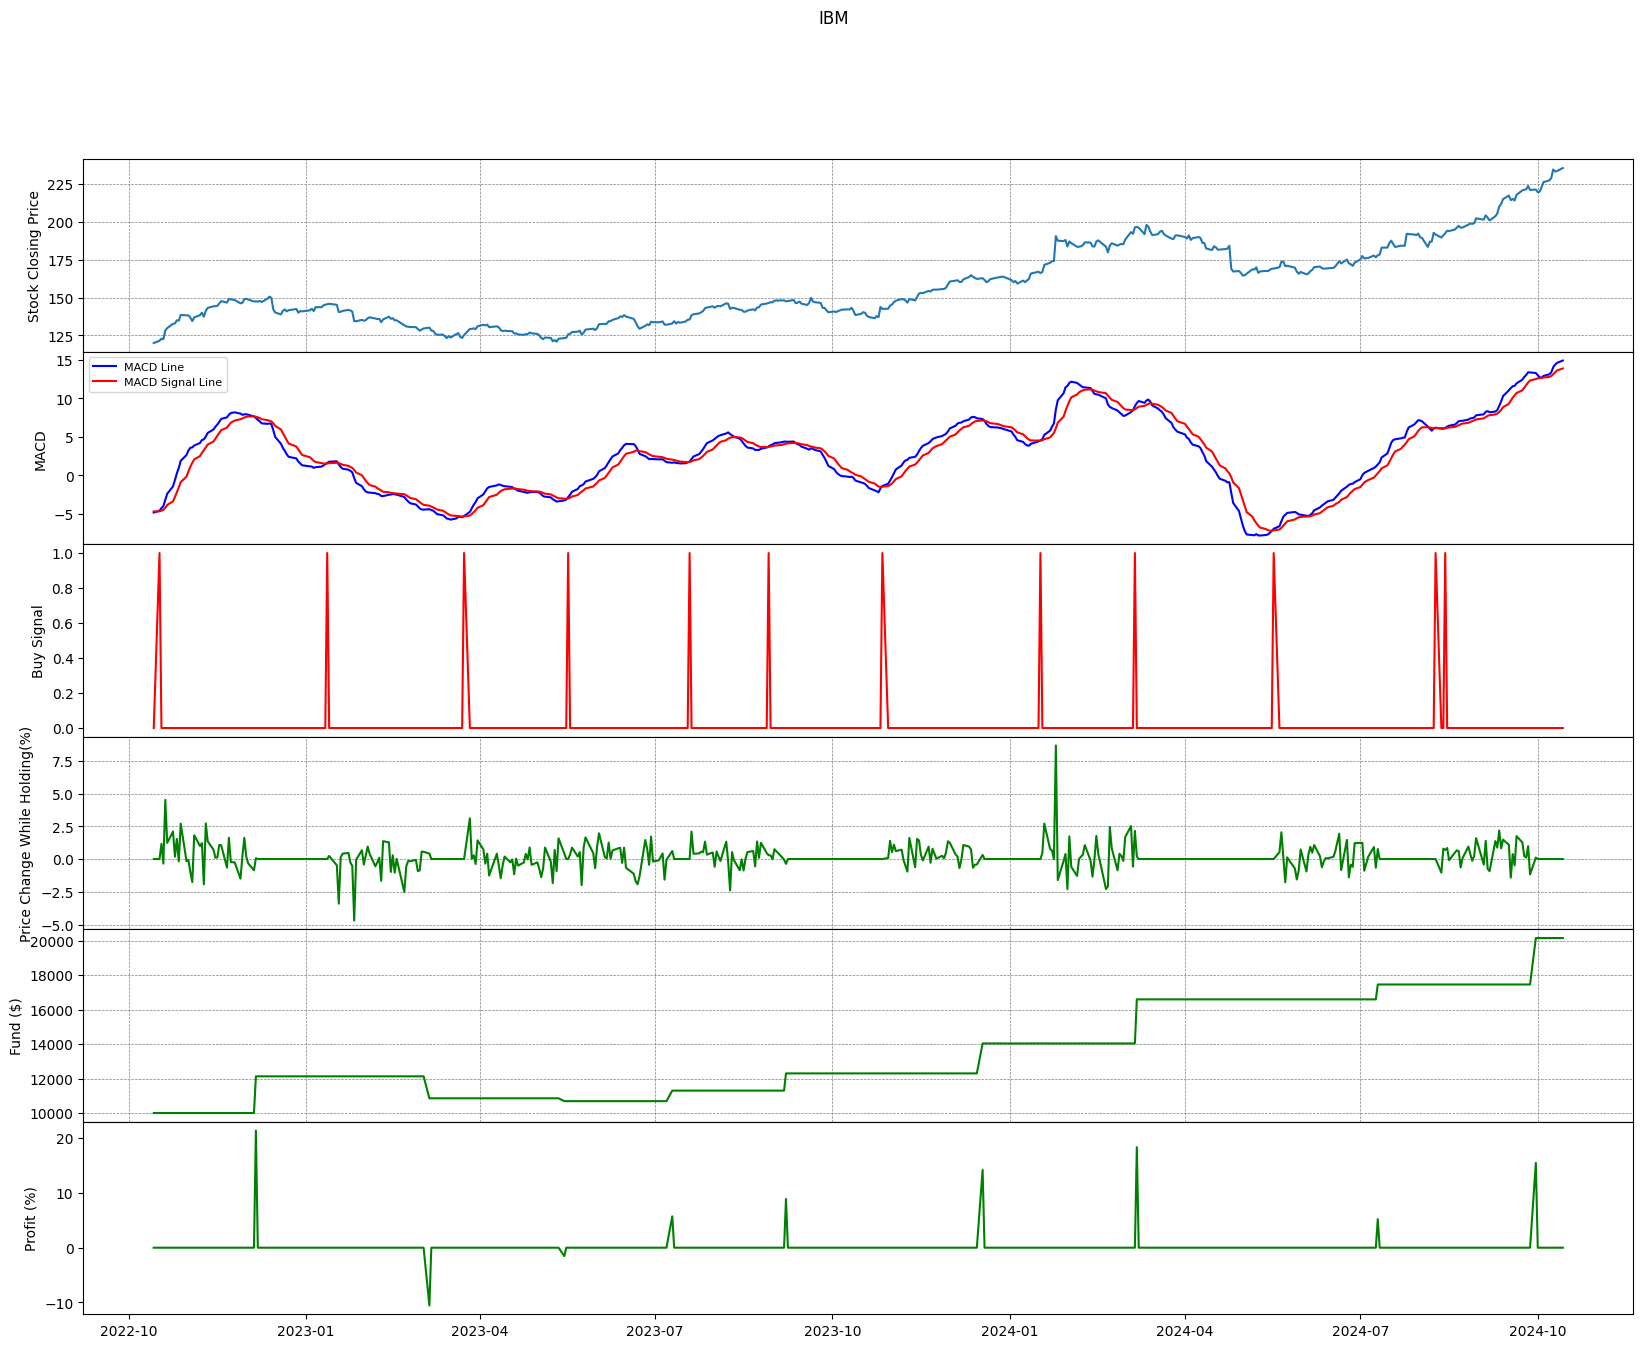

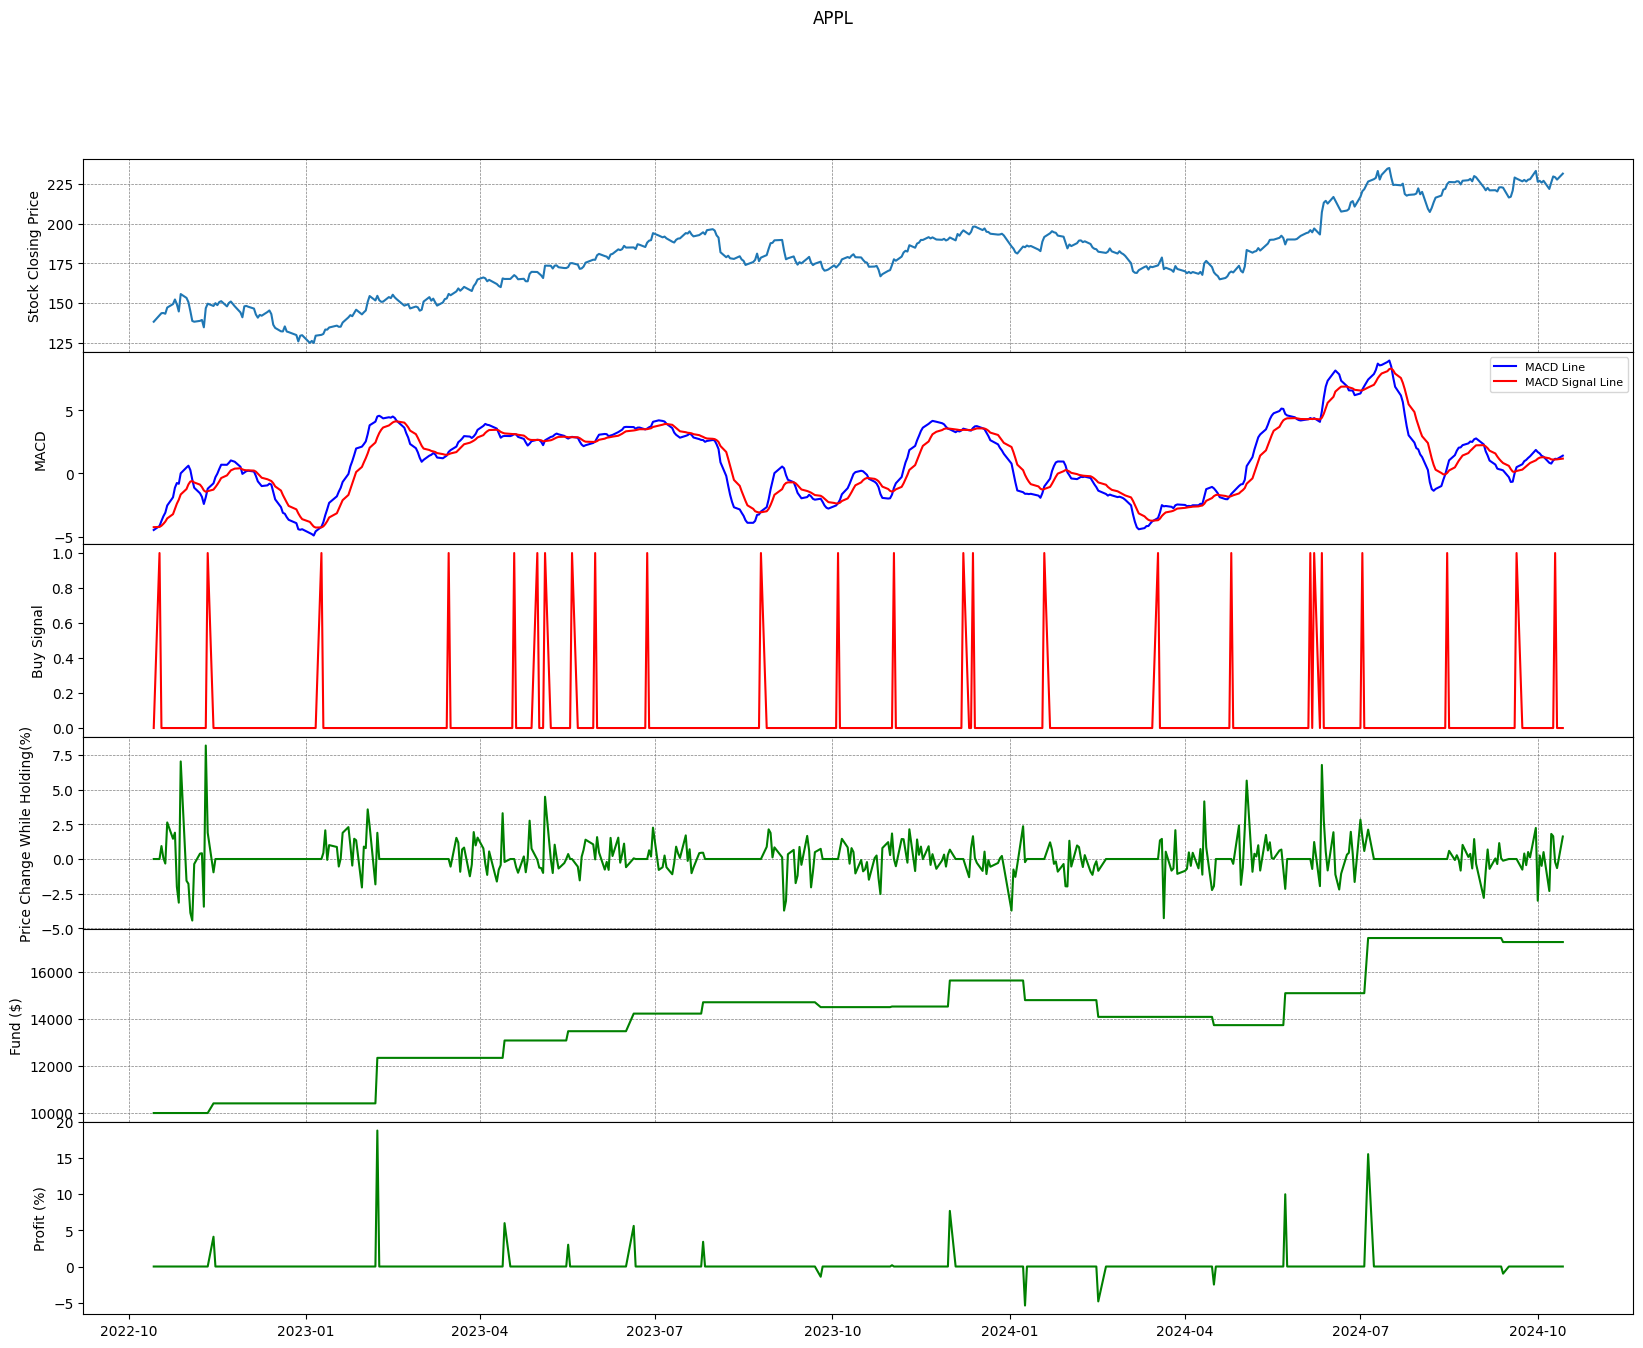

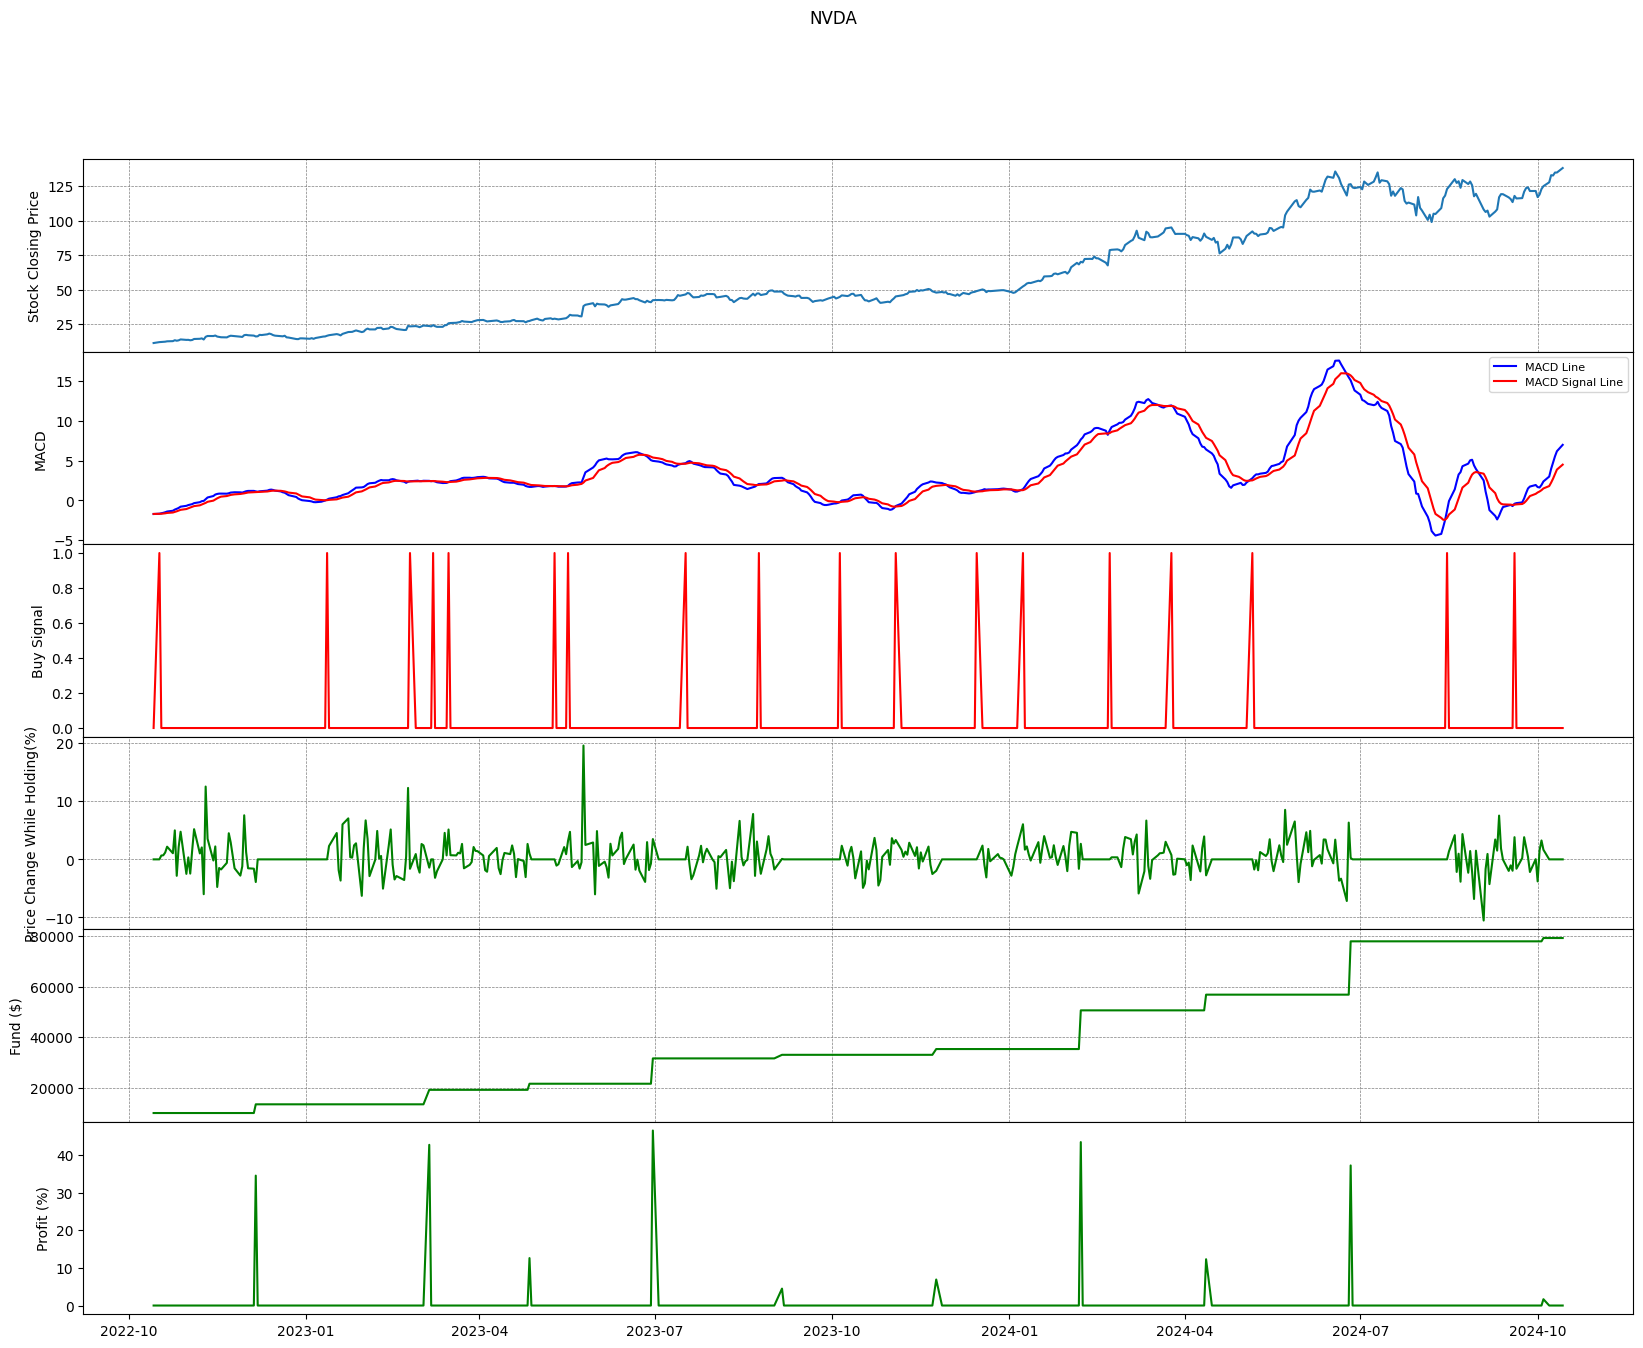

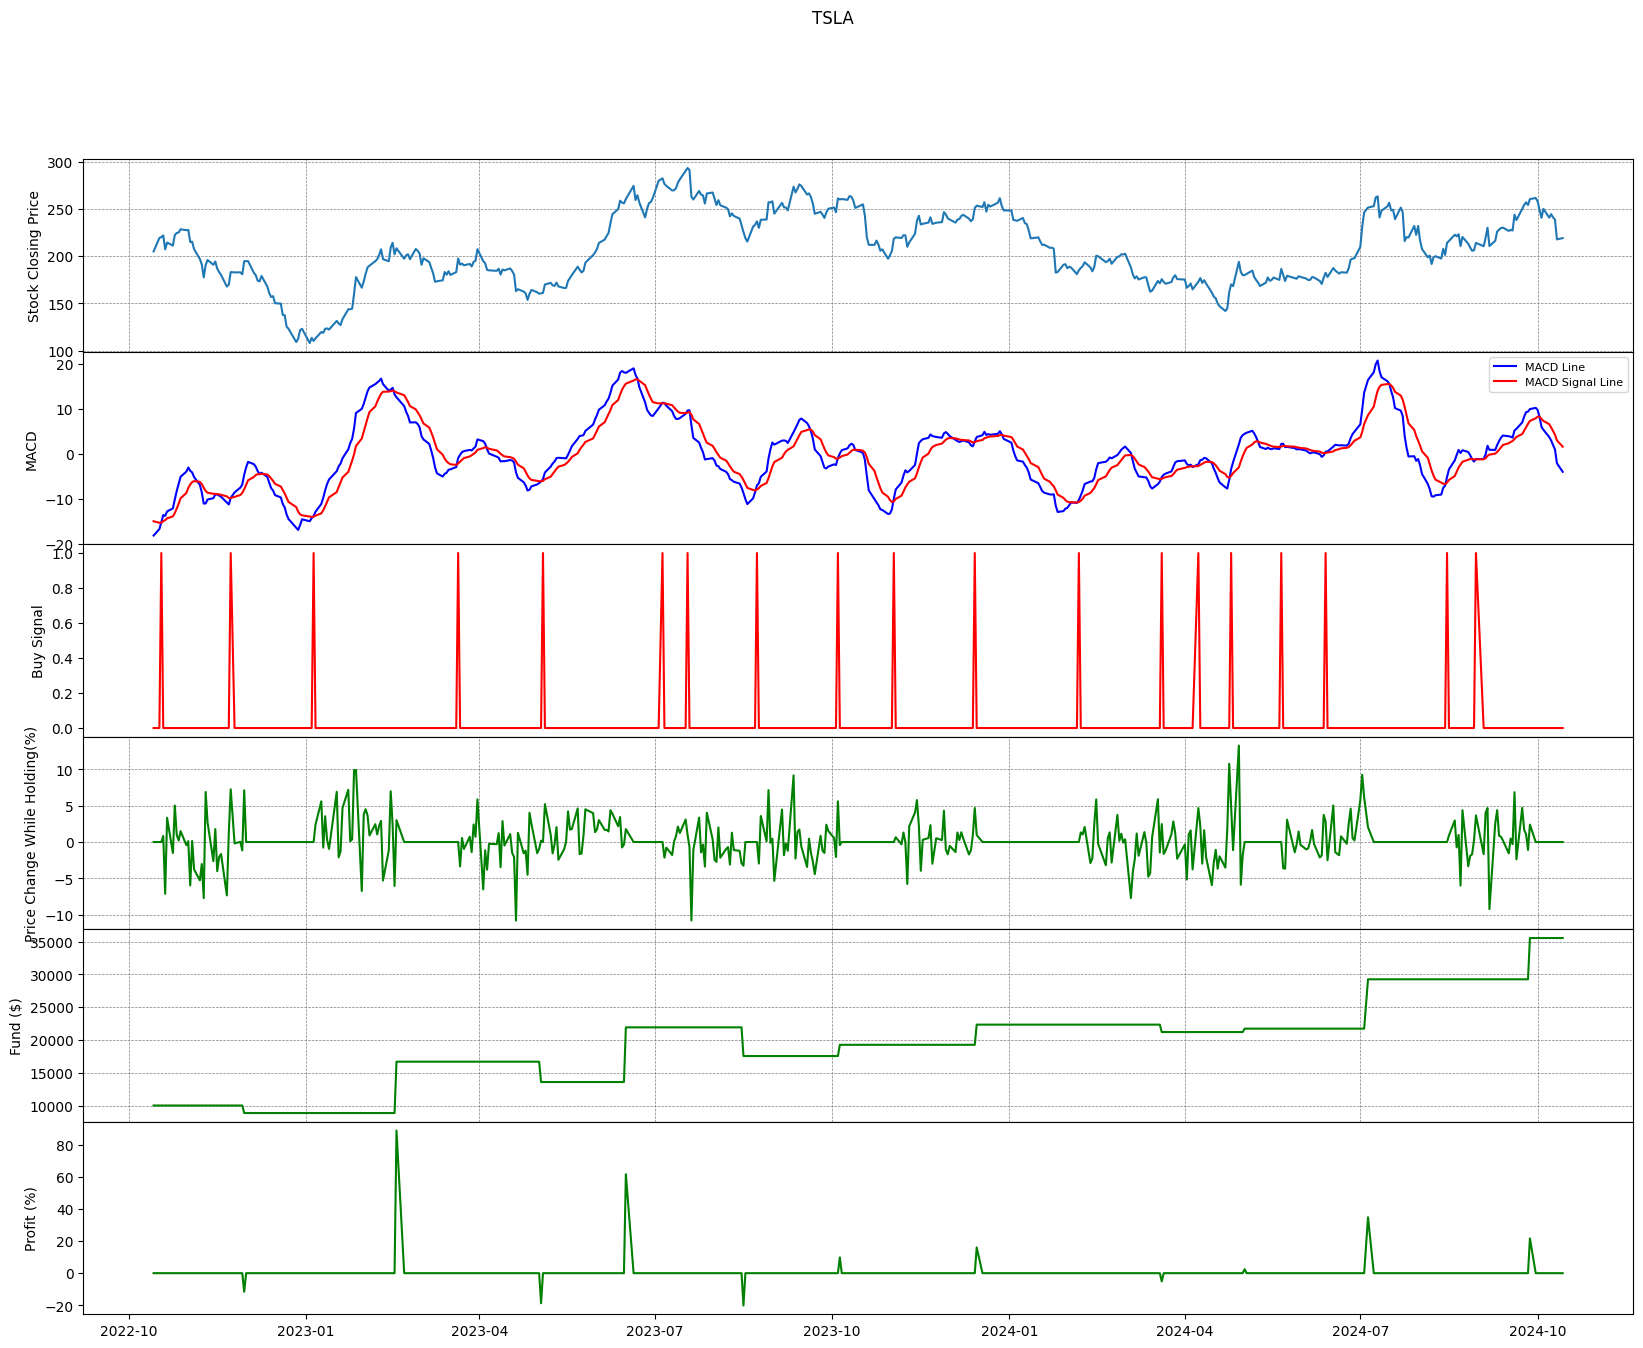

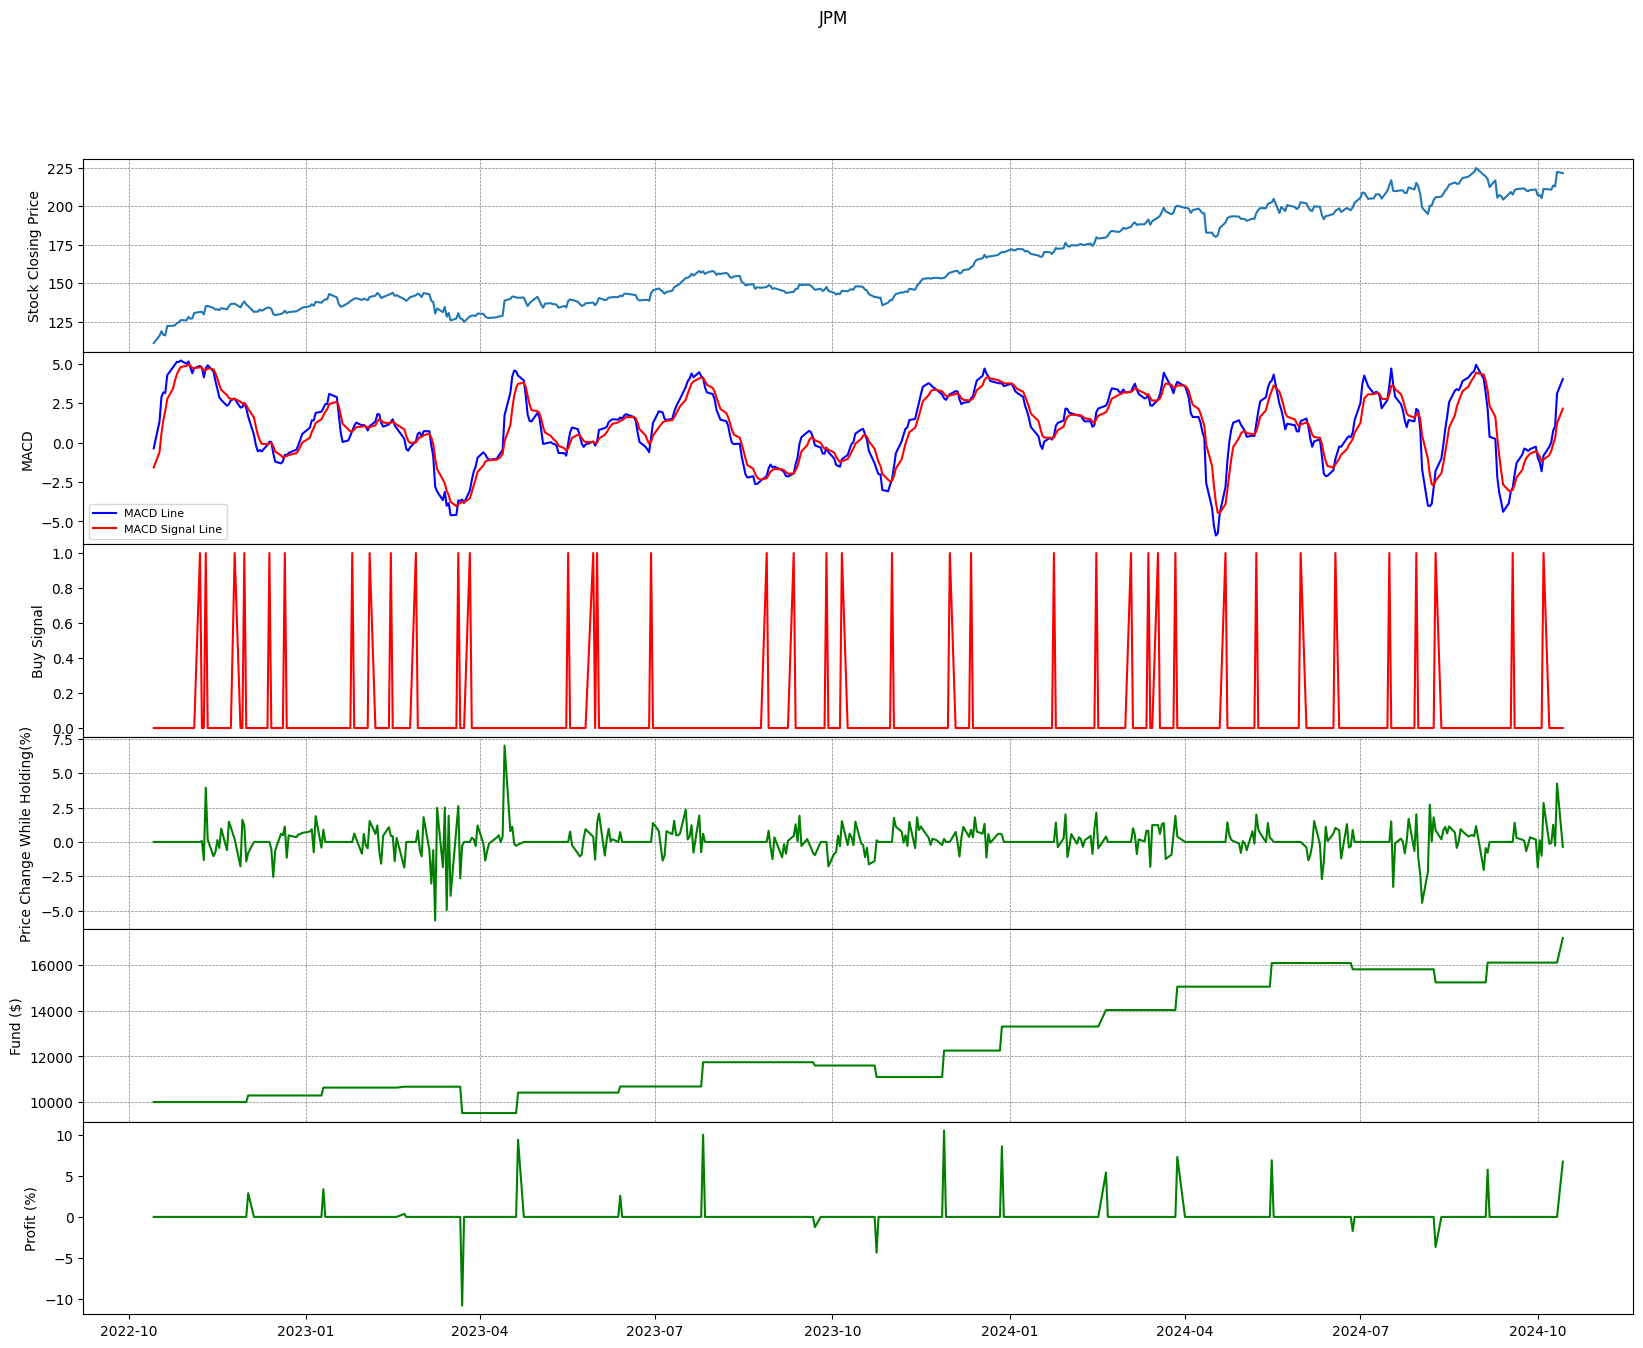

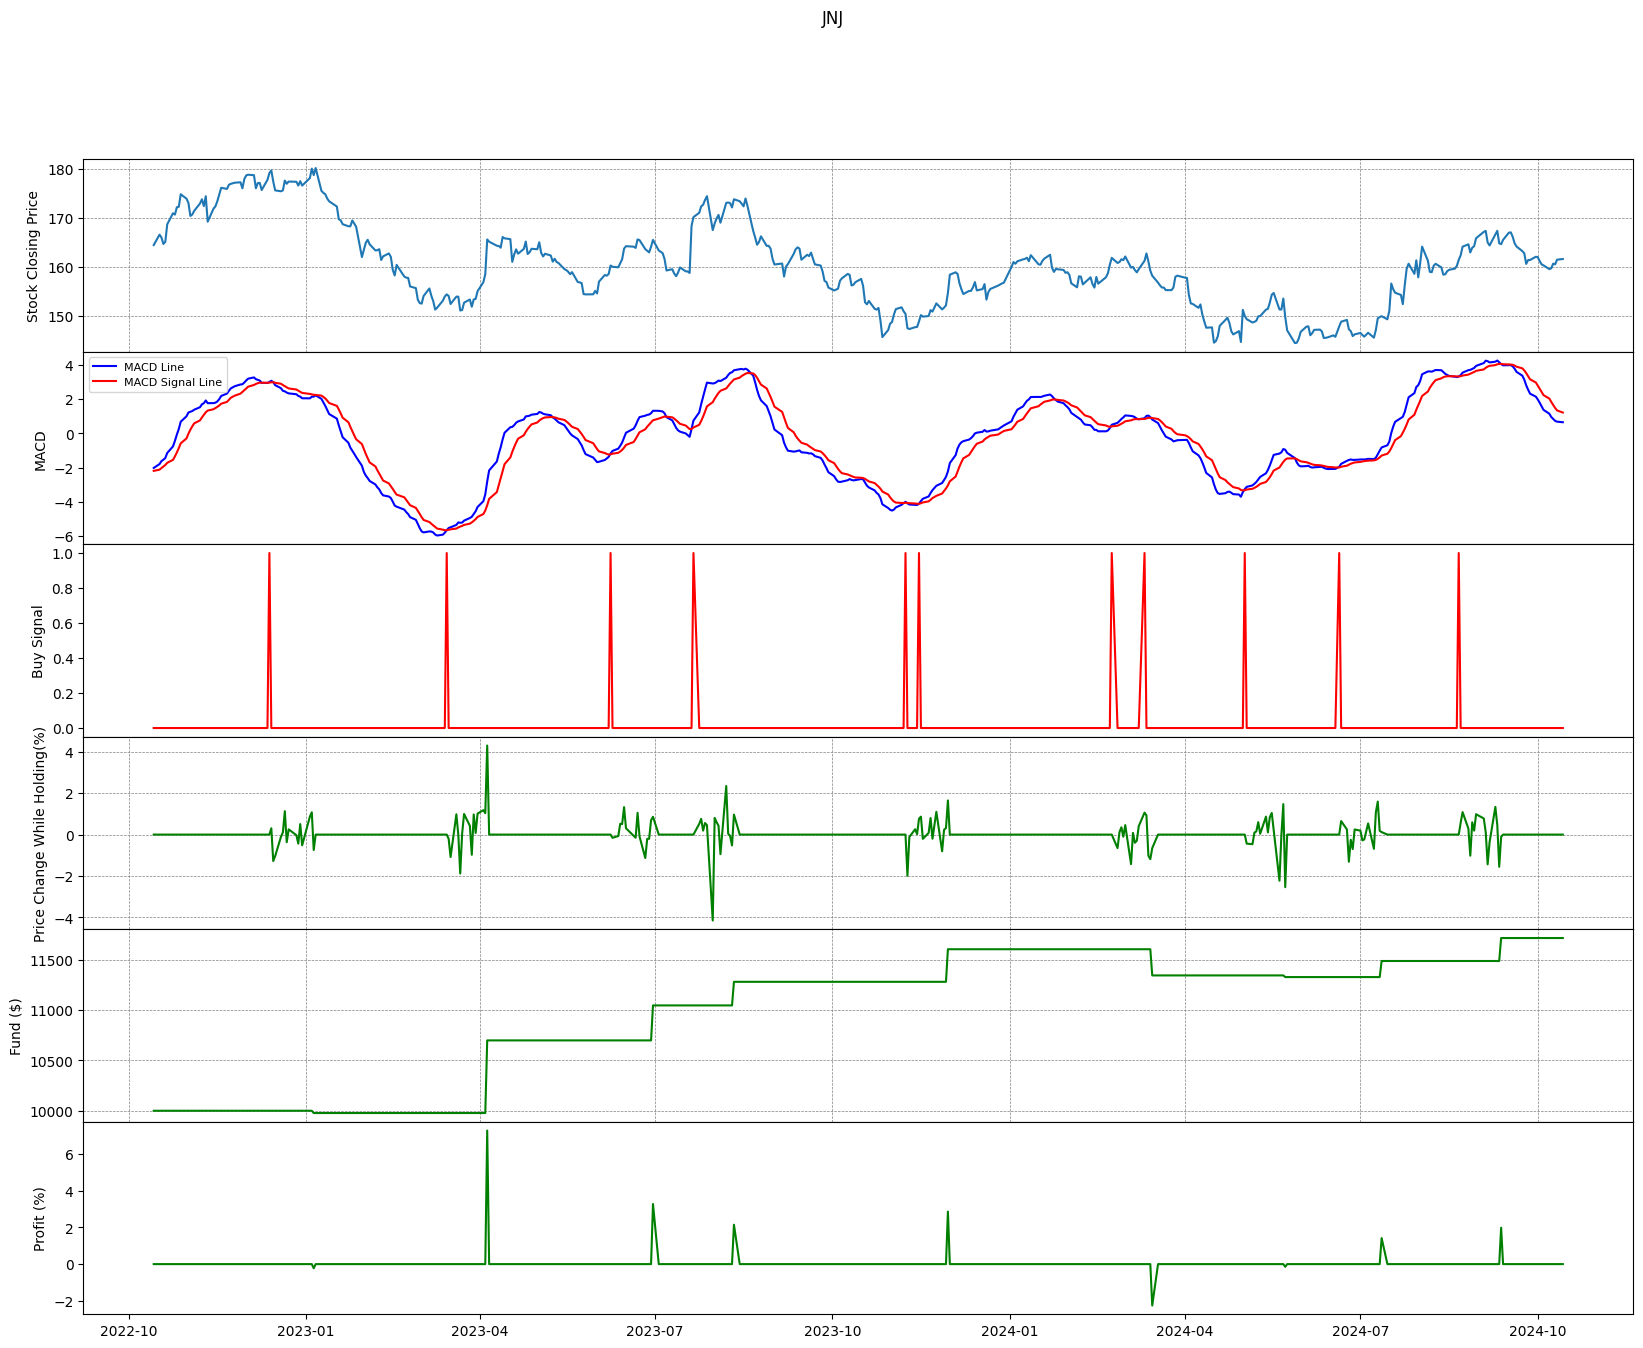

In [27]:
macd_sum_graph(ibm_macd_sorted[0], 'IBM')
macd_sum_graph(appl_macd_sorted[0], 'APPL')
macd_sum_graph(nvda_macd_sorted[0], 'NVDA')
macd_sum_graph(tsla_macd_sorted[0], 'TSLA')
macd_sum_graph(jpm_macd_sorted[0], 'JPM')
macd_sum_graph(jnj_macd_sorted[0], 'JNJ')

In [28]:
def cci_signal(data, top=100, bot=-100, div=False):
    #if div:
    #    data = bull_d(data, 'EMA' candle)
    #    data = bear_d(data, 'EMA', candle)
    data['Buy_Signal'] = data['CCI'] <= bot
    data['Sell_Signal'] = data['CCI'] >= top
    data['CCI_Signal'] = (data['Buy_Signal']) & (data['Sell_Signal'] == False)
    #data = data.loc[:,['High','Low','Close','Volume','EMA','EMA_Signal']]
    return data

def cci_automation(data, fy=False):
    dfs = []
    thrs = [[100,-100]]
    periods = [10,14,20,25,50]
    holds = [7,10,15,20,35]
    for p in periods:
        for h in holds:
            d = data.copy()[['High','Low','Close']]
            if fy:
                d = d.iloc[-302:].copy()
            else:
                d = d.iloc[-552:].copy()
            d = cci(d,p)
            d = cci_signal(d, thrs[0][0],thrs[0][1])
            name = 'CCI' + str(p) + '_Hold' + str(h) + '_Signal'
            d = ti_test(d, 'CCI_Signal', h).rename(columns={'CCI_Signal':name}).drop(columns=['Buy_Signal','Sell_Signal','Remainder','Invested','Sold'])
            dfs.append(d)
    return dfs

In [29]:
ibm_cci_test = cci_automation(ibm)
appl_cci_test = cci_automation(appl)
nvda_cci_test = cci_automation(nvda)
tsla_cci_test = cci_automation(tsla)
jpm_cci_test = cci_automation(jpm)
jnj_cci_test = cci_automation(jnj)
ibm_cci_sorted = sorted(ibm_cci_test, key=get_fund, reverse=True)
appl_cci_sorted = sorted(appl_cci_test, key=get_fund, reverse=True)
nvda_cci_sorted = sorted(nvda_cci_test, key=get_fund, reverse=True)
tsla_cci_sorted = sorted(tsla_cci_test, key=get_fund, reverse=True)
jpm_cci_sorted = sorted(jpm_cci_test, key=get_fund, reverse=True)
jnj_cci_sorted = sorted(jnj_cci_test, key=get_fund, reverse=True)

In [30]:
ibm_cci_test[0]

High         Low       Close         CCI  \
Date                                                         
2022-08-04  132.289993  131.020004  131.639999         NaN   
2022-08-05  132.669998  131.070007  132.479996         NaN   
2022-08-08  133.350006  132.020004  132.610001         NaN   
2022-08-09  130.789993  129.119995  129.470001         NaN   
2022-08-10  131.779999  130.339996  131.500000         NaN   
...                ...         ...         ...         ...   
2024-10-08  229.350006  227.039993  228.619995  150.697041   
2024-10-09  234.949997  228.500000  234.300003  165.852062   
2024-10-10  235.830002  231.809998  233.020004  130.825302   
2024-10-11  233.440002  230.460007  233.259995   89.758292   
2024-10-14  236.119995  233.169998  235.259995   99.435949   

            CCI10_Hold7_Signal          Fund  Price_Change(%)  Profit(%)  \
Date                                                                       
2022-08-04               False  10000.000000         0.000000        0.0   
2022-08-05               False  10000.000000         0.634055        0.0   
2022-08-08               False  10000.000000         0.098036        0.0   
2022-08-09               False  10000.000000        -2.425272        0.0   
2022-08-10               False  10000.000000         1.543725        0.0   
...                        ...           ...              ...        ...   
2024-10-08               False  10507.398575         0.656111        0.0   
2024-10-09               False  10507.398575         2.424246        0.0   
2024-10-10               False  10507.398575        -0.549309        0.0   
2024-10-11               False  10507.398575         0.102885        0.0   
2024-10-14               False  10507.398575         0.850123        0.0   

            Holding  
Date                 
2022-08-04      0.0  
2022-08-05      0.0  
2022-08-08      0.0  
2022-08-09      0.0  
2022-08-10      0.0  
...             ...  
2024-10-08      0.0  
2024-10-09      0.0  
2024-10-10      0.0  
2024-10-11      0.0  
2024-10-14      0.0  

[552 rows x 9 columns]

In [31]:
ibm_cci_columns = combo_order(ibm_cci_sorted)
appl_cci_columns = combo_order(appl_cci_sorted)
nvda_cci_columns = combo_order(nvda_cci_sorted)
tsla_cci_columns = combo_order(tsla_cci_sorted)
jpm_cci_columns = combo_order(jpm_cci_sorted)
jnj_cci_columns = combo_order(jnj_cci_sorted)
ibm_cci_columns[0:10]
#appl_cci_columns[0:10]
#nvda_cci_columns[0:10]
#tsla_cci_columns[0:10]
#jpm_cci_columns[0:10]
#jnj_cci_columns[0:10]

['CCI10_Hold35_Signal',
 'CCI10_Hold20_Signal',
 'CCI14_Hold20_Signal',
 'CCI14_Hold15_Signal',
 'CCI14_Hold35_Signal',
 'CCI20_Hold20_Signal',
 'CCI20_Hold35_Signal',
 'CCI25_Hold15_Signal',
 'CCI25_Hold20_Signal',
 'CCI50_Hold35_Signal']

In [32]:
ibm_cci_columns[0], appl_cci_columns[0], nvda_cci_columns[0], tsla_cci_columns[0], jpm_cci_columns[0], jnj_cci_columns[0]

('CCI10_Hold35_Signal',
 'CCI25_Hold10_Signal',
 'CCI10_Hold35_Signal',
 'CCI50_Hold35_Signal',
 'CCI20_Hold35_Signal',
 'CCI25_Hold15_Signal')

In [33]:
# Automation Graphing Template

def cci_sum_graph(data, stock):
    fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1, sharex=True, figsize=(20, 15))
    fig.suptitle(stock)


    ax1.plot(data.index, data['Close'], label='Closing Price')
    ax1.set_ylabel('Stock Closing Price')
    ax1.grid(True, which='both', color='gray', linestyle='--', linewidth=0.5)

    ax2.plot(data.index, data['CCI'], label='MACD Line', color = 'blue')
    ax2.axhline(y = 100, color = 'red', linestyle = '-')
    ax2.axhline(y = -100, color = 'lightblue', linestyle = '-')
    ax2.set_ylabel('CCI')

    ax3.plot(data.index, data.iloc[:,4], label='Buy Signals', color = 'red')
    ax3.set_ylabel('Buy Signal')

    ax4.plot(data.index, data['Holding'], label='Price Change(%)', color = 'green')
    ax4.set_ylabel('Price Change While Holding(%)')
    ax4.grid(True, which='both', color='gray', linestyle='--', linewidth=0.5)

    ax5.plot(data.index, data['Fund'], label= 'Funds', color = 'green')
    ax5.set_ylabel('Fund ($)')
    ax5.grid(True, which='both', color='gray', linestyle='--', linewidth=0.5)

    ax6.plot(data.index, data['Profit(%)'], label = 'Profit(%)', color = 'green')
    ax6.set_ylabel('Profit (%)')




    ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax3.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax4.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax5.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

    plt.subplots_adjust(hspace=0)

    plt.show()

    return

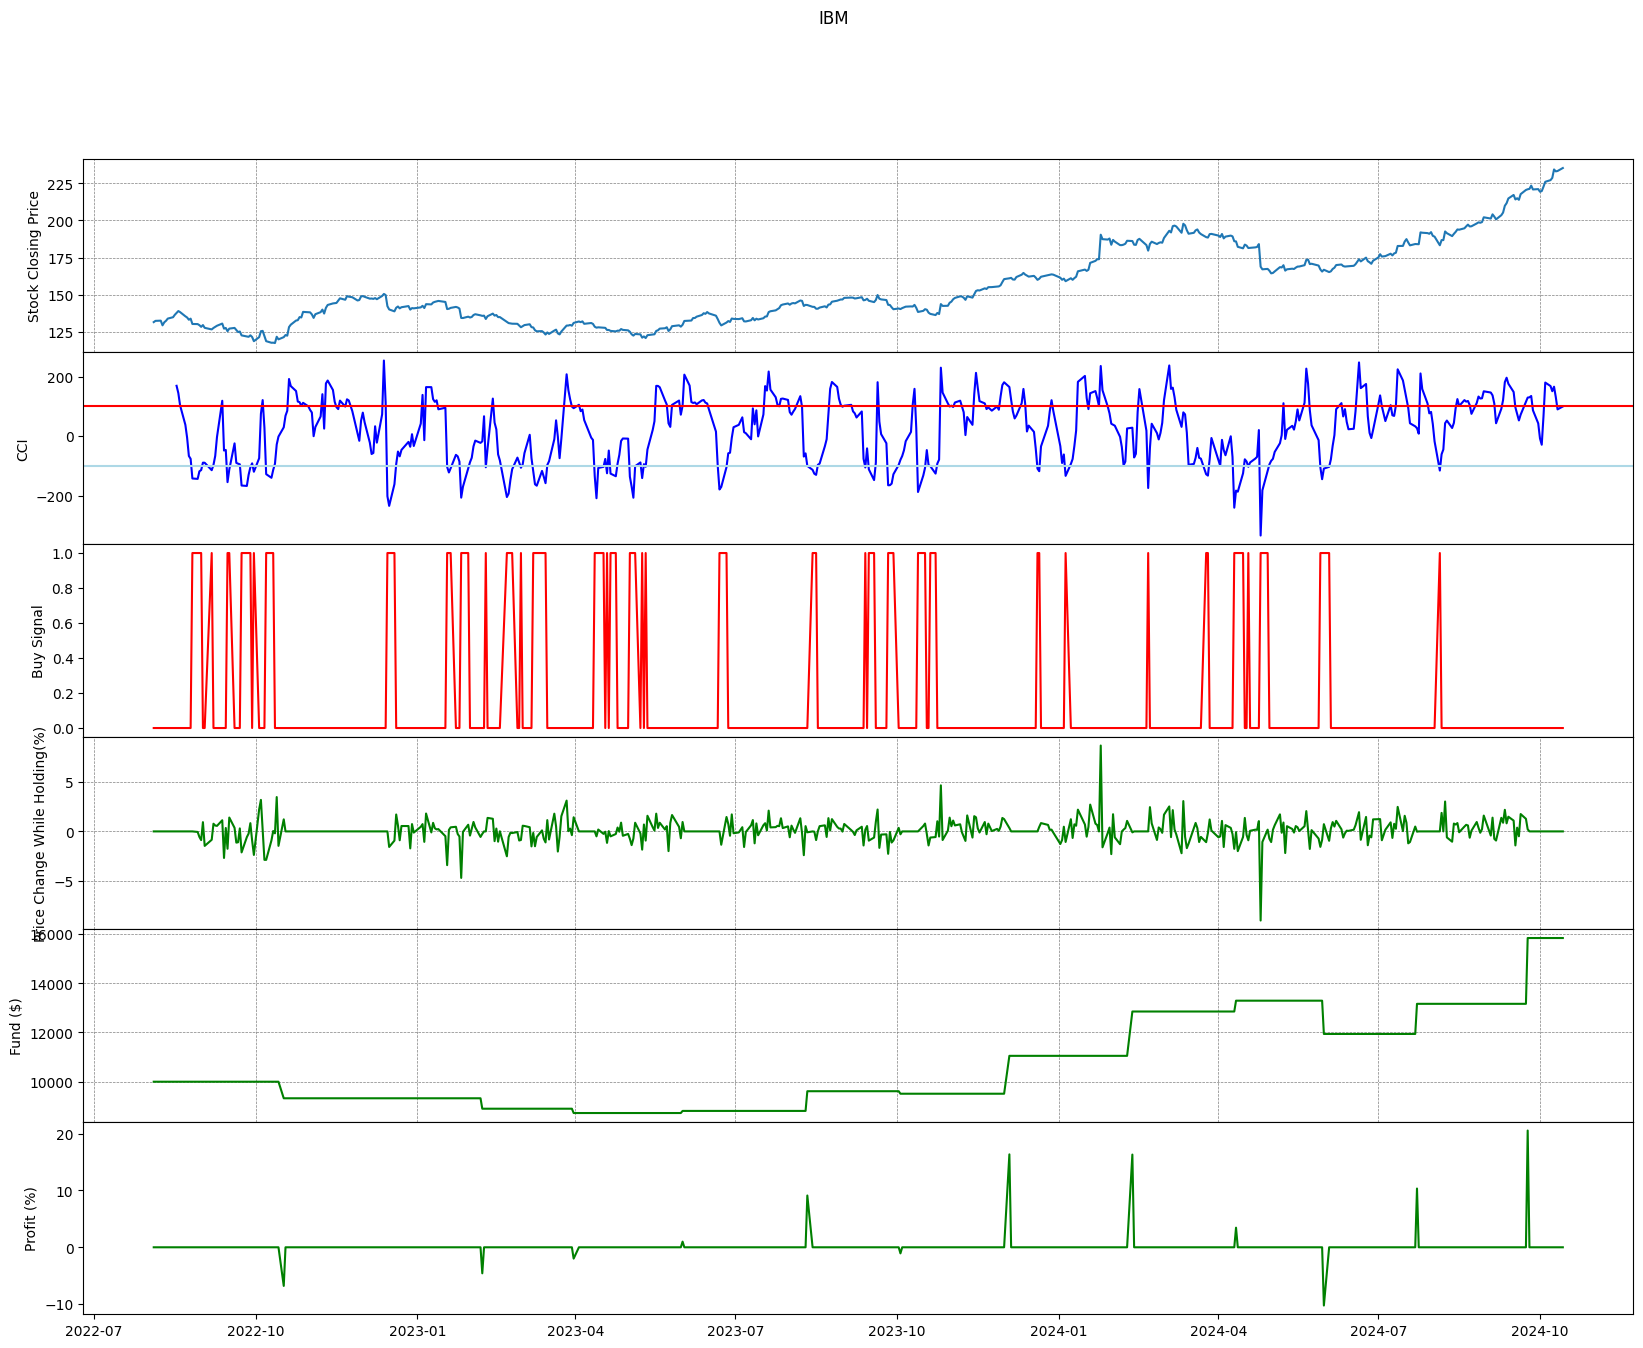

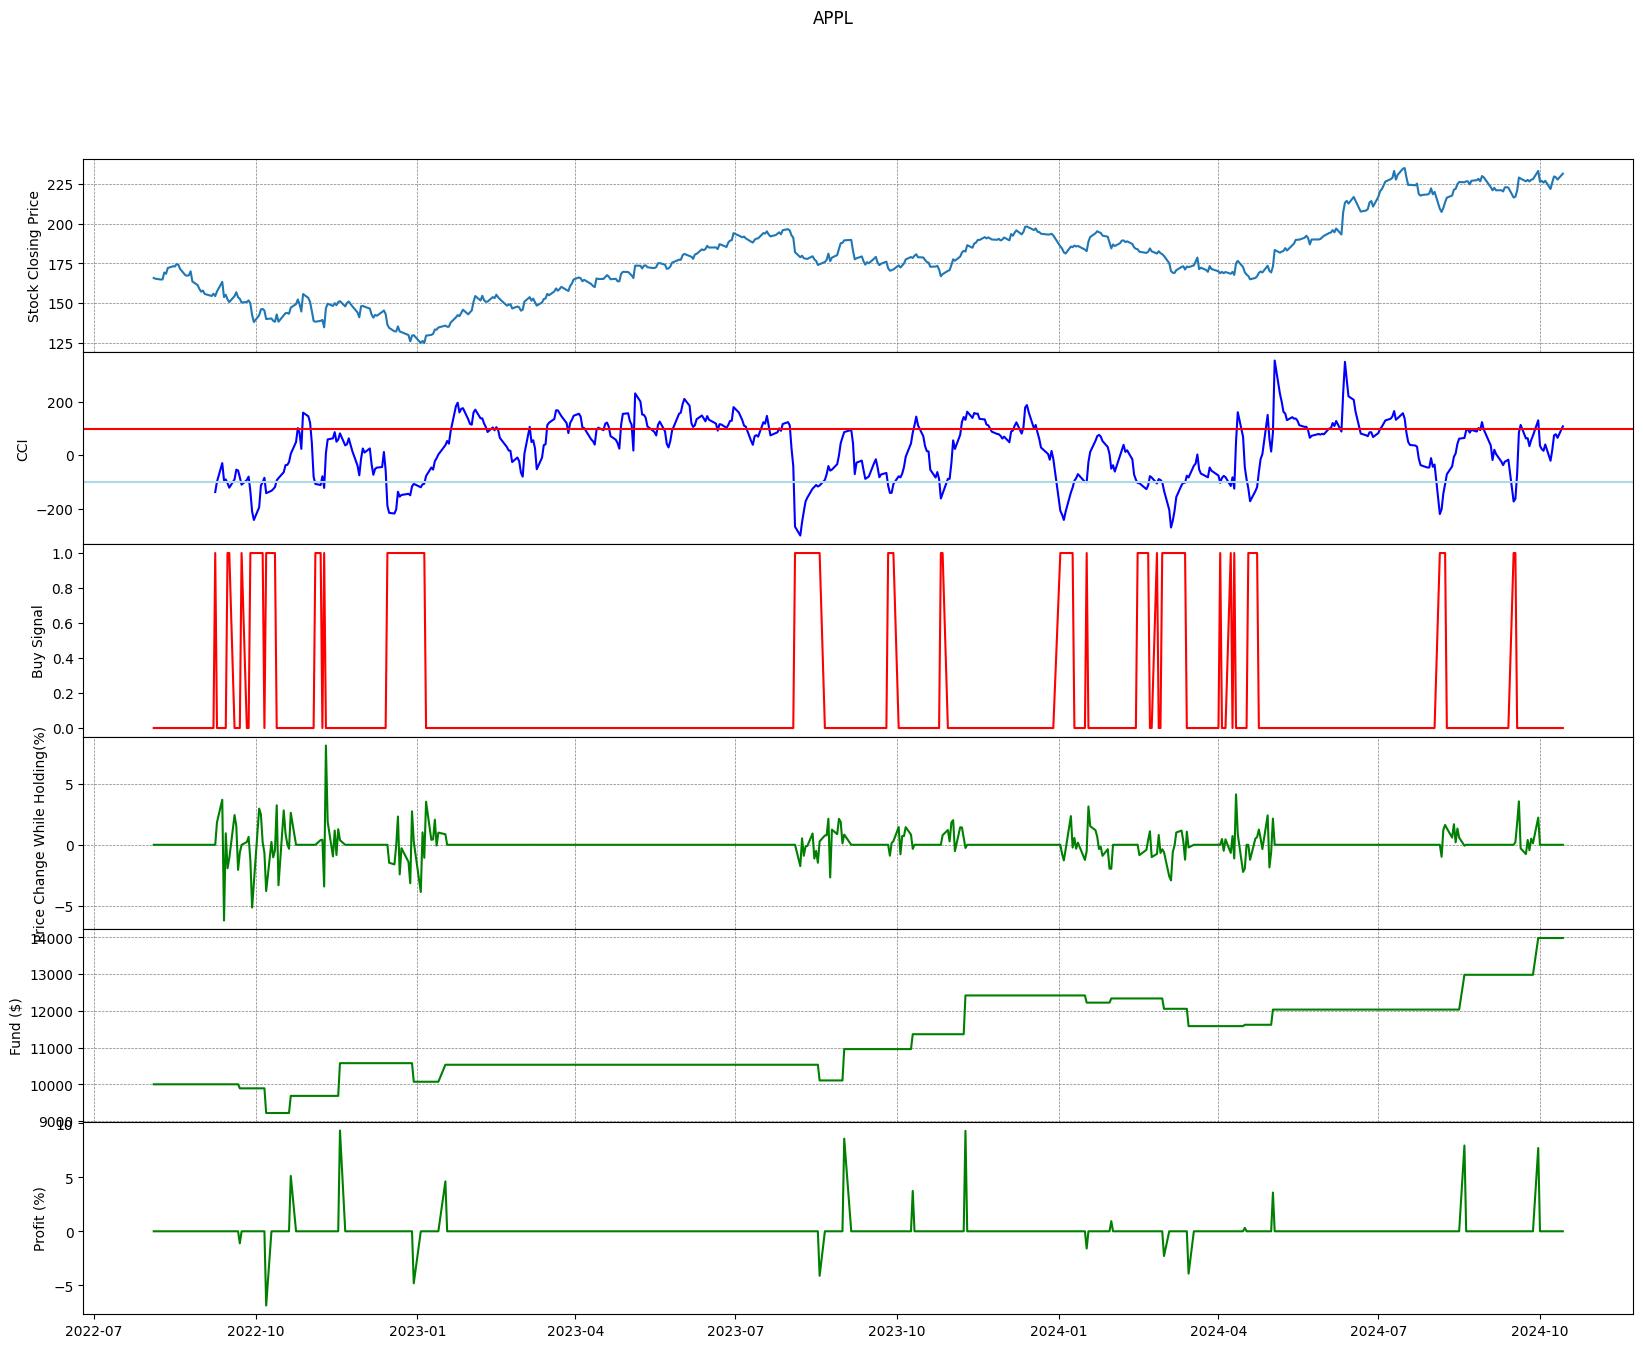

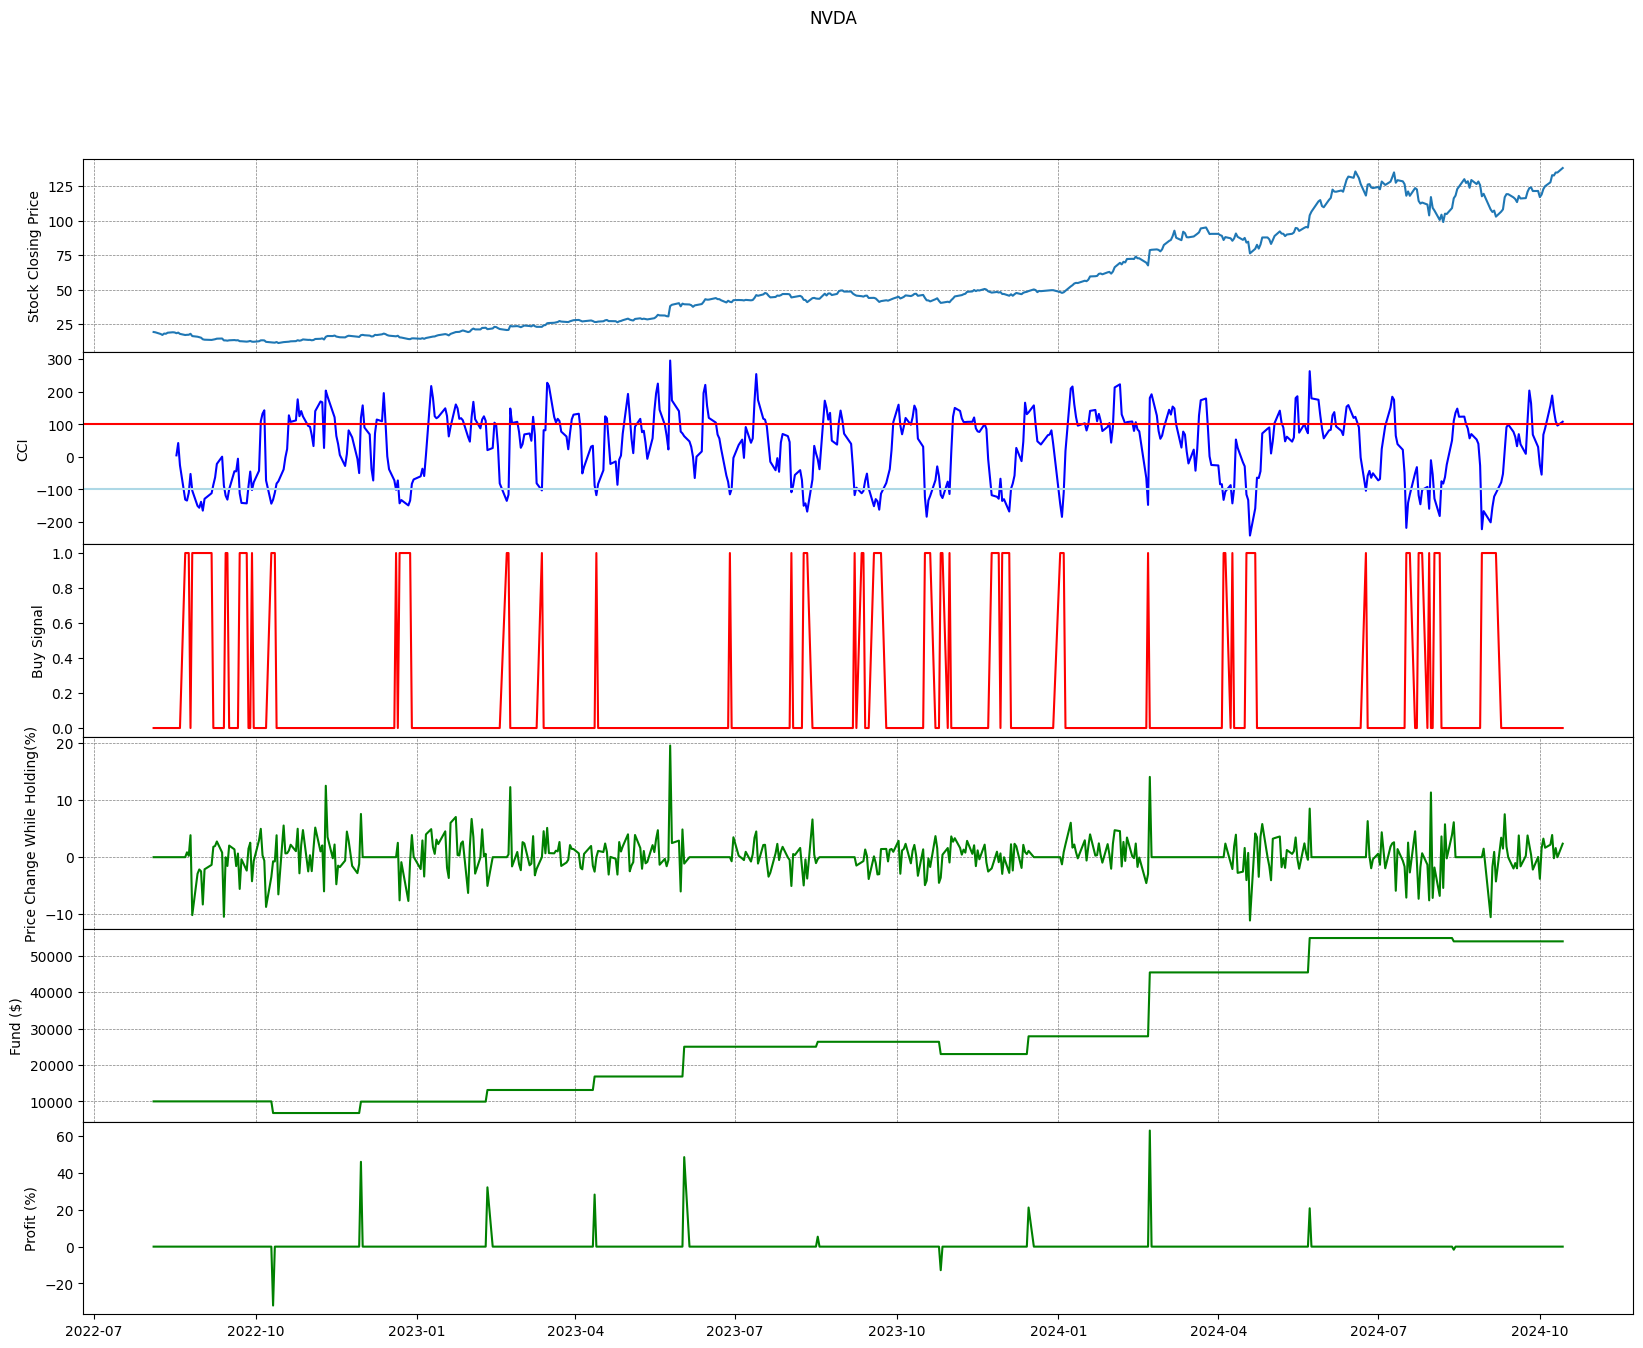

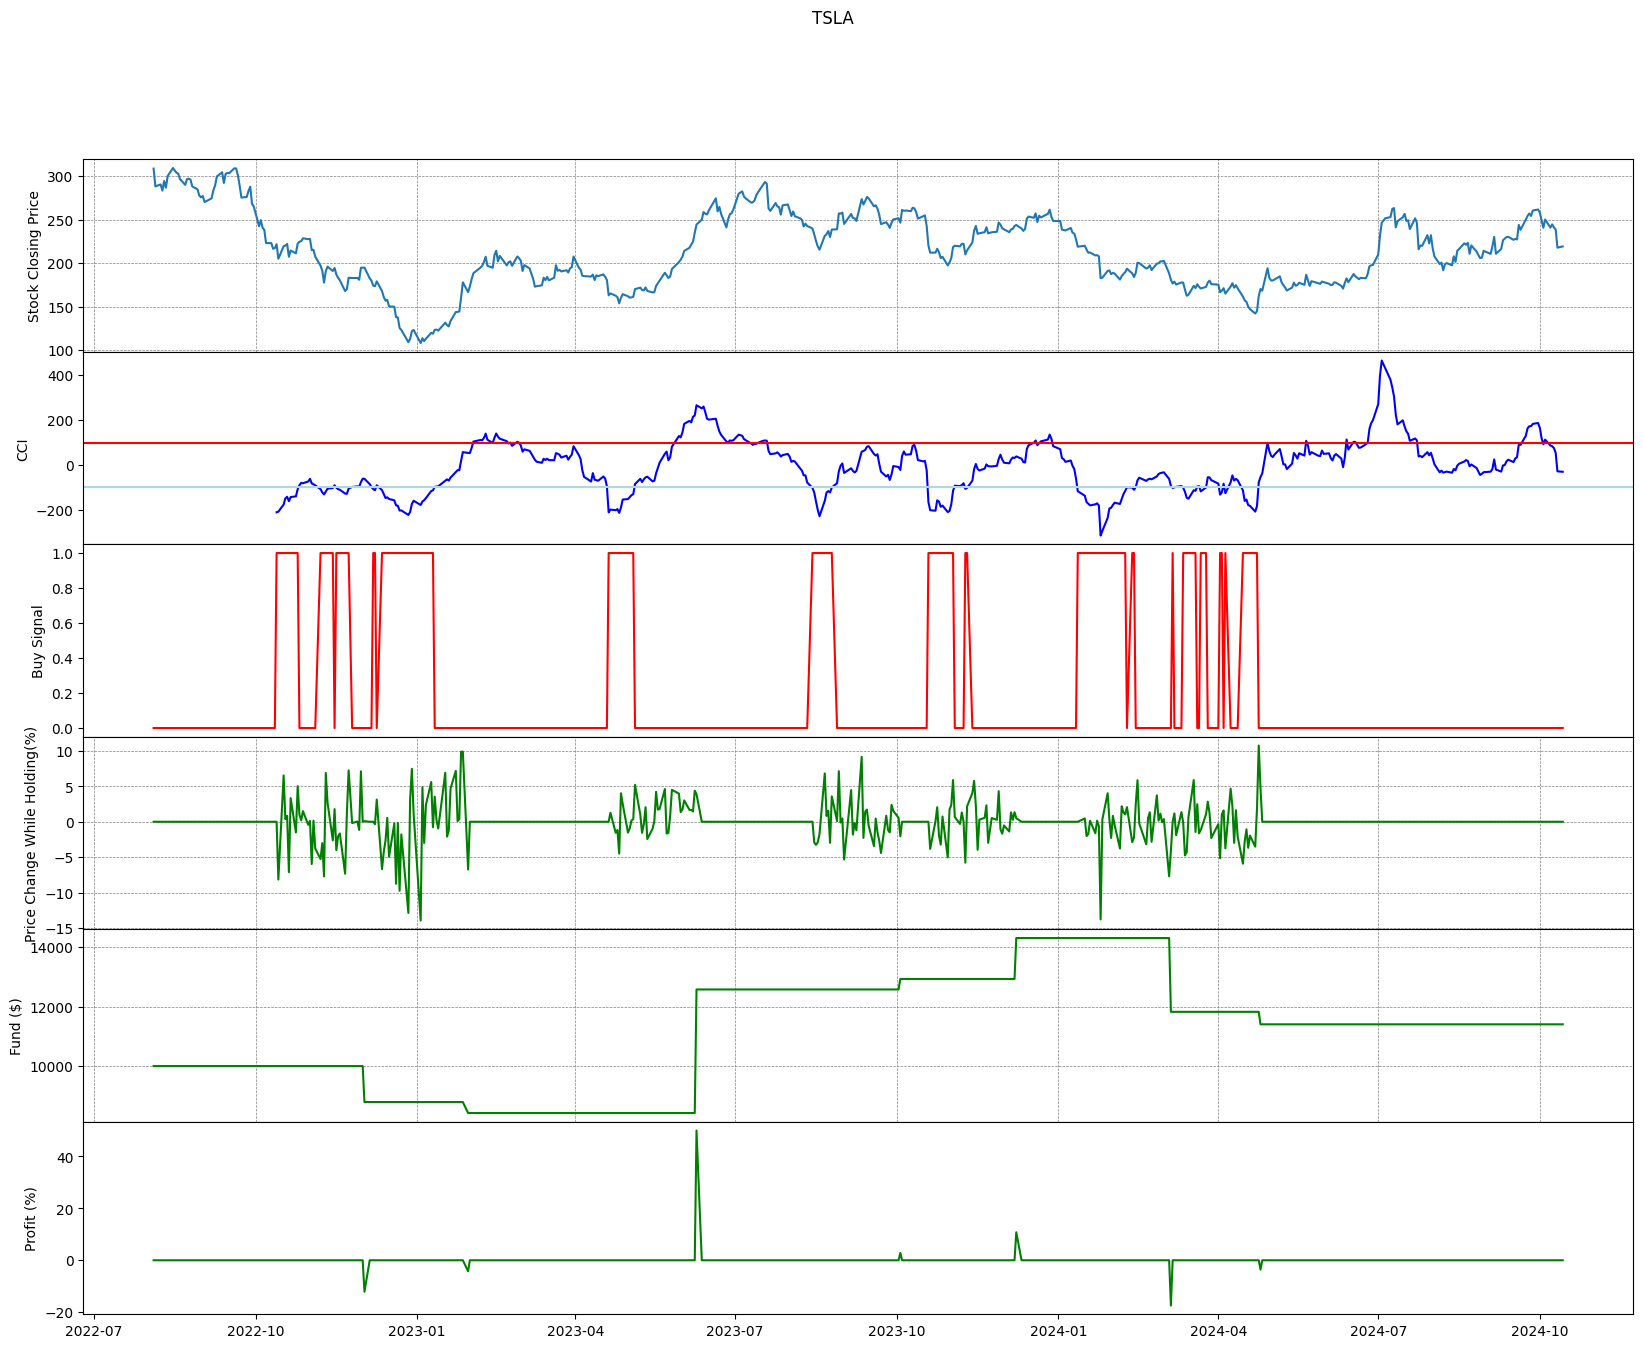

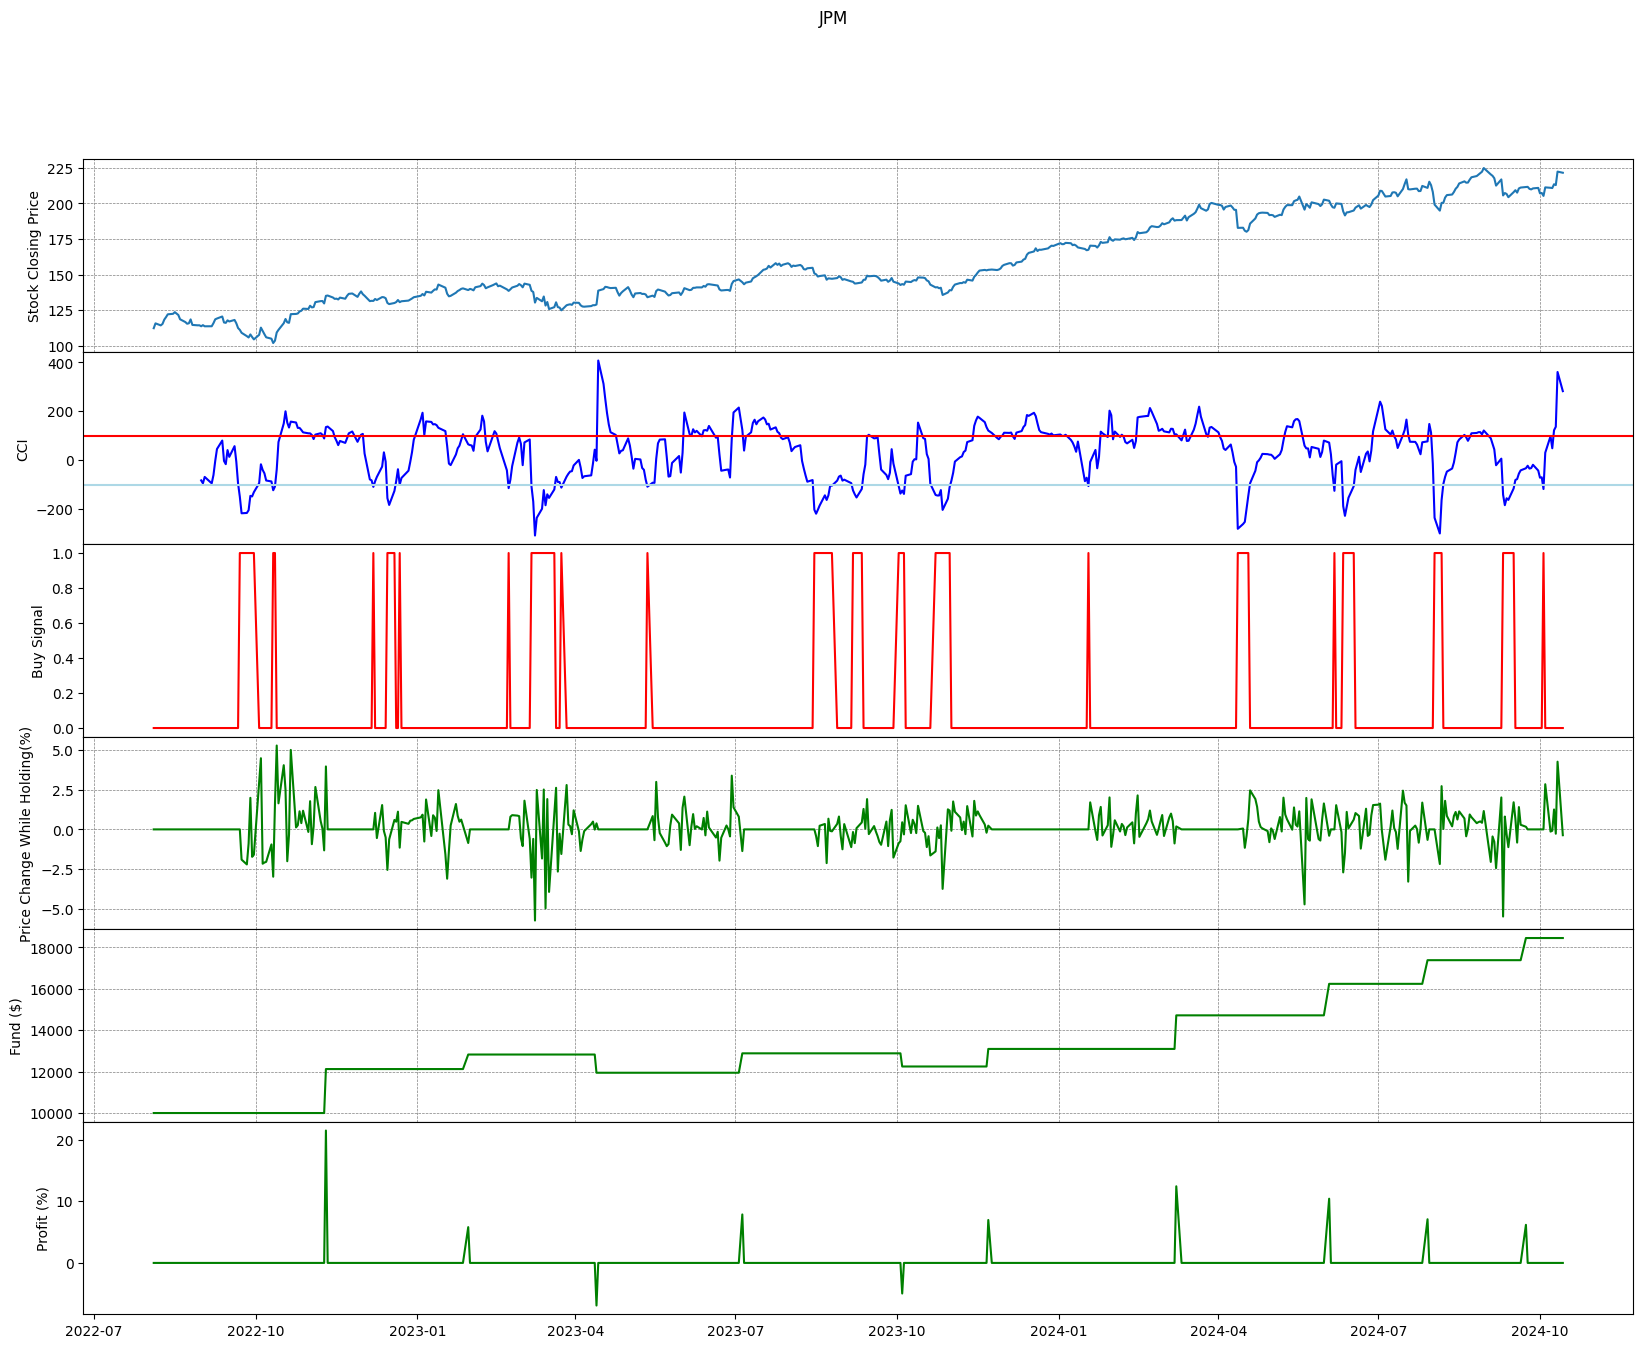

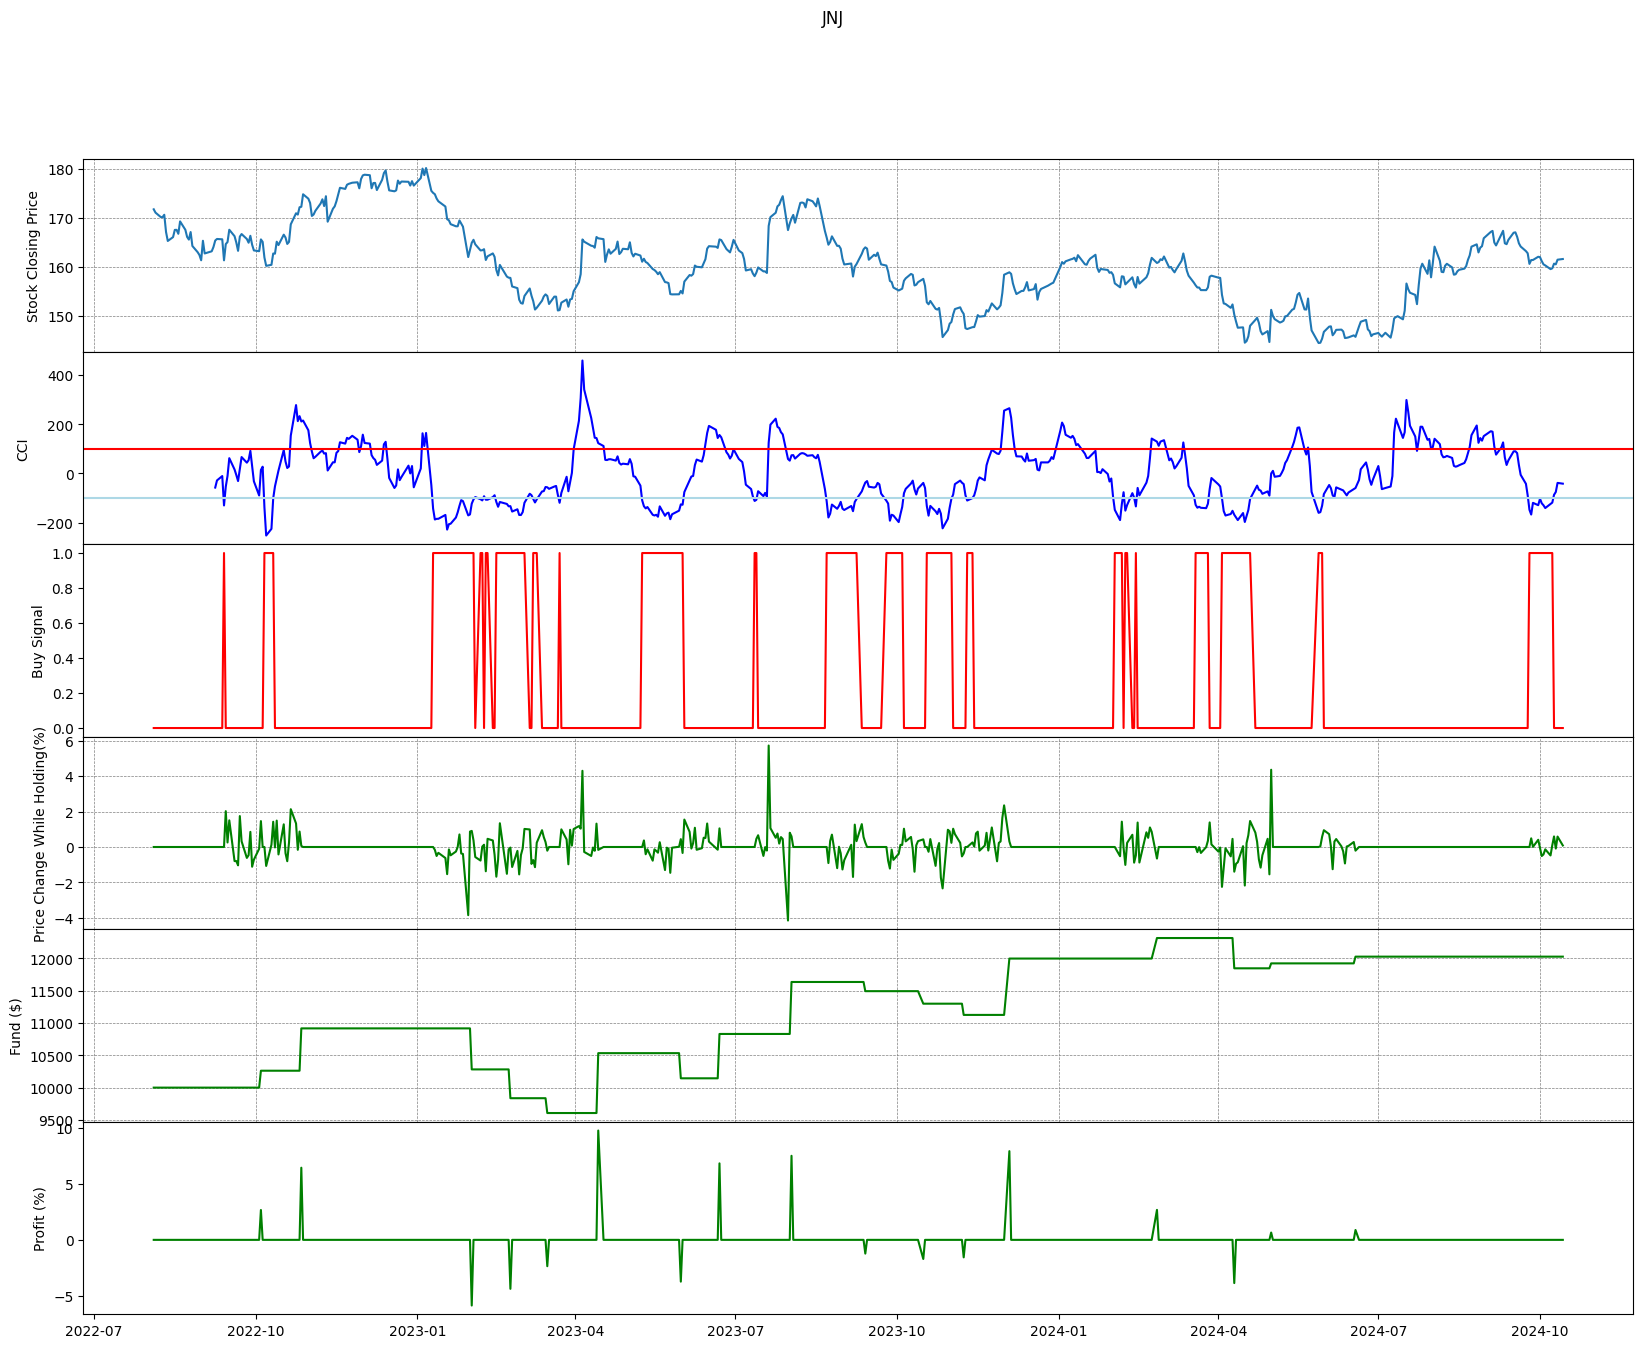

In [34]:
cci_sum_graph(ibm_cci_sorted[0], 'IBM')
cci_sum_graph(appl_cci_sorted[0], 'APPL')
cci_sum_graph(nvda_cci_sorted[0], 'NVDA')
cci_sum_graph(tsla_cci_sorted[0], 'TSLA')
cci_sum_graph(jpm_cci_sorted[0], 'JPM')
cci_sum_graph(jnj_cci_sorted[0], 'JNJ')

In [35]:
def stoch_signal(data, top=80, bot=20, th=True, cross=False, div=False):
    #if div:
    #    data = bull_d(data, 'EMA' candle)
    #    data = bear_d(data, 'EMA', candle)
    #if cross:
    #    data['Bull_Cross'] = (data['Stoch_K'] > data['Stoch_D']) & (data['Stoch_K'].shift() < data['Stoch_D'].shift())
    #    data['Bear_Cross'] = (data['Stoch_K'] < data['Stoch_D']) & (data['Stoch_K'].shift() > data['Stoch_D'].shift())
    data['Buy_Signal'] = (data['Stoch_K'] > top) | (data['Stoch_D'] > top)
    data['Sell_Signal'] = (data['Stoch_K'] < bot) | (data['Stoch_D'] < bot)
    data['Stoch_Signal'] = (data['Buy_Signal']) & (data['Sell_Signal'] == False)
    #data = data.loc[:,['High','Low','Close','Volume','EMA','EMA_Signal']]
    return data

def stoch_automation(data, fy=False):
    dfs = []
    ks = [5,9,14,21]
    ds = [3,5,8]
    holds = [5,7,10,14]
    for k in ks:
        for slow in ds:
            for h in holds:
                d = data.copy()[['High','Low','Close']]
                if fy:
                    d = stochastic_oscillator(d,k,slow).iloc[-252:].copy()
                else:
                    d = stochastic_oscillator(d,k,slow).iloc[-502:].copy()
                d = stoch_signal(d)
                name = 'K' + str(k) + 'D' + str(slow) + 'Stoch_Hold' + str(h) + '_Signal'
                d = ti_test(d, 'Stoch_Signal', h).rename(columns={'Stoch_Signal':name}).drop(columns=['Buy_Signal','Sell_Signal','Remainder','Invested','Sold'])
                dfs.append(d)
    return dfs

In [36]:
ibm_stoch_test = stoch_automation(ibm)
appl_stoch_test = stoch_automation(appl)
nvda_stoch_test = stoch_automation(nvda)
tsla_stoch_test = stoch_automation(tsla)
jpm_stoch_test = stoch_automation(jpm)
jnj_stoch_test = stoch_automation(jnj)
ibm_stoch_sorted = sorted(ibm_stoch_test, key=get_fund, reverse=True)
appl_stoch_sorted = sorted(appl_stoch_test, key=get_fund, reverse=True)
nvda_stoch_sorted = sorted(nvda_stoch_test, key=get_fund, reverse=True)
tsla_stoch_sorted = sorted(tsla_stoch_test, key=get_fund, reverse=True)
jpm_stoch_sorted = sorted(jpm_stoch_test, key=get_fund, reverse=True)
jnj_stoch_sorted = sorted(jnj_stoch_test, key=get_fund, reverse=True)

In [37]:
ibm_stoch_columns = combo_order(ibm_stoch_sorted)
appl_stoch_columns = combo_order(appl_stoch_sorted)
tsla_stoch_columns = combo_order(tsla_stoch_sorted)
nvda_stoch_columns = combo_order(nvda_stoch_sorted)
jpm_stoch_columns = combo_order(jpm_stoch_sorted)
jnj_stoch_columns = combo_order(jnj_stoch_sorted)
ibm_stoch_columns[0:10]

['K14D5Stoch_Hold10_Signal',
 'K14D3Stoch_Hold14_Signal',
 'K14D5Stoch_Hold14_Signal',
 'K14D8Stoch_Hold14_Signal',
 'K9D3Stoch_Hold10_Signal',
 'K14D8Stoch_Hold7_Signal',
 'K14D5Stoch_Hold7_Signal',
 'K9D5Stoch_Hold10_Signal',
 'K9D8Stoch_Hold10_Signal',
 'K14D3Stoch_Hold10_Signal']

In [38]:
ibm_stoch_columns[0], appl_stoch_columns[0], nvda_stoch_columns[0], tsla_stoch_columns[0], jpm_stoch_columns[0], jnj_stoch_columns[0]

('K14D5Stoch_Hold10_Signal',
 'K5D3Stoch_Hold10_Signal',
 'K5D3Stoch_Hold7_Signal',
 'K5D8Stoch_Hold7_Signal',
 'K9D8Stoch_Hold10_Signal',
 'K5D5Stoch_Hold10_Signal')

In [39]:
# SPY Stock Integration Trading Strategy
# Buy IBM stock on buy-signal
# When selling IBM stock, buy SPY Stock
# Hold SPY Stock for a minimum of next IBM buy-signal
# When IBM buy-signal occurs
def spy_test(data, signal, hold):
    # Initial Fund
    fund = 10000

    # Tracking variables to indicate how many days stock has been held
    spy_days_held, comp_days_held = 0, 0

    # Indicates which stock is being held currently; 1 = company, -1 = SPY, 0 = Neither
    current = 0

    # Minimum holding period for SPY Stock
    spy_min = 5

    shares, buy_price = 0, 0
    can_buy = 1
    invested, remainder, all_sells, earnings, running_total = [], [], [], [], []
    holding = []
    buys = []

    for i in range(len(data)):
        if can_buy == 0:
            if current == 1:
                comp_days_held += 1
            elif current == -1:
                spy_days_held += 1
            holding.append(1)
        else:
            holding.append(0)

        if current == 0:
            if data[signal].iloc[i] == True & can_buy == 1:
                shares = fund // data['Close'].iloc[i]
                buy_price = data['Close'].iloc[i]
                fund = fund % data['Close'].iloc[i]
                invested.append(shares * buy_price)
                comp_days_held = 0
                can_buy = 0
                current = 1
                buys.append(1)
            else:
                invested.append(0)
                buys.append(0)
        elif current == 1:
            if comp_days_held == hold:
                # Sell company stocks
                earnings.append(shares * (data['Close'].iloc[i] - buy_price))
                fund += (shares * data['Close'].iloc[i])
                # Buy SPY stocks
                shares = fund // data['SPY_Close'].iloc[i]
                buy_price = data['SPY_Close'].iloc[i]
                fund = fund % data['SPY_Close'].iloc[i]
                invested.append(shares * buy_price)
                spy_days_held = 0
                can_buy = 0
                current = -1
                buys.append(1)
            else:
                invested.append(0)
                buys.append(0)
        elif current == -1:
            if (data[signal].iloc[i] == True) & (spy_days_held >= spy_min):
                # Sell SPY Stocks
                earnings.append(shares * (data['SPY_Close'].iloc[i] - buy_price))
                fund += (shares * data['SPY_Close'].iloc[i])
                # Buy CompanY Stocks
                shares = fund // data['Close'].iloc[i]
                buy_price = data['Close'].iloc[i]
                fund = fund % data['Close'].iloc[i]
                invested.append(shares * buy_price)
                comp_days_held = 0
                can_buy = 0
                current = 1
                buys.append(1)
            else:
                invested.append(0)
                buys.append(0)
        remainder.append(fund)
        running_total.append(fund+shares*buy_price)

    data['Remainder'] = pd.Series(remainder,index=data.index)
    data['Invested'] = pd.Series(invested,index=data.index)
    data['Fund'] = pd.Series(running_total, index=data.index)
    data['Sold'] = pd.Series(buys, index=data.index)

    data = price_change(data)
    data = percent_gain(data, hold)
    return data

In [40]:
# SPY Automation
def spy_rsi_automation(data, fy=False):
    dfs = []
    pls = [3,7,9,10,14,21,30]
    holds = [1,3,5,7,10,14,21,30]
    for p in pls:
        for h in holds:
            d = data.copy()[['SPY_High','SPY_Low','SPY_Close','High','Low','Close']]
            d = rsi(d, p).copy().iloc[-750:,:]
            #if fy:
            #    d = d.iloc[-252:,:]
            #else:
            #    d = d.iloc[-502:,:]
            if (p == 3) or (p == 7):
                d = rsi_signal(d,top=90,bot=10)
            elif (p == 9) or (p == 10):
                d = rsi_signal(d,top=85,bot=15)
            elif (p == 14):
                d = rsi_signal(d,top=75,bot=25)
            else:
                d = rsi_signal(d,top=70,bot=30)
            name = 'RSI' + str(p) + '_Hold' + str(h) + '_Signal'
            d = spy_test(d,'RSI_Signal',h).rename(columns={'RSI_Signal':name}).drop(columns=['Overbought','Oversold','Buy_Signal','Sell_Signal','Remainder','Invested','Sold'])
            dfs.append(d)
    return dfs

In [41]:
# SPY Strategy Graphing

def spy_rsi_sum_graph(data, stock, upper=80, lower=20):
    fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1, sharex=True, figsize=(20, 15))
    fig.suptitle(stock)


    ax1.plot(data.index, data['High'], label='High', color = 'green')
    ax1.plot(data.index, data['Close'], label='Close', color = 'blue')
    ax1.plot(data.index, data['Low'], label='High', color = 'red')
    ax1.set_ylabel(stock + ' Stock Closing Price')
    ax1.grid(True, which='both', color='gray', linestyle='--', linewidth=0.5)
    ax1.legend(loc=2, fontsize=8)

    ax2.plot(data.index, data['SPY_High'], label='High', color = 'green')
    ax2.plot(data.index, data['SPY_Close'], label='Close', color = 'blue')
    ax2.plot(data.index, data['SPY_Low'], label='High', color = 'red')
    ax2.set_ylabel('SPY Stock Closing Price')
    ax2.grid(True, which='both', color='gray', linestyle='--', linewidth=0.5)
    ax2.legend(loc=2, fontsize=8)

    ax3.plot(data.index, data['RSI'], label='RSI', color = 'purple')
    ax3.set_ylabel('RSI')
    ax3.axhline(y = upper, color = 'r', linestyle = '-')
    ax3.axhline(y = lower, color = 'lightblue', linestyle = '-')

    ax4.plot(data.index, data.iloc[:,7], label='Buy Signals', color = 'red')
    ax4.set_ylabel('Buy Signal')

    ax5.plot(data.index, data['Fund'], label= 'Funds', color = 'green')
    ax5.set_ylabel('Fund ($)')
    ax5.grid(True, which='both', color='gray', linestyle='--', linewidth=0.5)

    ax6.plot(data.index, data['Profit(%)'], label = 'Profit(%)', color = 'green')
    ax6.set_ylabel('Profit (%)')
    ax6.grid(True, which='both', color='gray', linestyle='--', linewidth=0.5)




    ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax3.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax4.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax5.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

    plt.subplots_adjust(hspace=0)

    plt.show()

    return

In [42]:
ibm_spy_rsi_test = spy_rsi_automation(ibm_spy)
ibm_spy_rsi_sorted = sorted(ibm_spy_rsi_test, key=get_fund, reverse=True)
ibm_spy_rsi_columns = combo_order(ibm_spy_rsi_sorted)
ibm_spy_rsi_columns[0:10]

['RSI21_Hold14_Signal',
 'RSI21_Hold10_Signal',
 'RSI21_Hold5_Signal',
 'RSI21_Hold3_Signal',
 'RSI21_Hold7_Signal',
 'RSI21_Hold30_Signal',
 'RSI21_Hold1_Signal',
 'RSI21_Hold21_Signal',
 'RSI3_Hold30_Signal',
 'RSI3_Hold10_Signal']

In [43]:
ibm_spy_rsi_test[0]

SPY_High     SPY_Low   SPY_Close        High         Low  \
Date                                                                     
2021-10-20  452.730011  451.010010  452.410004  135.946457  134.512421   
2021-10-21  453.829987  451.309998  453.589996  127.839386  122.466537   
2021-10-22  454.670013  451.049988  453.119995  124.521988  121.042068   
2021-10-25  455.899994  452.390015  455.549988  122.992355  121.357552   
2021-10-26  458.489990  455.559998  455.959991  122.657745  121.185471   
...                ...         ...         ...         ...         ...   
2024-10-08  573.780029  569.530029  573.169983  229.350006  227.039993   
2024-10-09  577.710022  572.549988  577.140015  234.949997  228.500000   
2024-10-10  577.580017  574.489990  576.130005  235.830002  231.809998   
2024-10-11  580.330017  575.909973  579.580017  233.440002  230.460007   
2024-10-14  585.270020  580.729980  584.320007  236.119995  233.169998   

                 Close        RSI  RSI3_Hold1_Signal          Fund  \
Date                                                                 
2021-10-20  135.659653  38.917576              False  10000.000000   
2021-10-21  122.686424   4.400258               True  10000.000000   
2021-10-22  122.256210   4.214329               True   9965.152672   
2021-10-25  122.026772   4.076533               True   9965.152672   
2021-10-26  121.539200   3.691763               True   9965.152672   
...                ...        ...                ...           ...   
2024-10-08  228.619995  92.538222              False  10353.963890   
2024-10-09  234.300003  97.153306              False  10353.963890   
2024-10-10  233.020004  80.353829              False  10353.963890   
2024-10-11  233.259995  81.264935              False  10353.963890   
2024-10-14  235.259995  88.140264              False  10353.963890   

            Price_Change(%)  Profit(%)  
Date                                    
2021-10-20         0.000000   0.000000  
2021-10-21       -10.574298   0.000000  
2021-10-22        -0.351895  -0.350661  
2021-10-25        -0.188023   0.000000  
2021-10-26        -0.401164   0.000000  
...                     ...        ...  
2024-10-08         0.656111   0.000000  
2024-10-09         2.424246   0.000000  
2024-10-10        -0.549309   0.000000  
2024-10-11         0.102885   0.000000  
2024-10-14         0.850123   0.000000  

[750 rows x 11 columns]

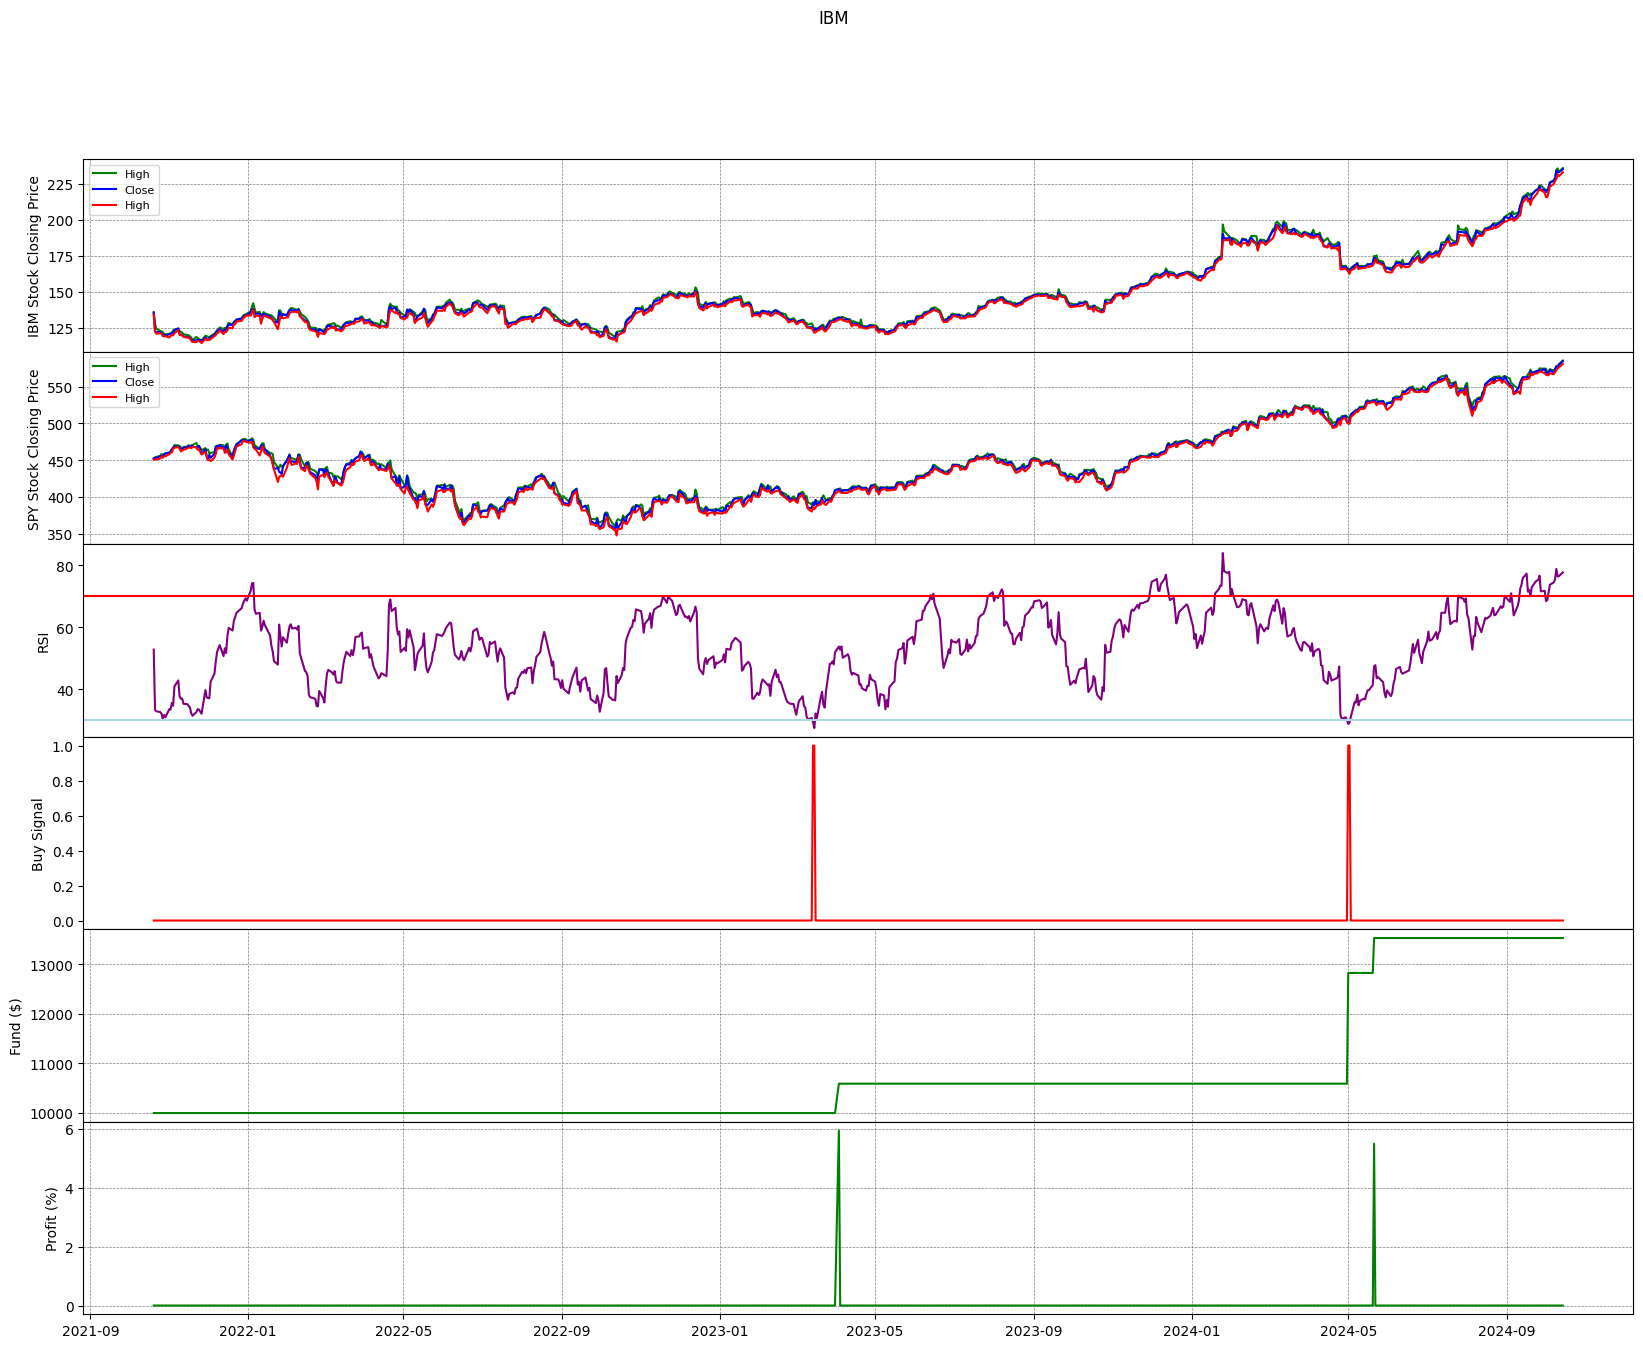

In [44]:
spy_rsi_sum_graph(ibm_spy_rsi_sorted[0], 'IBM', 70, 30)